In [1]:
import numpy as np
import math
import random
import scipy
from scipy import optimize
import matplotlib.pyplot as plt
import operator as op
from functools import reduce
from collections import Counter
%matplotlib inline

In [2]:
n=1000

In [3]:
def get_values(n, generator):
    values=[]
    for i in range(n):
        values.append(next(generator))
    return values

In [4]:
def C(n, r):
    r = min(r, n-r)
    numer = reduce(op.mul, range(n, n-r, -1), 1)
    denom = reduce(op.mul, range(1, r+1), 1)
    return numer // denom

# Multiplicative Congruential Generator

In [5]:
a=262147
b=262147
m=math.pow(2,31)

In [6]:
def random_MCG(a,b,m):
    while True:
        a=(b*a)%m
        yield a/m

In [7]:
MCG=random_MCG(a,b,m)

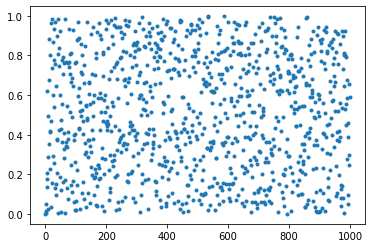

In [8]:
values_MCG=get_values(n,MCG)
plt.plot([i for i in range(n)],values_MCG,'.')

# Binomial distribution

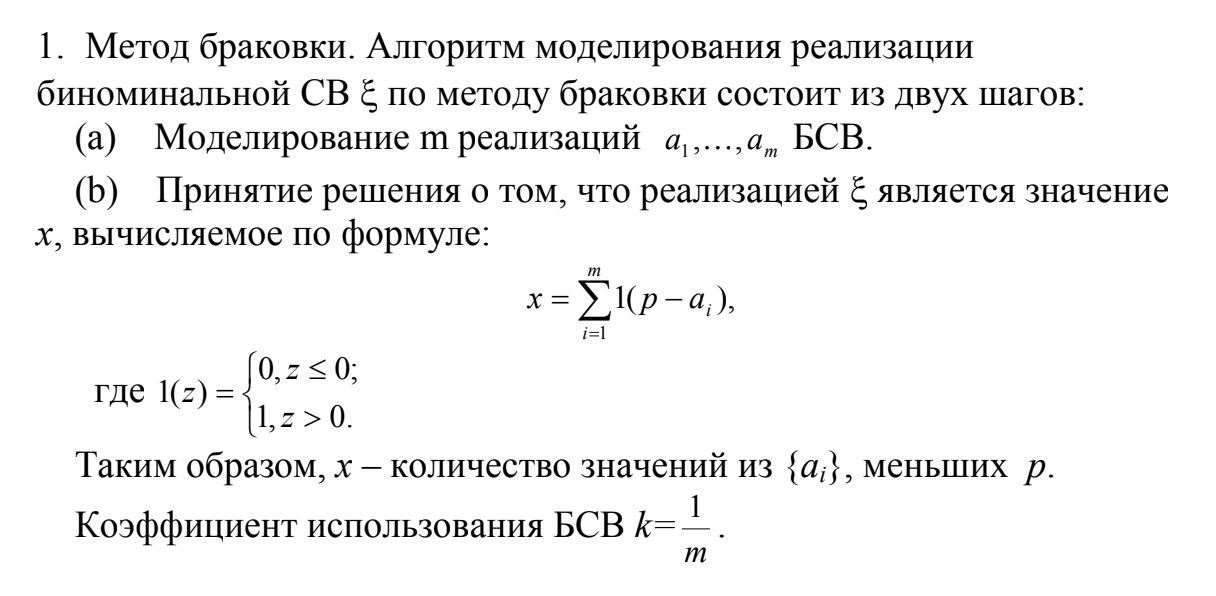

In [9]:
m=5
p=0.6

In [10]:
def bi_p(x,p,m):
    return C(m,x)*math.pow(p,x)*math.pow(1-p,m-x)

In [11]:
def random_BD(m,p):
    while True:
        values=get_values(m,MCG)
        x=0
        for value in values:
            if p>value:
                x+=1 
        yield x

In [12]:
BD=random_BD(m,p)

<BarContainer object of 6 artists>

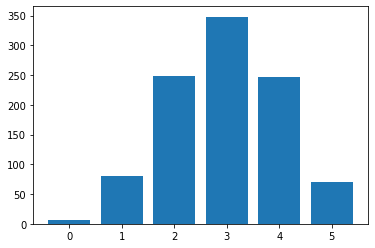

In [13]:
values_BD=get_values(n,BD)
plt.bar(list(Counter(values_BD).keys()),list(Counter(values_BD).values()))

https://homepage.divms.uiowa.edu/~mbognar/applets/bin.html

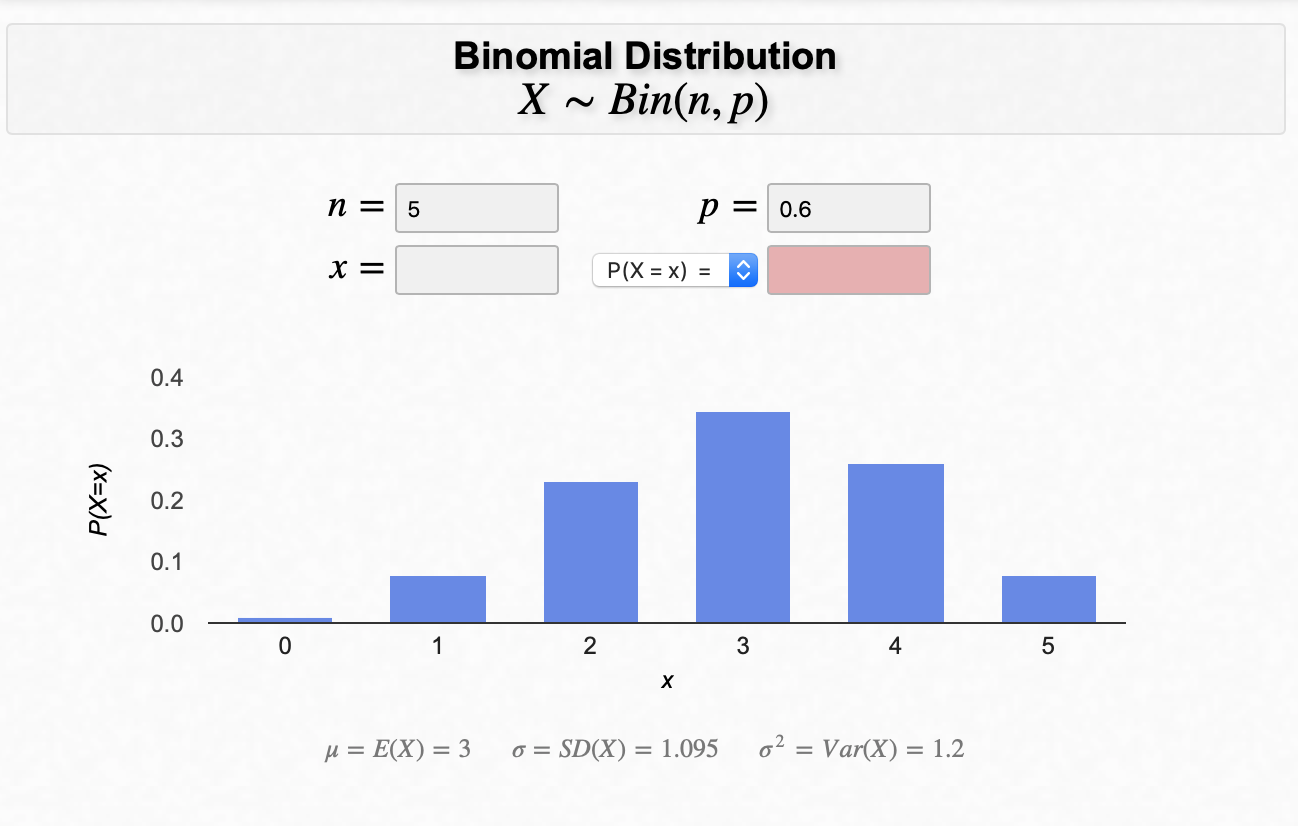

# Несмещенные оценки

## Выборочное среднее

In [14]:
sample_mean=sum(values_BD)/n
sample_mean

2.963

## Математическое ожидание

In [15]:
math_exp=m*p
math_exp

3.0

## Выборочная дисперсия

In [16]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_BD])/n
sample_cov

1.1516309999999963

## Дисперсия

In [17]:
cov=m*p*(1-p)
cov

1.2000000000000002

# Критерий согласия хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Ошибки_первого_и_второго_рода

In [18]:
e=0.05
l=7

In [19]:
def get_chi_squared(values,l):
    n=len(values)
    vs=get_freqs(values,l)
    res_sum=0
    for k in range(1,l):
        pk=bi_p(k-1,p,m)
        vk=vs[k-1]
        res_sum+=math.pow(vk-n*pk,2)/(n*pk)
    return res_sum

In [20]:
def chi_check_hypothesis(G,chi_sqared):
    print('X^2: {}, G-1: {}'.format(chi_sqared,G))
    if(chi_sqared<G):
        return True
    else:
        return False

In [21]:
def get_freqs(values,l):
    freqs=[0 for i in range(l)]
    for value in values:
        freqs[value]+=1
    return freqs

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [22]:
G=66.3386

In [23]:
chi_check_hypothesis(G,get_chi_squared(values_BD,l))

X^2: 4.411972736625504, G-1: 66.3386


True

# Покажем, что ошибка первого рода стремится к 0

In [24]:
t=10000

In [25]:
sum_fail_bd=0
for i in range(t):
    values=get_values(n,BD)
    if(chi_check_hypothesis(G,get_chi_squared(values,l))==False):
        sum_fail_bd+=1

X^2: 1.9589924125514429, G-1: 66.3386
X^2: 5.803915895061737, G-1: 66.3386
X^2: 7.271733539094639, G-1: 66.3386
X^2: 4.722945601851865, G-1: 66.3386
X^2: 1.0099183384773625, G-1: 66.3386
X^2: 7.490837191358035, G-1: 66.3386
X^2: 3.880529835390946, G-1: 66.3386
X^2: 0.8990001286008199, G-1: 66.3386
X^2: 1.1709908693415594, G-1: 66.3386
X^2: 7.7373488940329125, G-1: 66.3386
X^2: 6.567161779835399, G-1: 66.3386
X^2: 1.3749839248971139, G-1: 66.3386
X^2: 11.099858539094644, G-1: 66.3386
X^2: 5.808095421810695, G-1: 66.3386
X^2: 3.3668499228395103, G-1: 66.3386
X^2: 2.46672453703704, G-1: 66.3386
X^2: 9.765464248971174, G-1: 66.3386
X^2: 2.6859085648148078, G-1: 66.3386
X^2: 1.9367283950617304, G-1: 66.3386
X^2: 3.8380915637860027, G-1: 66.3386
X^2: 5.626044881687257, G-1: 66.3386
X^2: 1.9634934413580267, G-1: 66.3386
X^2: 7.850839120370383, G-1: 66.3386
X^2: 6.026073816872438, G-1: 66.3386
X^2: 1.0809702932098797, G-1: 66.3386
X^2: 3.044544110082298, G-1: 66.3386
X^2: 11.767779063786, G-1:

X^2: 1.7570891203703658, G-1: 66.3386
X^2: 4.267939814814819, G-1: 66.3386
X^2: 2.5678369341563823, G-1: 66.3386
X^2: 2.826485339506172, G-1: 66.3386
X^2: 8.974328060699595, G-1: 66.3386
X^2: 4.597318672839494, G-1: 66.3386
X^2: 3.808191872427972, G-1: 66.3386
X^2: 5.9818672839506135, G-1: 66.3386
X^2: 3.2327835648148153, G-1: 66.3386
X^2: 0.9298643261316891, G-1: 66.3386
X^2: 2.2542920524691366, G-1: 66.3386
X^2: 2.6237782921810635, G-1: 66.3386
X^2: 1.4752925668724317, G-1: 66.3386
X^2: 2.107526363168731, G-1: 66.3386
X^2: 8.578639403292165, G-1: 66.3386
X^2: 0.752877443415638, G-1: 66.3386
X^2: 3.4527713477366215, G-1: 66.3386
X^2: 2.750530478395057, G-1: 66.3386
X^2: 3.9396058384773562, G-1: 66.3386
X^2: 0.9059927983539088, G-1: 66.3386
X^2: 2.3985661008230426, G-1: 66.3386
X^2: 8.923128858024686, G-1: 66.3386
X^2: 0.8097833076131747, G-1: 66.3386
X^2: 3.8279642489711843, G-1: 66.3386
X^2: 0.7502250514403247, G-1: 66.3386
X^2: 7.8697273662551375, G-1: 66.3386
X^2: 4.214248971193419

X^2: 6.356899434156366, G-1: 66.3386
X^2: 2.548787937242796, G-1: 66.3386
X^2: 4.182179140946497, G-1: 66.3386
X^2: 0.9845196759259252, G-1: 66.3386
X^2: 6.933432998971196, G-1: 66.3386
X^2: 5.162840792181056, G-1: 66.3386
X^2: 2.2381365740740815, G-1: 66.3386
X^2: 4.78596000514402, G-1: 66.3386
X^2: 2.4364229681069984, G-1: 66.3386
X^2: 7.141525205761303, G-1: 66.3386
X^2: 28.31026556069957, G-1: 66.3386
X^2: 2.1280221193415594, G-1: 66.3386
X^2: 2.29456018518519, G-1: 66.3386
X^2: 9.188689557613168, G-1: 66.3386
X^2: 4.878552597736622, G-1: 66.3386
X^2: 3.4360532407407334, G-1: 66.3386
X^2: 3.9957883230452746, G-1: 66.3386
X^2: 4.505288708847732, G-1: 66.3386
X^2: 7.758085776748973, G-1: 66.3386
X^2: 0.97013245884774, G-1: 66.3386
X^2: 6.834812242798353, G-1: 66.3386
X^2: 1.5813882458847792, G-1: 66.3386
X^2: 0.7330246913580258, G-1: 66.3386
X^2: 17.77424125514405, G-1: 66.3386
X^2: 2.867557227366262, G-1: 66.3386
X^2: 4.653018904320985, G-1: 66.3386
X^2: 6.891155478395069, G-1: 66.3

X^2: 3.6816004372427953, G-1: 66.3386
X^2: 3.8266782407407454, G-1: 66.3386
X^2: 1.105645576131692, G-1: 66.3386
X^2: 7.880095807613157, G-1: 66.3386
X^2: 1.6537262088477331, G-1: 66.3386
X^2: 17.02281057098766, G-1: 66.3386
X^2: 5.859214248971205, G-1: 66.3386
X^2: 6.789721579218117, G-1: 66.3386
X^2: 7.744823816872415, G-1: 66.3386
X^2: 8.434606481481492, G-1: 66.3386
X^2: 5.980259773662533, G-1: 66.3386
X^2: 5.283805941358017, G-1: 66.3386
X^2: 6.642393261316862, G-1: 66.3386
X^2: 1.8098958333333277, G-1: 66.3386
X^2: 5.221193415637854, G-1: 66.3386
X^2: 4.3186567644032845, G-1: 66.3386
X^2: 1.7161779835390991, G-1: 66.3386
X^2: 11.142457561728385, G-1: 66.3386
X^2: 4.603587962962966, G-1: 66.3386
X^2: 2.792486496913573, G-1: 66.3386
X^2: 4.066197273662558, G-1: 66.3386
X^2: 6.295090663580234, G-1: 66.3386
X^2: 7.453784079218098, G-1: 66.3386
X^2: 7.2317065329218, G-1: 66.3386
X^2: 6.757892875514399, G-1: 66.3386
X^2: 4.166023662551429, G-1: 66.3386
X^2: 4.042807998971195, G-1: 66.3

X^2: 1.2285397376543155, G-1: 66.3386
X^2: 6.710149819958849, G-1: 66.3386
X^2: 1.5862107767489653, G-1: 66.3386
X^2: 4.376527134773661, G-1: 66.3386
X^2: 3.0396412037037073, G-1: 66.3386
X^2: 4.654465663580249, G-1: 66.3386
X^2: 3.983008616255156, G-1: 66.3386
X^2: 5.8965888631687156, G-1: 66.3386
X^2: 6.915589634773658, G-1: 66.3386
X^2: 9.751961162551433, G-1: 66.3386
X^2: 4.64393647119342, G-1: 66.3386
X^2: 11.781041023662555, G-1: 66.3386
X^2: 3.3827642746913584, G-1: 66.3386
X^2: 4.862075617283949, G-1: 66.3386
X^2: 2.7062435699588496, G-1: 66.3386
X^2: 3.730468749999997, G-1: 66.3386
X^2: 1.2017746913580247, G-1: 66.3386
X^2: 6.809172453703702, G-1: 66.3386
X^2: 14.787406764403288, G-1: 66.3386
X^2: 4.605838477366249, G-1: 66.3386
X^2: 2.2333140432098686, G-1: 66.3386
X^2: 1.0202064043209915, G-1: 66.3386
X^2: 4.726562499999986, G-1: 66.3386
X^2: 3.2778742283950493, G-1: 66.3386
X^2: 12.77086548353909, G-1: 66.3386
X^2: 6.031860853909471, G-1: 66.3386
X^2: 3.7669592335390893, G-

X^2: 8.282696759259268, G-1: 66.3386
X^2: 7.704234182098764, G-1: 66.3386
X^2: 3.595437885802472, G-1: 66.3386
X^2: 1.1488072273662506, G-1: 66.3386
X^2: 7.000707304526757, G-1: 66.3386
X^2: 1.5914351851851858, G-1: 66.3386
X^2: 2.214586548353915, G-1: 66.3386
X^2: 3.6847350823045333, G-1: 66.3386
X^2: 1.686519418724271, G-1: 66.3386
X^2: 3.3049607767489664, G-1: 66.3386
X^2: 0.4919785236625508, G-1: 66.3386
X^2: 3.7900270061728305, G-1: 66.3386
X^2: 4.300090020576121, G-1: 66.3386
X^2: 6.9269225823045195, G-1: 66.3386
X^2: 2.162905092592597, G-1: 66.3386
X^2: 2.4663226594650207, G-1: 66.3386
X^2: 2.3792759773662473, G-1: 66.3386
X^2: 1.439123585390942, G-1: 66.3386
X^2: 13.13440393518518, G-1: 66.3386
X^2: 2.611400462962958, G-1: 66.3386
X^2: 3.878359696502047, G-1: 66.3386
X^2: 4.02544688786009, G-1: 66.3386
X^2: 4.812644675925939, G-1: 66.3386
X^2: 4.311583719135809, G-1: 66.3386
X^2: 5.490290637860098, G-1: 66.3386
X^2: 3.1040219907407414, G-1: 66.3386
X^2: 2.0231320730452667, G-1:

X^2: 3.262040252057614, G-1: 66.3386
X^2: 1.916956018518515, G-1: 66.3386
X^2: 1.2420428240740709, G-1: 66.3386
X^2: 6.168097350823051, G-1: 66.3386
X^2: 2.604247042181066, G-1: 66.3386
X^2: 5.869100437242809, G-1: 66.3386
X^2: 15.998344264403318, G-1: 66.3386
X^2: 3.345148533950627, G-1: 66.3386
X^2: 8.368859310699591, G-1: 66.3386
X^2: 2.7162905092592617, G-1: 66.3386
X^2: 11.770190329218117, G-1: 66.3386
X^2: 4.241174768518513, G-1: 66.3386
X^2: 4.158709490740751, G-1: 66.3386
X^2: 6.7340213477366095, G-1: 66.3386
X^2: 0.5592528292181103, G-1: 66.3386
X^2: 7.773678626543215, G-1: 66.3386
X^2: 2.6142939814814743, G-1: 66.3386
X^2: 4.134114583333325, G-1: 66.3386
X^2: 11.215117026748974, G-1: 66.3386
X^2: 1.5570344650205707, G-1: 66.3386
X^2: 6.617717978395053, G-1: 66.3386
X^2: 3.808834876543216, G-1: 66.3386
X^2: 0.10255915637860169, G-1: 66.3386
X^2: 1.5382265946502003, G-1: 66.3386
X^2: 7.87929205246914, G-1: 66.3386
X^2: 3.8753858024691348, G-1: 66.3386
X^2: 4.820842978395061, G-

X^2: 17.240145961934132, G-1: 66.3386
X^2: 6.852575231481485, G-1: 66.3386
X^2: 0.6089248971193416, G-1: 66.3386
X^2: 5.716386959876535, G-1: 66.3386
X^2: 1.004131301440323, G-1: 66.3386
X^2: 7.773276748971199, G-1: 66.3386
X^2: 9.239567258230469, G-1: 66.3386
X^2: 13.828928755144013, G-1: 66.3386
X^2: 3.4613715277777835, G-1: 66.3386
X^2: 2.758809156378596, G-1: 66.3386
X^2: 3.5896508487654386, G-1: 66.3386
X^2: 3.289528677983538, G-1: 66.3386
X^2: 8.172019675925926, G-1: 66.3386
X^2: 13.982928240740726, G-1: 66.3386
X^2: 8.432034465020571, G-1: 66.3386
X^2: 5.2469135802469085, G-1: 66.3386
X^2: 1.2610918209876492, G-1: 66.3386
X^2: 3.178610468106995, G-1: 66.3386
X^2: 2.8583944187242865, G-1: 66.3386
X^2: 1.4236914866255135, G-1: 66.3386
X^2: 0.36120756172839275, G-1: 66.3386
X^2: 1.1512184927983555, G-1: 66.3386
X^2: 1.0091949588477345, G-1: 66.3386
X^2: 3.301343878600825, G-1: 66.3386
X^2: 3.195007073045263, G-1: 66.3386
X^2: 5.426793981481479, G-1: 66.3386
X^2: 6.406089248971208, 

X^2: 8.813496656378614, G-1: 66.3386
X^2: 7.8655478395061795, G-1: 66.3386
X^2: 1.5025398662551401, G-1: 66.3386
X^2: 2.728186085390943, G-1: 66.3386
X^2: 2.9326613940329254, G-1: 66.3386
X^2: 6.146074459876541, G-1: 66.3386
X^2: 2.7830825617284005, G-1: 66.3386
X^2: 5.863554526748976, G-1: 66.3386
X^2: 8.705713091563783, G-1: 66.3386
X^2: 4.801793981481477, G-1: 66.3386
X^2: 1.5565522119341568, G-1: 66.3386
X^2: 2.3640046296296338, G-1: 66.3386
X^2: 15.749019418724286, G-1: 66.3386
X^2: 6.363570601851838, G-1: 66.3386
X^2: 3.2246656378600798, G-1: 66.3386
X^2: 3.217672968106997, G-1: 66.3386
X^2: 2.297775205761311, G-1: 66.3386
X^2: 7.913130144032924, G-1: 66.3386
X^2: 3.932854295267491, G-1: 66.3386
X^2: 10.704812885802479, G-1: 66.3386
X^2: 7.279208461934171, G-1: 66.3386
X^2: 2.9581404320987637, G-1: 66.3386
X^2: 7.360950360082299, G-1: 66.3386
X^2: 5.998826517489714, G-1: 66.3386
X^2: 3.5206886574073977, G-1: 66.3386
X^2: 5.05674511316874, G-1: 66.3386
X^2: 6.603089634773679, G-1:

X^2: 8.43412422839505, G-1: 66.3386
X^2: 3.6996045524691348, G-1: 66.3386
X^2: 2.7233635545267387, G-1: 66.3386
X^2: 0.5440618569958835, G-1: 66.3386
X^2: 9.102285879629617, G-1: 66.3386
X^2: 3.367332175925917, G-1: 66.3386
X^2: 3.3162133487654306, G-1: 66.3386
X^2: 5.056745113168715, G-1: 66.3386
X^2: 0.8830857767489706, G-1: 66.3386
X^2: 7.353716563785996, G-1: 66.3386
X^2: 9.859021347736622, G-1: 66.3386
X^2: 2.0539962705761257, G-1: 66.3386
X^2: 4.971627443415645, G-1: 66.3386
X^2: 0.8838091563785955, G-1: 66.3386
X^2: 6.401266718107, G-1: 66.3386
X^2: 7.837094907407403, G-1: 66.3386
X^2: 5.631831918724296, G-1: 66.3386
X^2: 3.875225051440324, G-1: 66.3386
X^2: 2.019274048353914, G-1: 66.3386
X^2: 3.5012377829218146, G-1: 66.3386
X^2: 4.438898533950629, G-1: 66.3386
X^2: 4.1804912551440285, G-1: 66.3386
X^2: 4.668531378600814, G-1: 66.3386
X^2: 10.725871270576157, G-1: 66.3386
X^2: 2.8713348765432034, G-1: 66.3386
X^2: 3.777488425925921, G-1: 66.3386
X^2: 2.726658950617283, G-1: 66

X^2: 13.414673353909453, G-1: 66.3386
X^2: 9.783307613168706, G-1: 66.3386
X^2: 9.352896733539101, G-1: 66.3386
X^2: 3.915252057613172, G-1: 66.3386
X^2: 8.045669367283955, G-1: 66.3386
X^2: 1.6954411008230406, G-1: 66.3386
X^2: 11.063930684156375, G-1: 66.3386
X^2: 4.626977237654319, G-1: 66.3386
X^2: 7.68831983024692, G-1: 66.3386
X^2: 0.420846193415639, G-1: 66.3386
X^2: 3.4710969650205814, G-1: 66.3386
X^2: 0.676359953703701, G-1: 66.3386
X^2: 11.286972736625493, G-1: 66.3386
X^2: 2.5933963477366344, G-1: 66.3386
X^2: 3.2055362654321007, G-1: 66.3386
X^2: 2.3705954218107035, G-1: 66.3386
X^2: 0.7350340792181056, G-1: 66.3386
X^2: 3.815104166666676, G-1: 66.3386
X^2: 2.4482381687242913, G-1: 66.3386
X^2: 0.33042373971193684, G-1: 66.3386
X^2: 6.2726658950617145, G-1: 66.3386
X^2: 6.175090020576118, G-1: 66.3386
X^2: 5.740579989711938, G-1: 66.3386
X^2: 2.931214634773671, G-1: 66.3386
X^2: 4.237798996913569, G-1: 66.3386
X^2: 3.368618184156386, G-1: 66.3386
X^2: 8.956404320987643, G-

X^2: 6.3559349279835455, G-1: 66.3386
X^2: 3.9374356995884923, G-1: 66.3386
X^2: 11.17766203703704, G-1: 66.3386
X^2: 0.7058577674897145, G-1: 66.3386
X^2: 6.19020061728394, G-1: 66.3386
X^2: 7.01855066872428, G-1: 66.3386
X^2: 3.4963348765432136, G-1: 66.3386
X^2: 3.7129468878600793, G-1: 66.3386
X^2: 5.218460648148164, G-1: 66.3386
X^2: 4.418643904320991, G-1: 66.3386
X^2: 2.86490483539095, G-1: 66.3386
X^2: 5.172968106995886, G-1: 66.3386
X^2: 0.5288708847736633, G-1: 66.3386
X^2: 2.46551890432099, G-1: 66.3386
X^2: 6.263985339506165, G-1: 66.3386
X^2: 2.24472736625514, G-1: 66.3386
X^2: 6.088204089506182, G-1: 66.3386
X^2: 1.6304976851851818, G-1: 66.3386
X^2: 6.1013052983539176, G-1: 66.3386
X^2: 1.8719457304526759, G-1: 66.3386
X^2: 6.774771733539093, G-1: 66.3386
X^2: 2.509403935185188, G-1: 66.3386
X^2: 1.8844843106995937, G-1: 66.3386
X^2: 5.096209490740751, G-1: 66.3386
X^2: 2.7337319958847712, G-1: 66.3386
X^2: 5.4632040895061635, G-1: 66.3386
X^2: 0.8039158950617252, G-1: 6

X^2: 5.87745949074074, G-1: 66.3386
X^2: 3.5769515174897144, G-1: 66.3386
X^2: 1.0805684156378612, G-1: 66.3386
X^2: 5.1437917952674965, G-1: 66.3386
X^2: 3.719698431069959, G-1: 66.3386
X^2: 6.45117991255145, G-1: 66.3386
X^2: 2.3144129372427904, G-1: 66.3386
X^2: 2.9121656378600798, G-1: 66.3386
X^2: 6.44370498971193, G-1: 66.3386
X^2: 7.47331532921811, G-1: 66.3386
X^2: 4.0309124228395135, G-1: 66.3386
X^2: 4.715952932098764, G-1: 66.3386
X^2: 6.287937242798357, G-1: 66.3386
X^2: 1.3207304526749053, G-1: 66.3386
X^2: 1.7041216563786086, G-1: 66.3386
X^2: 8.188496656378595, G-1: 66.3386
X^2: 1.9475790895061742, G-1: 66.3386
X^2: 1.982381687242793, G-1: 66.3386
X^2: 3.4650688014403253, G-1: 66.3386
X^2: 5.1806841563786135, G-1: 66.3386
X^2: 2.120306069958853, G-1: 66.3386
X^2: 1.8292663323045313, G-1: 66.3386
X^2: 1.204507458847739, G-1: 66.3386
X^2: 5.5459908693415665, G-1: 66.3386
X^2: 9.72061471193416, G-1: 66.3386
X^2: 6.097608024691355, G-1: 66.3386
X^2: 5.339827674897125, G-1: 6

X^2: 1.6321855709876592, G-1: 66.3386
X^2: 2.069106867283954, G-1: 66.3386
X^2: 7.396395961934145, G-1: 66.3386
X^2: 6.229263117283944, G-1: 66.3386
X^2: 2.819251543209873, G-1: 66.3386
X^2: 3.817595807613169, G-1: 66.3386
X^2: 17.184124228395035, G-1: 66.3386
X^2: 6.30650398662551, G-1: 66.3386
X^2: 5.081741898148161, G-1: 66.3386
X^2: 10.033275462962958, G-1: 66.3386
X^2: 2.0517457561728314, G-1: 66.3386
X^2: 3.7965374228395006, G-1: 66.3386
X^2: 2.291988168724286, G-1: 66.3386
X^2: 5.886702674897124, G-1: 66.3386
X^2: 3.139065715020568, G-1: 66.3386
X^2: 0.8314043209876537, G-1: 66.3386
X^2: 1.588541666666666, G-1: 66.3386
X^2: 11.710310570987659, G-1: 66.3386
X^2: 1.556712962962961, G-1: 66.3386
X^2: 5.416023662551453, G-1: 66.3386
X^2: 3.177404835390946, G-1: 66.3386
X^2: 3.810603137860084, G-1: 66.3386
X^2: 15.484905478395039, G-1: 66.3386
X^2: 7.639933770576118, G-1: 66.3386
X^2: 7.587770061728394, G-1: 66.3386
X^2: 7.6278774434156205, G-1: 66.3386
X^2: 6.555587705761301, G-1: 6

X^2: 4.859744727366265, G-1: 66.3386
X^2: 1.4241737397119427, G-1: 66.3386
X^2: 5.105131172839502, G-1: 66.3386
X^2: 5.556359310699575, G-1: 66.3386
X^2: 4.427404835390952, G-1: 66.3386
X^2: 1.9970904063785913, G-1: 66.3386
X^2: 1.3998199588477336, G-1: 66.3386
X^2: 1.9792470421810617, G-1: 66.3386
X^2: 3.400205761316872, G-1: 66.3386
X^2: 5.178192515432103, G-1: 66.3386
X^2: 1.7356288580246937, G-1: 66.3386
X^2: 2.4561953446501965, G-1: 66.3386
X^2: 2.7060024434156458, G-1: 66.3386
X^2: 3.8197659465020557, G-1: 66.3386
X^2: 0.9858056841563763, G-1: 66.3386
X^2: 7.562210648148154, G-1: 66.3386
X^2: 4.861834490740736, G-1: 66.3386
X^2: 3.532584233539098, G-1: 66.3386
X^2: 5.44294945987654, G-1: 66.3386
X^2: 4.260223765432095, G-1: 66.3386
X^2: 2.7852527006172756, G-1: 66.3386
X^2: 12.591949588477348, G-1: 66.3386
X^2: 6.516525205761307, G-1: 66.3386
X^2: 5.310651363168724, G-1: 66.3386
X^2: 10.411603009259245, G-1: 66.3386
X^2: 4.855886702674906, G-1: 66.3386
X^2: 2.364808384773659, G-1

X^2: 6.749453446502052, G-1: 66.3386
X^2: 5.495515046296303, G-1: 66.3386
X^2: 4.655751671810697, G-1: 66.3386
X^2: 9.63718492798356, G-1: 66.3386
X^2: 4.648759002057614, G-1: 66.3386
X^2: 4.825183256172844, G-1: 66.3386
X^2: 4.981031378600813, G-1: 66.3386
X^2: 6.182082690329222, G-1: 66.3386
X^2: 1.8114229681070022, G-1: 66.3386
X^2: 1.6185217335390882, G-1: 66.3386
X^2: 2.6811664094650185, G-1: 66.3386
X^2: 5.071694958847747, G-1: 66.3386
X^2: 3.531860853909465, G-1: 66.3386
X^2: 0.4870756172839484, G-1: 66.3386
X^2: 3.1089248971193437, G-1: 66.3386
X^2: 11.632989326131671, G-1: 66.3386
X^2: 3.7483924897119314, G-1: 66.3386
X^2: 2.8055073302469116, G-1: 66.3386
X^2: 6.89581725823047, G-1: 66.3386
X^2: 0.2436181841563803, G-1: 66.3386
X^2: 5.104488168724286, G-1: 66.3386
X^2: 9.205327289094654, G-1: 66.3386
X^2: 2.1798643261316903, G-1: 66.3386
X^2: 3.3444251543209944, G-1: 66.3386
X^2: 0.5604584619341533, G-1: 66.3386
X^2: 3.047839506172842, G-1: 66.3386
X^2: 1.724617412551446, G-1:

X^2: 8.676777906378586, G-1: 66.3386
X^2: 7.760497042181068, G-1: 66.3386
X^2: 6.602607381687256, G-1: 66.3386
X^2: 5.085198045267475, G-1: 66.3386
X^2: 4.577144418724286, G-1: 66.3386
X^2: 3.3567226080246884, G-1: 66.3386
X^2: 7.90436921296297, G-1: 66.3386
X^2: 13.884387860082326, G-1: 66.3386
X^2: 5.26628407921811, G-1: 66.3386
X^2: 2.664046424897125, G-1: 66.3386
X^2: 4.352816358024694, G-1: 66.3386
X^2: 5.3417566872427855, G-1: 66.3386
X^2: 1.2746752829218089, G-1: 66.3386
X^2: 4.328784079218115, G-1: 66.3386
X^2: 9.88353587962963, G-1: 66.3386
X^2: 2.7052790637860014, G-1: 66.3386
X^2: 5.6103716563785895, G-1: 66.3386
X^2: 2.231465406378602, G-1: 66.3386
X^2: 3.685940715020567, G-1: 66.3386
X^2: 1.676874356995882, G-1: 66.3386
X^2: 2.651990097736625, G-1: 66.3386
X^2: 4.493232381687239, G-1: 66.3386
X^2: 6.908516589506183, G-1: 66.3386
X^2: 1.37667181069959, G-1: 66.3386
X^2: 5.660284850823033, G-1: 66.3386
X^2: 3.17402906378602, G-1: 66.3386
X^2: 7.529980066872423, G-1: 66.3386


X^2: 5.105934927983548, G-1: 66.3386
X^2: 7.689123585390955, G-1: 66.3386
X^2: 5.428079989711929, G-1: 66.3386
X^2: 2.470582561728393, G-1: 66.3386
X^2: 3.371752829218112, G-1: 66.3386
X^2: 5.686005015432103, G-1: 66.3386
X^2: 2.1969843106995786, G-1: 66.3386
X^2: 1.4304430298353945, G-1: 66.3386
X^2: 3.1284561471193446, G-1: 66.3386
X^2: 5.3747910236625485, G-1: 66.3386
X^2: 2.8052662037037095, G-1: 66.3386
X^2: 4.592094264403298, G-1: 66.3386
X^2: 1.7826485339506146, G-1: 66.3386
X^2: 5.458461934156379, G-1: 66.3386
X^2: 6.222109696502061, G-1: 66.3386
X^2: 5.372138631687253, G-1: 66.3386
X^2: 2.014853395061736, G-1: 66.3386
X^2: 3.8074684927983578, G-1: 66.3386
X^2: 1.3441197273662495, G-1: 66.3386
X^2: 5.34465020576133, G-1: 66.3386
X^2: 1.766010802469139, G-1: 66.3386
X^2: 7.106722608024688, G-1: 66.3386
X^2: 1.305780606995878, G-1: 66.3386
X^2: 0.8440232767489702, G-1: 66.3386
X^2: 2.414721579218118, G-1: 66.3386
X^2: 4.649964634773666, G-1: 66.3386
X^2: 11.154755015432082, G-1: 

X^2: 0.8130787037037038, G-1: 66.3386
X^2: 7.458124356995879, G-1: 66.3386
X^2: 5.795315715020569, G-1: 66.3386
X^2: 12.274144804526761, G-1: 66.3386
X^2: 3.5238233024691494, G-1: 66.3386
X^2: 2.6430684156378588, G-1: 66.3386
X^2: 7.851160622428001, G-1: 66.3386
X^2: 2.7448238168724166, G-1: 66.3386
X^2: 7.444621270576142, G-1: 66.3386
X^2: 3.343541023662548, G-1: 66.3386
X^2: 5.987252443415639, G-1: 66.3386
X^2: 0.16010802469135732, G-1: 66.3386
X^2: 2.0588188014403244, G-1: 66.3386
X^2: 2.1808288323045253, G-1: 66.3386
X^2: 7.087995113168727, G-1: 66.3386
X^2: 2.5260416666666647, G-1: 66.3386
X^2: 1.9794881687242794, G-1: 66.3386
X^2: 1.8051536779835464, G-1: 66.3386
X^2: 4.320585776748963, G-1: 66.3386
X^2: 0.43531378600822773, G-1: 66.3386
X^2: 1.8410011574074039, G-1: 66.3386
X^2: 6.634677211934158, G-1: 66.3386
X^2: 8.48508230452675, G-1: 66.3386
X^2: 8.004999356995903, G-1: 66.3386
X^2: 4.657198431069963, G-1: 66.3386
X^2: 1.58082561728395, G-1: 66.3386
X^2: 13.909384645061728, 

X^2: 6.233442644032905, G-1: 66.3386
X^2: 1.3713670267489666, G-1: 66.3386
X^2: 8.232783564814795, G-1: 66.3386
X^2: 5.363458076131679, G-1: 66.3386
X^2: 1.400061085390941, G-1: 66.3386
X^2: 1.749935699588479, G-1: 66.3386
X^2: 3.8057002314814716, G-1: 66.3386
X^2: 3.047919881687233, G-1: 66.3386
X^2: 3.787133487654329, G-1: 66.3386
X^2: 7.920846193415639, G-1: 66.3386
X^2: 5.455246913580259, G-1: 66.3386
X^2: 2.0846193415637893, G-1: 66.3386
X^2: 6.919126157407402, G-1: 66.3386
X^2: 12.004726080246897, G-1: 66.3386
X^2: 3.4023759002057656, G-1: 66.3386
X^2: 5.432661394032913, G-1: 66.3386
X^2: 5.516010802469133, G-1: 66.3386
X^2: 1.939943415637865, G-1: 66.3386
X^2: 2.2781635802469116, G-1: 66.3386
X^2: 0.4517103909465025, G-1: 66.3386
X^2: 3.605324074074074, G-1: 66.3386
X^2: 5.286538708847736, G-1: 66.3386
X^2: 5.25921103395062, G-1: 66.3386
X^2: 2.996238425925926, G-1: 66.3386
X^2: 2.8486689814814796, G-1: 66.3386
X^2: 5.2216756687242745, G-1: 66.3386
X^2: 2.3862686471193526, G-1: 

X^2: 3.3917663323045355, G-1: 66.3386
X^2: 4.363506301440328, G-1: 66.3386
X^2: 1.5895865483539076, G-1: 66.3386
X^2: 6.603250385802464, G-1: 66.3386
X^2: 14.771010159465021, G-1: 66.3386
X^2: 6.18947723765431, G-1: 66.3386
X^2: 1.9409079218106988, G-1: 66.3386
X^2: 3.1024144804526825, G-1: 66.3386
X^2: 4.038949974279842, G-1: 66.3386
X^2: 8.105549125514418, G-1: 66.3386
X^2: 4.295990869341561, G-1: 66.3386
X^2: 6.612011316872412, G-1: 66.3386
X^2: 3.9766589506172894, G-1: 66.3386
X^2: 4.103250385802471, G-1: 66.3386
X^2: 7.015898276748979, G-1: 66.3386
X^2: 3.386702674897123, G-1: 66.3386
X^2: 1.463477366255138, G-1: 66.3386
X^2: 5.148132073045261, G-1: 66.3386
X^2: 3.936149691358014, G-1: 66.3386
X^2: 5.523566100823057, G-1: 66.3386
X^2: 1.4743280606995897, G-1: 66.3386
X^2: 2.629484953703706, G-1: 66.3386
X^2: 1.0357188786008296, G-1: 66.3386
X^2: 3.9251382458847823, G-1: 66.3386
X^2: 6.406571502057606, G-1: 66.3386
X^2: 2.7530221193415594, G-1: 66.3386
X^2: 6.611689814814822, G-1: 

X^2: 0.7815715020576081, G-1: 66.3386
X^2: 4.465743955761328, G-1: 66.3386
X^2: 2.4293499228395024, G-1: 66.3386
X^2: 1.6580664866255153, G-1: 66.3386
X^2: 5.892248585390938, G-1: 66.3386
X^2: 1.9845518261316895, G-1: 66.3386
X^2: 1.7458365483539142, G-1: 66.3386
X^2: 6.383664480452687, G-1: 66.3386
X^2: 4.299848894032911, G-1: 66.3386
X^2: 4.050765174897122, G-1: 66.3386
X^2: 5.368441358024688, G-1: 66.3386
X^2: 3.533548739711934, G-1: 66.3386
X^2: 2.3607092335390973, G-1: 66.3386
X^2: 4.354343492798355, G-1: 66.3386
X^2: 5.462480709876535, G-1: 66.3386
X^2: 10.732783564814808, G-1: 66.3386
X^2: 3.6615869341563845, G-1: 66.3386
X^2: 1.1242123199588507, G-1: 66.3386
X^2: 5.558288323045281, G-1: 66.3386
X^2: 10.93565136316872, G-1: 66.3386
X^2: 9.75501543209876, G-1: 66.3386
X^2: 5.467544367283952, G-1: 66.3386
X^2: 6.172437628600837, G-1: 66.3386
X^2: 5.108587319958852, G-1: 66.3386
X^2: 8.55999228395062, G-1: 66.3386
X^2: 7.327674897119348, G-1: 66.3386
X^2: 4.181455761316882, G-1: 66

X^2: 5.646540637860078, G-1: 66.3386
X^2: 5.213959619341561, G-1: 66.3386
X^2: 2.6862300668724206, G-1: 66.3386
X^2: 1.8065200617283974, G-1: 66.3386
X^2: 5.260657793209871, G-1: 66.3386
X^2: 6.092544367283945, G-1: 66.3386
X^2: 12.758568029835367, G-1: 66.3386
X^2: 2.893116640946509, G-1: 66.3386
X^2: 2.6625996656378597, G-1: 66.3386
X^2: 3.6854584619341635, G-1: 66.3386
X^2: 3.277472350823038, G-1: 66.3386
X^2: 5.1163033693415585, G-1: 66.3386
X^2: 3.3881494341563876, G-1: 66.3386
X^2: 2.356368955761313, G-1: 66.3386
X^2: 6.362204218106992, G-1: 66.3386
X^2: 5.4890046296296315, G-1: 66.3386
X^2: 12.492364326131703, G-1: 66.3386
X^2: 3.5398180298353963, G-1: 66.3386
X^2: 5.673546810699579, G-1: 66.3386
X^2: 3.109085648148138, G-1: 66.3386
X^2: 7.073286394032921, G-1: 66.3386
X^2: 2.982011959876542, G-1: 66.3386
X^2: 4.045862268518512, G-1: 66.3386
X^2: 5.379613554526746, G-1: 66.3386
X^2: 2.4453446502057545, G-1: 66.3386
X^2: 12.637040252057602, G-1: 66.3386
X^2: 2.0466820987654266, G

X^2: 6.207400977366256, G-1: 66.3386
X^2: 3.374565972222219, G-1: 66.3386
X^2: 4.87927597736626, G-1: 66.3386
X^2: 5.401797196502065, G-1: 66.3386
X^2: 0.6577932098765483, G-1: 66.3386
X^2: 2.711467978395055, G-1: 66.3386
X^2: 2.9212480709876556, G-1: 66.3386
X^2: 3.104825745884772, G-1: 66.3386
X^2: 8.302228009259267, G-1: 66.3386
X^2: 4.504324202674912, G-1: 66.3386
X^2: 6.514756944444436, G-1: 66.3386
X^2: 6.047534079218123, G-1: 66.3386
X^2: 6.361239711934157, G-1: 66.3386
X^2: 3.4161201131687333, G-1: 66.3386
X^2: 8.855211548353907, G-1: 66.3386
X^2: 4.226948302469129, G-1: 66.3386
X^2: 6.949106224279837, G-1: 66.3386
X^2: 7.706002443415633, G-1: 66.3386
X^2: 1.0427115483539104, G-1: 66.3386
X^2: 2.309349279835402, G-1: 66.3386
X^2: 2.5313464506172814, G-1: 66.3386
X^2: 0.923273533950615, G-1: 66.3386
X^2: 1.676150977366253, G-1: 66.3386
X^2: 3.024771733539084, G-1: 66.3386
X^2: 8.28567065329218, G-1: 66.3386
X^2: 8.391766332304528, G-1: 66.3386
X^2: 4.2899627057613205, G-1: 66.33

X^2: 3.6407696759259163, G-1: 66.3386
X^2: 5.334040637860083, G-1: 66.3386
X^2: 2.1580825617284005, G-1: 66.3386
X^2: 5.450906635802477, G-1: 66.3386
X^2: 5.303658693415633, G-1: 66.3386
X^2: 4.007362397119346, G-1: 66.3386
X^2: 2.6391300154321025, G-1: 66.3386
X^2: 2.037117412551438, G-1: 66.3386
X^2: 1.5837995113168755, G-1: 66.3386
X^2: 1.7798353909464995, G-1: 66.3386
X^2: 4.748987268518529, G-1: 66.3386
X^2: 2.8145093878600913, G-1: 66.3386
X^2: 2.2109696502057523, G-1: 66.3386
X^2: 8.895640432098752, G-1: 66.3386
X^2: 3.4604873971193424, G-1: 66.3386
X^2: 3.571887860082307, G-1: 66.3386
X^2: 8.236641589506188, G-1: 66.3386
X^2: 5.105131172839521, G-1: 66.3386
X^2: 2.010111239711944, G-1: 66.3386
X^2: 7.429832175925919, G-1: 66.3386
X^2: 0.9329989711934116, G-1: 66.3386
X^2: 4.881446116255141, G-1: 66.3386
X^2: 5.9261670524691406, G-1: 66.3386
X^2: 3.9938593106995888, G-1: 66.3386
X^2: 9.839007844650189, G-1: 66.3386
X^2: 7.461178626543224, G-1: 66.3386
X^2: 3.314364711934169, G-1

X^2: 4.071180555555546, G-1: 66.3386
X^2: 2.903485082304519, G-1: 66.3386
X^2: 6.244293338477375, G-1: 66.3386
X^2: 6.9288515946502205, G-1: 66.3386
X^2: 4.058481224279845, G-1: 66.3386
X^2: 6.139644418724271, G-1: 66.3386
X^2: 5.27617026748971, G-1: 66.3386
X^2: 0.8885513117283964, G-1: 66.3386
X^2: 11.820264274691356, G-1: 66.3386
X^2: 3.635545267489705, G-1: 66.3386
X^2: 3.259387860082305, G-1: 66.3386
X^2: 1.8413226594650278, G-1: 66.3386
X^2: 3.1906667952674894, G-1: 66.3386
X^2: 8.885352366255141, G-1: 66.3386
X^2: 3.7814268261316912, G-1: 66.3386
X^2: 3.3825231481481537, G-1: 66.3386
X^2: 8.351739326131703, G-1: 66.3386
X^2: 6.758375128600816, G-1: 66.3386
X^2: 0.7538419495884823, G-1: 66.3386
X^2: 10.146846064814797, G-1: 66.3386
X^2: 5.566647376543217, G-1: 66.3386
X^2: 4.170283564814819, G-1: 66.3386
X^2: 6.086355452674881, G-1: 66.3386
X^2: 3.604198816872422, G-1: 66.3386
X^2: 6.358346193415632, G-1: 66.3386
X^2: 4.684124228395065, G-1: 66.3386
X^2: 4.231127829218093, G-1: 6

X^2: 2.9321791409465097, G-1: 66.3386
X^2: 4.201469264403292, G-1: 66.3386
X^2: 1.6913419495884745, G-1: 66.3386
X^2: 3.3266621656378508, G-1: 66.3386
X^2: 7.423321759259273, G-1: 66.3386
X^2: 7.644756301440324, G-1: 66.3386
X^2: 2.117573302469133, G-1: 66.3386
X^2: 5.97977752057614, G-1: 66.3386
X^2: 11.953366126543218, G-1: 66.3386
X^2: 10.6028163580247, G-1: 66.3386
X^2: 5.563834233539085, G-1: 66.3386
X^2: 6.687885802469123, G-1: 66.3386
X^2: 4.296955375514401, G-1: 66.3386
X^2: 1.9112493569958766, G-1: 66.3386
X^2: 9.014998070987634, G-1: 66.3386
X^2: 3.623247813786007, G-1: 66.3386
X^2: 3.10329861111111, G-1: 66.3386
X^2: 8.152809927983533, G-1: 66.3386
X^2: 8.225147890946488, G-1: 66.3386
X^2: 6.48533950617284, G-1: 66.3386
X^2: 8.798707561728385, G-1: 66.3386
X^2: 4.931600437242796, G-1: 66.3386
X^2: 4.423787937242794, G-1: 66.3386
X^2: 3.1219457304526728, G-1: 66.3386
X^2: 4.941647376543212, G-1: 66.3386
X^2: 2.4651170267489713, G-1: 66.3386
X^2: 0.15866126543210154, G-1: 66.3

X^2: 8.399482381687239, G-1: 66.3386
X^2: 2.678031764403292, G-1: 66.3386
X^2: 2.040252057613173, G-1: 66.3386
X^2: 3.392248585390938, G-1: 66.3386
X^2: 2.6992509002057536, G-1: 66.3386
X^2: 6.661603009259248, G-1: 66.3386
X^2: 2.9810474537037046, G-1: 66.3386
X^2: 9.271637088477373, G-1: 66.3386
X^2: 3.943222736625501, G-1: 66.3386
X^2: 2.9312146347736623, G-1: 66.3386
X^2: 1.5096932870370368, G-1: 66.3386
X^2: 8.026459619341555, G-1: 66.3386
X^2: 9.580037937242796, G-1: 66.3386
X^2: 9.078735853909452, G-1: 66.3386
X^2: 2.8226273148148193, G-1: 66.3386
X^2: 3.401170267489707, G-1: 66.3386
X^2: 5.380015432098764, G-1: 66.3386
X^2: 1.2587609310699563, G-1: 66.3386
X^2: 2.510127314814821, G-1: 66.3386
X^2: 6.236496913580251, G-1: 66.3386
X^2: 10.356626157407398, G-1: 66.3386
X^2: 2.93113425925925, G-1: 66.3386
X^2: 7.822868441358014, G-1: 66.3386
X^2: 7.541554140946507, G-1: 66.3386
X^2: 5.412889017489701, G-1: 66.3386
X^2: 7.352752057613175, G-1: 66.3386
X^2: 8.195007073045272, G-1: 66.

X^2: 4.354102366255134, G-1: 66.3386
X^2: 6.665943287037024, G-1: 66.3386
X^2: 5.606995884773658, G-1: 66.3386
X^2: 3.061422968106986, G-1: 66.3386
X^2: 2.6065779320987734, G-1: 66.3386
X^2: 2.638004758230461, G-1: 66.3386
X^2: 4.721579218107001, G-1: 66.3386
X^2: 2.980565200617274, G-1: 66.3386
X^2: 1.45696694958848, G-1: 66.3386
X^2: 9.052694187242786, G-1: 66.3386
X^2: 5.025639789094656, G-1: 66.3386
X^2: 7.338043338477359, G-1: 66.3386
X^2: 8.8577835648148, G-1: 66.3386
X^2: 6.761268647119339, G-1: 66.3386
X^2: 6.6857960390946465, G-1: 66.3386
X^2: 4.41478587962963, G-1: 66.3386
X^2: 1.109182098765435, G-1: 66.3386
X^2: 1.0640914351851793, G-1: 66.3386
X^2: 7.534239969135802, G-1: 66.3386
X^2: 1.2398726851851851, G-1: 66.3386
X^2: 5.104005915637872, G-1: 66.3386
X^2: 5.289673353909466, G-1: 66.3386
X^2: 1.6984953703703676, G-1: 66.3386
X^2: 3.3683770576131615, G-1: 66.3386
X^2: 1.4292373971193488, G-1: 66.3386
X^2: 7.632458847736638, G-1: 66.3386
X^2: 4.67689043209877, G-1: 66.3386

X^2: 8.916377314814815, G-1: 66.3386
X^2: 9.494438014403288, G-1: 66.3386
X^2: 5.56721000514404, G-1: 66.3386
X^2: 6.811422968107003, G-1: 66.3386
X^2: 3.0519386574074163, G-1: 66.3386
X^2: 4.038467721193409, G-1: 66.3386
X^2: 0.1266718106995907, G-1: 66.3386
X^2: 2.1231192129629637, G-1: 66.3386
X^2: 2.636799125514395, G-1: 66.3386
X^2: 5.0049029063786055, G-1: 66.3386
X^2: 6.3949974279835295, G-1: 66.3386
X^2: 5.811953446502047, G-1: 66.3386
X^2: 2.5571469907407405, G-1: 66.3386
X^2: 2.2940779320987703, G-1: 66.3386
X^2: 8.786731610082288, G-1: 66.3386
X^2: 4.138052983539105, G-1: 66.3386
X^2: 4.180410879629621, G-1: 66.3386
X^2: 4.981433256172845, G-1: 66.3386
X^2: 8.718010545267482, G-1: 66.3386
X^2: 8.012715406378616, G-1: 66.3386
X^2: 0.7808481224279815, G-1: 66.3386
X^2: 7.654320987654325, G-1: 66.3386
X^2: 0.7121270576131682, G-1: 66.3386
X^2: 10.725147890946495, G-1: 66.3386
X^2: 0.9855645576131755, G-1: 66.3386
X^2: 5.007233796296289, G-1: 66.3386
X^2: 2.8323527520576173, G-1

X^2: 5.549366640946516, G-1: 66.3386
X^2: 2.6744148662551432, G-1: 66.3386
X^2: 9.919785236625497, G-1: 66.3386
X^2: 3.33357445987654, G-1: 66.3386
X^2: 3.7657536008230434, G-1: 66.3386
X^2: 1.2820698302469076, G-1: 66.3386
X^2: 6.4424993569958815, G-1: 66.3386
X^2: 0.6484696502057611, G-1: 66.3386
X^2: 2.9075038580246946, G-1: 66.3386
X^2: 2.8899016203703782, G-1: 66.3386
X^2: 4.757265946502055, G-1: 66.3386
X^2: 9.015078446502066, G-1: 66.3386
X^2: 6.136992026748985, G-1: 66.3386
X^2: 6.8455825617284045, G-1: 66.3386
X^2: 2.08863811728396, G-1: 66.3386
X^2: 2.4713863168724295, G-1: 66.3386
X^2: 9.174463091563794, G-1: 66.3386
X^2: 1.8020190329218067, G-1: 66.3386
X^2: 0.8928915895061734, G-1: 66.3386
X^2: 5.457979681069969, G-1: 66.3386
X^2: 6.306021733539077, G-1: 66.3386
X^2: 7.798273533950632, G-1: 66.3386
X^2: 10.275929140946497, G-1: 66.3386
X^2: 1.3028870884773702, G-1: 66.3386
X^2: 3.817836934156383, G-1: 66.3386
X^2: 5.2744823816872355, G-1: 66.3386
X^2: 5.825938786008221, G-

X^2: 7.591949588477371, G-1: 66.3386
X^2: 4.774305555555545, G-1: 66.3386
X^2: 5.440377443415635, G-1: 66.3386
X^2: 5.917084619341559, G-1: 66.3386
X^2: 9.028581532921802, G-1: 66.3386
X^2: 5.126671810699586, G-1: 66.3386
X^2: 5.531523276748955, G-1: 66.3386
X^2: 13.901025591563773, G-1: 66.3386
X^2: 5.211548353909464, G-1: 66.3386
X^2: 5.966274434156373, G-1: 66.3386
X^2: 5.178192515432111, G-1: 66.3386
X^2: 3.0045171039094596, G-1: 66.3386
X^2: 2.7385545267489597, G-1: 66.3386
X^2: 3.1809413580246946, G-1: 66.3386
X^2: 2.749405221193416, G-1: 66.3386
X^2: 3.721386316872428, G-1: 66.3386
X^2: 0.3624935699588486, G-1: 66.3386
X^2: 0.7444380144032863, G-1: 66.3386
X^2: 5.698061342592608, G-1: 66.3386
X^2: 4.094409079218095, G-1: 66.3386
X^2: 7.430153677983536, G-1: 66.3386
X^2: 3.9036779835390814, G-1: 66.3386
X^2: 4.017007458847735, G-1: 66.3386
X^2: 6.5645093878600935, G-1: 66.3386
X^2: 7.652713477366257, G-1: 66.3386
X^2: 3.8142200360082317, G-1: 66.3386
X^2: 3.809558256172834, G-1: 

X^2: 3.8060217335390956, G-1: 66.3386
X^2: 3.462336033950608, G-1: 66.3386
X^2: 4.749228395061727, G-1: 66.3386
X^2: 12.732044110082306, G-1: 66.3386
X^2: 3.251189557613166, G-1: 66.3386
X^2: 9.754292052469134, G-1: 66.3386
X^2: 1.2638245884773662, G-1: 66.3386
X^2: 15.015030221193433, G-1: 66.3386
X^2: 5.254468878600819, G-1: 66.3386
X^2: 11.468541023662542, G-1: 66.3386
X^2: 11.501253858024691, G-1: 66.3386
X^2: 6.405526620370372, G-1: 66.3386
X^2: 2.4533018261316863, G-1: 66.3386
X^2: 2.1111432613168706, G-1: 66.3386
X^2: 16.373054912551435, G-1: 66.3386
X^2: 0.8929719650205782, G-1: 66.3386
X^2: 12.341097608024702, G-1: 66.3386
X^2: 3.0944573045267494, G-1: 66.3386
X^2: 7.738233024691349, G-1: 66.3386
X^2: 4.161201131687249, G-1: 66.3386
X^2: 2.534079218106992, G-1: 66.3386
X^2: 9.318174511316883, G-1: 66.3386
X^2: 0.8196694958847777, G-1: 66.3386
X^2: 8.117364326131689, G-1: 66.3386
X^2: 1.5915155606995954, G-1: 66.3386
X^2: 1.4147698045267483, G-1: 66.3386
X^2: 10.333317258230476

X^2: 2.7344553755144045, G-1: 66.3386
X^2: 1.7183481224279817, G-1: 66.3386
X^2: 5.046617798353909, G-1: 66.3386
X^2: 5.331388245884759, G-1: 66.3386
X^2: 12.42509002057612, G-1: 66.3386
X^2: 8.675090020576135, G-1: 66.3386
X^2: 8.205134387860085, G-1: 66.3386
X^2: 2.1579218106995897, G-1: 66.3386
X^2: 5.579507458847732, G-1: 66.3386
X^2: 3.4254436728395095, G-1: 66.3386
X^2: 2.8779256687242856, G-1: 66.3386
X^2: 0.7583429783950593, G-1: 66.3386
X^2: 3.609262474279831, G-1: 66.3386
X^2: 3.4315522119341506, G-1: 66.3386
X^2: 5.902295524691363, G-1: 66.3386
X^2: 4.653742283950604, G-1: 66.3386
X^2: 2.9970421810699692, G-1: 66.3386
X^2: 5.2957015174897135, G-1: 66.3386
X^2: 5.028533307613163, G-1: 66.3386
X^2: 2.231465406378602, G-1: 66.3386
X^2: 4.0182130915637995, G-1: 66.3386
X^2: 5.279063786008215, G-1: 66.3386
X^2: 3.4187725051440303, G-1: 66.3386
X^2: 1.2727462705761392, G-1: 66.3386
X^2: 5.9402327674897215, G-1: 66.3386
X^2: 3.005160108024687, G-1: 66.3386
X^2: 3.5040509259259243, 

X^2: 6.041184413580263, G-1: 66.3386
X^2: 4.162326388888902, G-1: 66.3386
X^2: 2.4676890432098753, G-1: 66.3386
X^2: 4.756462191358016, G-1: 66.3386
X^2: 6.7906860853909485, G-1: 66.3386
X^2: 3.072032536008241, G-1: 66.3386
X^2: 7.63414673353909, G-1: 66.3386
X^2: 3.3456307870370394, G-1: 66.3386
X^2: 4.917856224279846, G-1: 66.3386
X^2: 2.0105131172839537, G-1: 66.3386
X^2: 7.370354295267487, G-1: 66.3386
X^2: 5.332031249999993, G-1: 66.3386
X^2: 3.1043434927983453, G-1: 66.3386
X^2: 4.430780606995886, G-1: 66.3386
X^2: 8.017779063786014, G-1: 66.3386
X^2: 2.321646733539097, G-1: 66.3386
X^2: 4.774868184156379, G-1: 66.3386
X^2: 3.1416377314814823, G-1: 66.3386
X^2: 2.1427308384773713, G-1: 66.3386
X^2: 2.4277424125514404, G-1: 66.3386
X^2: 10.465454603909457, G-1: 66.3386
X^2: 4.301456404320987, G-1: 66.3386
X^2: 1.6206114969135887, G-1: 66.3386
X^2: 1.1570055298353876, G-1: 66.3386
X^2: 1.454796810699583, G-1: 66.3386
X^2: 2.5678369341563845, G-1: 66.3386
X^2: 11.726305298353903, G-

X^2: 2.233072916666664, G-1: 66.3386
X^2: 4.415348508230453, G-1: 66.3386
X^2: 4.569428369341553, G-1: 66.3386
X^2: 8.508632330246908, G-1: 66.3386
X^2: 1.5301890432098704, G-1: 66.3386
X^2: 5.105613425925918, G-1: 66.3386
X^2: 5.234455375514407, G-1: 66.3386
X^2: 3.6971932870370465, G-1: 66.3386
X^2: 7.406523276748965, G-1: 66.3386
X^2: 7.760979295267501, G-1: 66.3386
X^2: 5.410960005144042, G-1: 66.3386
X^2: 7.372765560699596, G-1: 66.3386
X^2: 5.630385159465009, G-1: 66.3386
X^2: 3.9597800925925855, G-1: 66.3386
X^2: 4.13290895061728, G-1: 66.3386
X^2: 9.438657407407403, G-1: 66.3386
X^2: 1.5321984310699617, G-1: 66.3386
X^2: 7.3820891203703605, G-1: 66.3386
X^2: 6.852816358024686, G-1: 66.3386
X^2: 2.9599086934156364, G-1: 66.3386
X^2: 2.028195730452675, G-1: 66.3386
X^2: 6.541361239711938, G-1: 66.3386
X^2: 2.993184156378598, G-1: 66.3386
X^2: 6.72124164094651, G-1: 66.3386
X^2: 3.3172582304526665, G-1: 66.3386
X^2: 14.175588348765423, G-1: 66.3386
X^2: 0.9301054526748964, G-1: 66

X^2: 4.127443415637866, G-1: 66.3386
X^2: 1.5055941358024665, G-1: 66.3386
X^2: 4.0244020061728385, G-1: 66.3386
X^2: 3.2866351594650296, G-1: 66.3386
X^2: 8.98509837962963, G-1: 66.3386
X^2: 2.354118441358019, G-1: 66.3386
X^2: 8.553079989711927, G-1: 66.3386
X^2: 7.807998971193436, G-1: 66.3386
X^2: 0.3662712191358037, G-1: 66.3386
X^2: 6.476739326131697, G-1: 66.3386
X^2: 2.4458269032921818, G-1: 66.3386
X^2: 3.267345036008239, G-1: 66.3386
X^2: 1.6770351080246884, G-1: 66.3386
X^2: 2.42557227366256, G-1: 66.3386
X^2: 11.787471064814824, G-1: 66.3386
X^2: 12.74868184156381, G-1: 66.3386
X^2: 3.1998296039094565, G-1: 66.3386
X^2: 5.151186342592595, G-1: 66.3386
X^2: 6.9143036265432105, G-1: 66.3386
X^2: 6.9310217335390965, G-1: 66.3386
X^2: 4.678337191358037, G-1: 66.3386
X^2: 3.7151170267489775, G-1: 66.3386
X^2: 4.358603395061744, G-1: 66.3386
X^2: 7.644997427983547, G-1: 66.3386
X^2: 7.672003600823039, G-1: 66.3386
X^2: 9.66443222736626, G-1: 66.3386
X^2: 8.794447659465005, G-1: 6

X^2: 2.8774434156378534, G-1: 66.3386
X^2: 6.103957690329212, G-1: 66.3386
X^2: 8.787454989711957, G-1: 66.3386
X^2: 2.1971450617283934, G-1: 66.3386
X^2: 5.9999517746913416, G-1: 66.3386
X^2: 2.549029063785997, G-1: 66.3386
X^2: 2.7768936471193415, G-1: 66.3386
X^2: 3.522215792181069, G-1: 66.3386
X^2: 3.967255015432092, G-1: 66.3386
X^2: 3.568994341563794, G-1: 66.3386
X^2: 6.051311728395074, G-1: 66.3386
X^2: 6.661683384773674, G-1: 66.3386
X^2: 0.8391203703703694, G-1: 66.3386
X^2: 3.2839827674897193, G-1: 66.3386
X^2: 2.66332304526749, G-1: 66.3386
X^2: 6.1885127314814845, G-1: 66.3386
X^2: 2.6893647119341577, G-1: 66.3386
X^2: 10.798691486625513, G-1: 66.3386
X^2: 2.6304494598765404, G-1: 66.3386
X^2: 5.633921682098768, G-1: 66.3386
X^2: 2.814027134773664, G-1: 66.3386
X^2: 3.2106802983539193, G-1: 66.3386
X^2: 2.077144418724275, G-1: 66.3386
X^2: 1.5514885545267538, G-1: 66.3386
X^2: 9.922196502057606, G-1: 66.3386
X^2: 4.3564332561728385, G-1: 66.3386
X^2: 5.436760545267482, G-

X^2: 7.689123585390951, G-1: 66.3386
X^2: 2.696598508230452, G-1: 66.3386
X^2: 11.327642746913579, G-1: 66.3386
X^2: 2.776652520576128, G-1: 66.3386
X^2: 3.5532407407407325, G-1: 66.3386
X^2: 5.538998199588472, G-1: 66.3386
X^2: 7.561567644032936, G-1: 66.3386
X^2: 9.223652906378605, G-1: 66.3386
X^2: 1.7136863425925881, G-1: 66.3386
X^2: 6.351273148148144, G-1: 66.3386
X^2: 2.2087191358024683, G-1: 66.3386
X^2: 3.424800668724272, G-1: 66.3386
X^2: 3.738024048353906, G-1: 66.3386
X^2: 11.75636574074076, G-1: 66.3386
X^2: 2.9347511574074043, G-1: 66.3386
X^2: 4.422823431069962, G-1: 66.3386
X^2: 3.5423900462963043, G-1: 66.3386
X^2: 0.8956243569958869, G-1: 66.3386
X^2: 2.7924864969135776, G-1: 66.3386
X^2: 1.2544206532921849, G-1: 66.3386
X^2: 12.191438400205755, G-1: 66.3386
X^2: 2.0884773662551464, G-1: 66.3386
X^2: 6.564911265432097, G-1: 66.3386
X^2: 10.239438657407387, G-1: 66.3386
X^2: 3.2977269804526745, G-1: 66.3386
X^2: 6.934558256172832, G-1: 66.3386
X^2: 7.840952932098777, G

X^2: 3.0676922582304593, G-1: 66.3386
X^2: 2.5000803755144045, G-1: 66.3386
X^2: 9.561873070987664, G-1: 66.3386
X^2: 2.2939171810699572, G-1: 66.3386
X^2: 8.606610082304508, G-1: 66.3386
X^2: 7.961596579218115, G-1: 66.3386
X^2: 8.993135931069968, G-1: 66.3386
X^2: 13.524627057613188, G-1: 66.3386
X^2: 12.494936342592599, G-1: 66.3386
X^2: 5.3516428755144005, G-1: 66.3386
X^2: 10.043000900205758, G-1: 66.3386
X^2: 5.298755787037034, G-1: 66.3386
X^2: 0.6933191872427994, G-1: 66.3386
X^2: 13.15546231995886, G-1: 66.3386
X^2: 6.993634259259271, G-1: 66.3386
X^2: 5.391187628600839, G-1: 66.3386
X^2: 6.343637474279834, G-1: 66.3386
X^2: 3.1940425668724246, G-1: 66.3386
X^2: 6.241158693415637, G-1: 66.3386
X^2: 5.2748842592592755, G-1: 66.3386
X^2: 1.4885545267489724, G-1: 66.3386
X^2: 8.096064814814797, G-1: 66.3386
X^2: 5.32367219650206, G-1: 66.3386
X^2: 4.954507458847729, G-1: 66.3386
X^2: 14.925572273662555, G-1: 66.3386
X^2: 5.485709233539083, G-1: 66.3386
X^2: 1.6420717592592562, G-

X^2: 5.517939814814817, G-1: 66.3386
X^2: 3.435892489711935, G-1: 66.3386
X^2: 3.1281346450617304, G-1: 66.3386
X^2: 3.05877057613169, G-1: 66.3386
X^2: 8.372395833333336, G-1: 66.3386
X^2: 2.7881462191358146, G-1: 66.3386
X^2: 0.8695023148148187, G-1: 66.3386
X^2: 0.4071019804526763, G-1: 66.3386
X^2: 2.132603523662549, G-1: 66.3386
X^2: 4.256606867283962, G-1: 66.3386
X^2: 3.655317644032916, G-1: 66.3386
X^2: 5.126430684156382, G-1: 66.3386
X^2: 4.717721193415624, G-1: 66.3386
X^2: 9.31286972736626, G-1: 66.3386
X^2: 2.5508777006172774, G-1: 66.3386
X^2: 3.061583719135798, G-1: 66.3386
X^2: 17.716853137860078, G-1: 66.3386
X^2: 3.650896990740745, G-1: 66.3386
X^2: 6.174848894032932, G-1: 66.3386
X^2: 0.7813303755144082, G-1: 66.3386
X^2: 8.938882458847722, G-1: 66.3386
X^2: 3.228523662551445, G-1: 66.3386
X^2: 5.571711033950612, G-1: 66.3386
X^2: 4.728571887860076, G-1: 66.3386
X^2: 6.411394032921823, G-1: 66.3386
X^2: 2.1952964248971196, G-1: 66.3386
X^2: 5.699106224279838, G-1: 66.

X^2: 3.443287037037032, G-1: 66.3386
X^2: 0.8842914094650182, G-1: 66.3386
X^2: 6.573431069958842, G-1: 66.3386
X^2: 7.8767200360082255, G-1: 66.3386
X^2: 1.7689043209876476, G-1: 66.3386
X^2: 8.153452932098764, G-1: 66.3386
X^2: 6.516444830246918, G-1: 66.3386
X^2: 1.1721161265432132, G-1: 66.3386
X^2: 7.801247427983523, G-1: 66.3386
X^2: 2.8170814043209806, G-1: 66.3386
X^2: 1.0650559413580287, G-1: 66.3386
X^2: 0.6684831532921801, G-1: 66.3386
X^2: 3.8388149434156293, G-1: 66.3386
X^2: 6.012249228395065, G-1: 66.3386
X^2: 10.785188400205744, G-1: 66.3386
X^2: 8.447707690329226, G-1: 66.3386
X^2: 1.7635995370370428, G-1: 66.3386
X^2: 6.0930266203703844, G-1: 66.3386
X^2: 3.886557998971191, G-1: 66.3386
X^2: 5.4801633230452635, G-1: 66.3386
X^2: 4.663226594650203, G-1: 66.3386
X^2: 7.189991640946491, G-1: 66.3386
X^2: 7.903243955761323, G-1: 66.3386
X^2: 3.695103523662549, G-1: 66.3386
X^2: 9.97202932098765, G-1: 66.3386
X^2: 2.4224376286008127, G-1: 66.3386
X^2: 3.613522376543221, G-

In [26]:
sum_fail_bd/t

0.0

# Poisson distribution

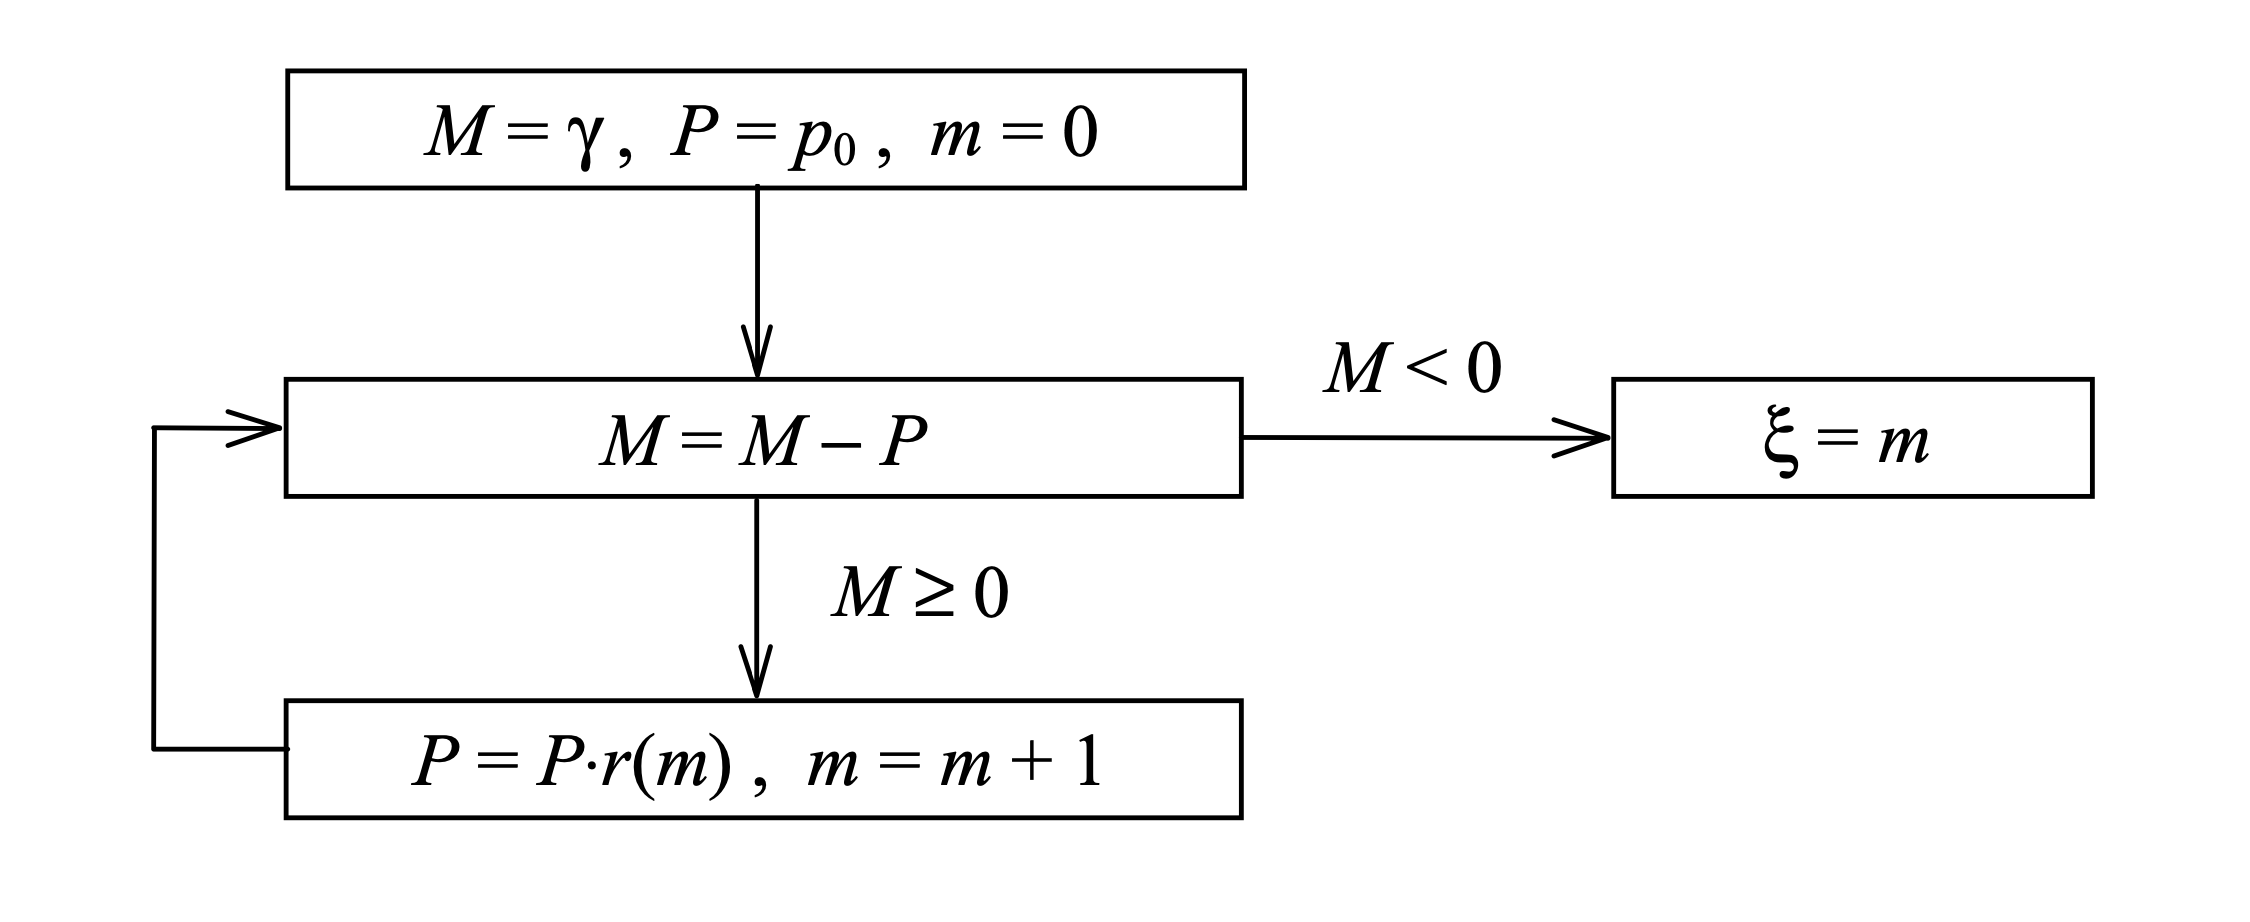

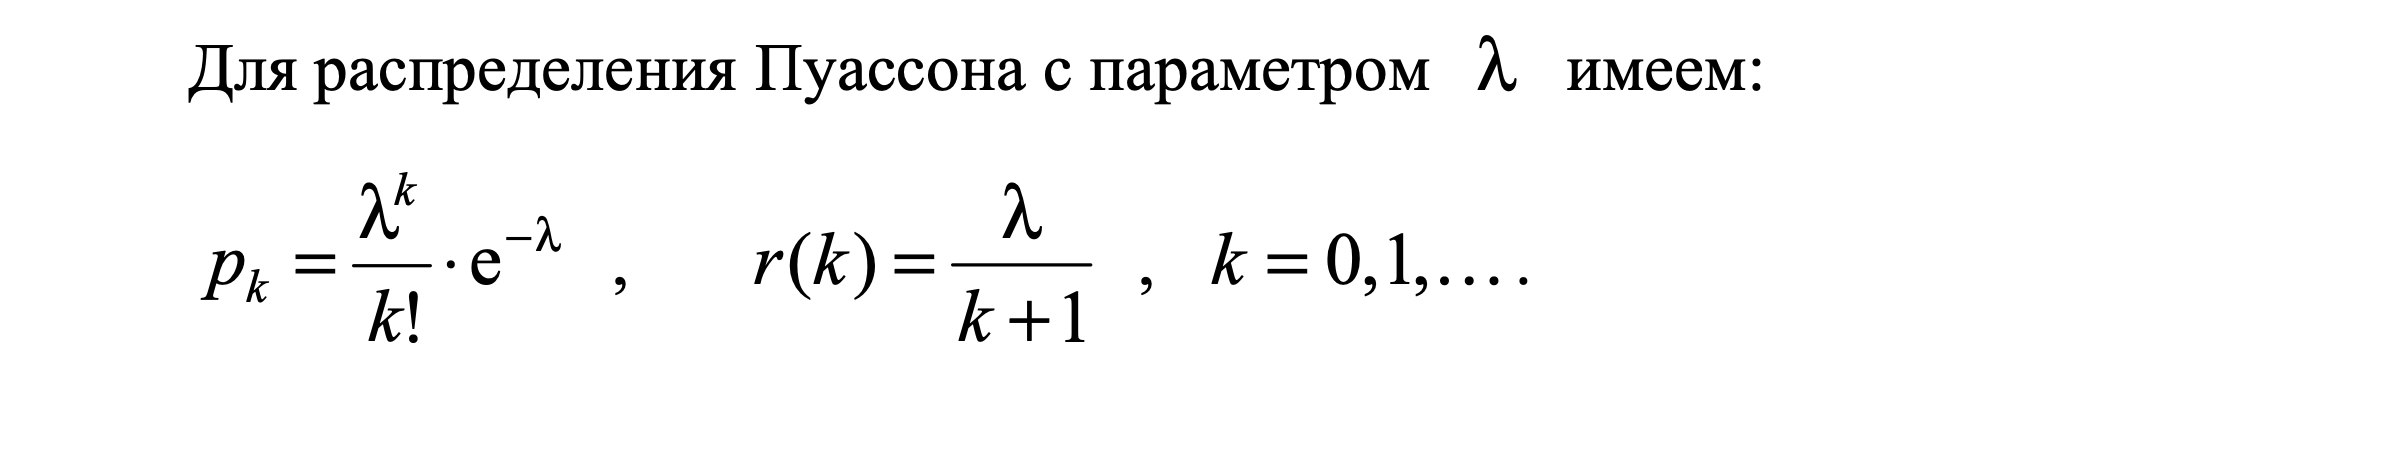

In [27]:
lam=2

In [28]:
def po_p(k,lam):
    return pow(lam,k)*math.exp(-lam)/math.factorial(k)

In [29]:
def r(k,lam):
    return lam/(k+1)

In [30]:
def random_PO(lam):
    while True:
        values=get_values(1,MCG)
        M=values[0]
        P=po_p(0,lam)
        m=0
        while True:
            M=M-P
            if M<0:
                break
            P=P*r(m,lam)
            m+=1
        yield m

In [31]:
PO=random_PO(lam)

<BarContainer object of 8 artists>

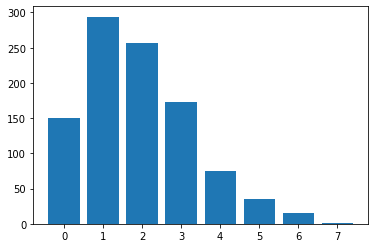

In [32]:
values_PO=get_values(n,PO)
plt.bar(list(Counter(values_PO).keys()),list(Counter(values_PO).values()))

https://homepage.divms.uiowa.edu/~mbognar/applets/pois.html

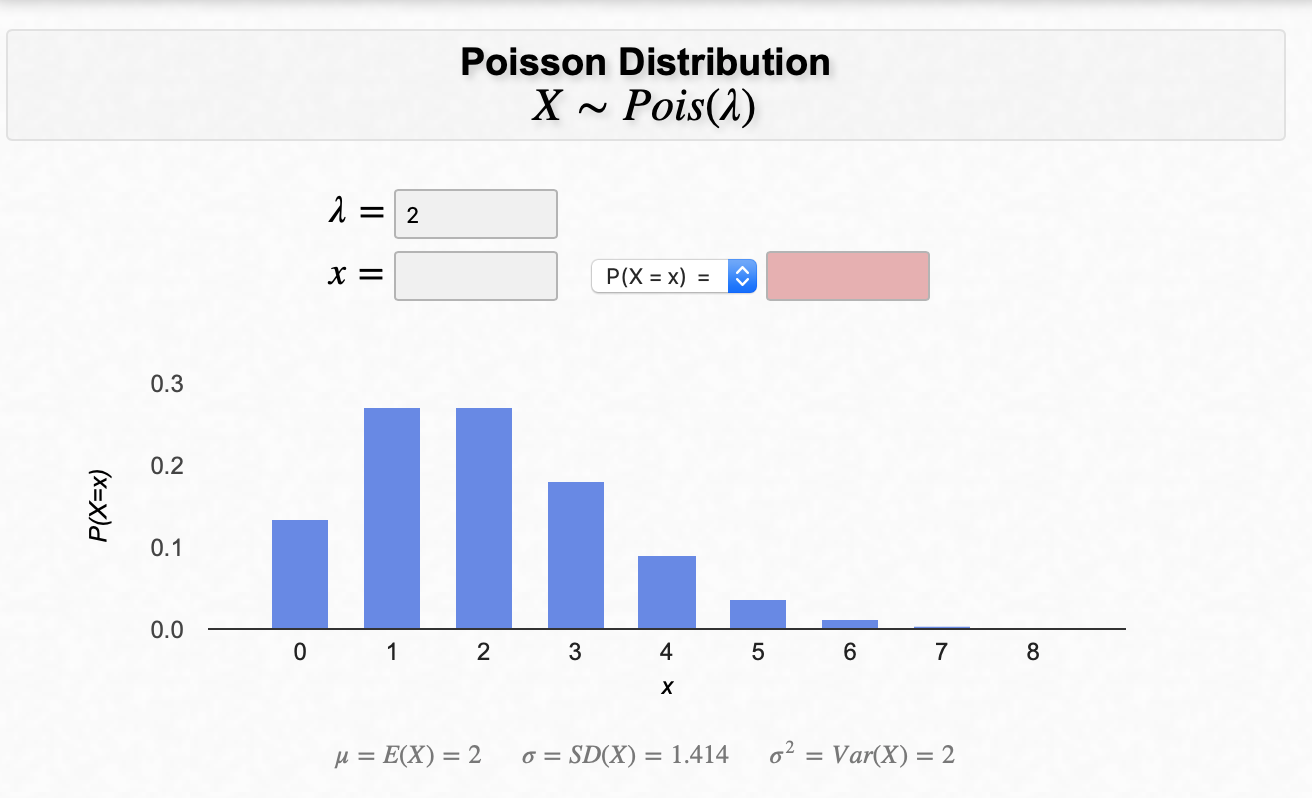

# Несмещенные оценки

## Выборочное среднее

In [33]:
sample_mean=sum(values_PO)/n
sample_mean

1.903

## Математическое ожидание

In [34]:
math_exp=lam
math_exp

2

## Выборочная дисперсия

In [35]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_PO])/n
sample_cov

1.9535910000000114

## Дисперсия

In [36]:
cov=lam
lam

2

# Критерий согласия хи-квадрат Пирсона

https://ru.wikipedia.org/wiki/Ошибки_первого_и_второго_рода

In [37]:
e=0.05

In [38]:
def get_chi_squared(values):
    po_keys=list(Counter(values).keys())
    po_values=list(Counter(values).values())
    n=len(values)
    K=len(po_values)
    res_sum=0
    for k in range(0,K):
        pk=po_p(po_keys[k],lam)
        vk=po_values[k]
        res_sum+=math.pow(vk-n*pk,2)/(n*pk)
    return res_sum

In [39]:
def chi_check_hypothesis(G,chi_sqared):
    print('X^2: {}, G-1: {}'.format(chi_sqared,G))
    if(chi_sqared<G):
        return True
    else:
        return False

In [40]:
def get_freqs(values,l):
    freqs=[0 for i in range(l)]
    for value in values:
        freqs[value]+=1
    return freqs

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [41]:
G=66.3386

In [42]:
chi_check_hypothesis(G,get_chi_squared(values_PO))

X^2: 10.342217918102596, G-1: 66.3386


True

# Покажем, что ошибка первого рода стремится к 0

In [43]:
t=10000

In [44]:
sum_fail_po=0
for i in range(t):
    values=get_values(n,PO)
    if(chi_check_hypothesis(G,get_chi_squared(values))==False):
        sum_fail_po+=1

X^2: 31.998066312966277, G-1: 66.3386
X^2: 13.68790693499029, G-1: 66.3386
X^2: 8.068235903656689, G-1: 66.3386
X^2: 9.713275812462038, G-1: 66.3386
X^2: 3.633878612285929, G-1: 66.3386
X^2: 8.624556243198066, G-1: 66.3386
X^2: 4.388485966389217, G-1: 66.3386
X^2: 7.316399445590493, G-1: 66.3386
X^2: 14.398809716415519, G-1: 66.3386
X^2: 5.767519855633071, G-1: 66.3386
X^2: 3.361701036734708, G-1: 66.3386
X^2: 15.224536735471027, G-1: 66.3386
X^2: 6.033768448510512, G-1: 66.3386
X^2: 4.670193730160949, G-1: 66.3386
X^2: 4.99715946253863, G-1: 66.3386
X^2: 27.843518226561596, G-1: 66.3386
X^2: 13.176844564054857, G-1: 66.3386
X^2: 22.34851044685253, G-1: 66.3386
X^2: 7.37551189438194, G-1: 66.3386
X^2: 9.890613158836379, G-1: 66.3386
X^2: 3.703444881310257, G-1: 66.3386
X^2: 28.78747014319999, G-1: 66.3386
X^2: 1.7616765232193758, G-1: 66.3386
X^2: 7.543906788729462, G-1: 66.3386
X^2: 7.703401258771988, G-1: 66.3386
X^2: 9.200902618914661, G-1: 66.3386
X^2: 13.002571981814473, G-1: 66.3

X^2: 5.630141259106424, G-1: 66.3386
X^2: 7.531605704471845, G-1: 66.3386
X^2: 34.11065529856401, G-1: 66.3386
X^2: 5.648613899353749, G-1: 66.3386
X^2: 4.5083155546809115, G-1: 66.3386
X^2: 4.825657776335345, G-1: 66.3386
X^2: 3.2496476951415345, G-1: 66.3386
X^2: 4.041200329739476, G-1: 66.3386
X^2: 7.020594628317336, G-1: 66.3386
X^2: 10.927800613942837, G-1: 66.3386
X^2: 6.405740309119102, G-1: 66.3386
X^2: 9.876077619954433, G-1: 66.3386
X^2: 17.144818983961542, G-1: 66.3386
X^2: 10.563259837154995, G-1: 66.3386
X^2: 5.3084234507060835, G-1: 66.3386
X^2: 2.603105286485098, G-1: 66.3386
X^2: 6.292091543876231, G-1: 66.3386
X^2: 14.374165520178478, G-1: 66.3386
X^2: 8.110765003947346, G-1: 66.3386
X^2: 7.873643417144242, G-1: 66.3386
X^2: 5.115384360121519, G-1: 66.3386
X^2: 10.53093271672217, G-1: 66.3386
X^2: 31.088531354101377, G-1: 66.3386
X^2: 9.153554812968041, G-1: 66.3386
X^2: 10.10606199103366, G-1: 66.3386
X^2: 6.253592867453702, G-1: 66.3386
X^2: 6.872132447642282, G-1: 6

X^2: 2.8792712581826314, G-1: 66.3386
X^2: 8.592229122765245, G-1: 66.3386
X^2: 9.266186623695809, G-1: 66.3386
X^2: 2.452847136566248, G-1: 66.3386
X^2: 7.586393861298309, G-1: 66.3386
X^2: 4.307206349300982, G-1: 66.3386
X^2: 14.130956432829295, G-1: 66.3386
X^2: 22.42031117050118, G-1: 66.3386
X^2: 3.0042554479489447, G-1: 66.3386
X^2: 4.007949577294293, G-1: 66.3386
X^2: 8.3631683836984, G-1: 66.3386
X^2: 5.336426279173926, G-1: 66.3386
X^2: 10.114374679144962, G-1: 66.3386
X^2: 9.210768702953834, G-1: 66.3386
X^2: 12.62271665141599, G-1: 66.3386
X^2: 18.77157753105458, G-1: 66.3386
X^2: 15.170966078753779, G-1: 66.3386
X^2: 8.275423342523593, G-1: 66.3386
X^2: 4.262242248791885, G-1: 66.3386
X^2: 0.8518989910385384, G-1: 66.3386
X^2: 6.547937611301707, G-1: 66.3386
X^2: 9.788332578779654, G-1: 66.3386
X^2: 8.071300667790638, G-1: 66.3386
X^2: 4.748702451212091, G-1: 66.3386
X^2: 9.878554647894697, G-1: 66.3386
X^2: 3.717929125411269, G-1: 66.3386
X^2: 12.307077076502626, G-1: 66.3

X^2: 5.269630906186701, G-1: 66.3386
X^2: 11.077722868043045, G-1: 66.3386
X^2: 3.1905352463500902, G-1: 66.3386
X^2: 7.063618142298969, G-1: 66.3386
X^2: 15.767002594826906, G-1: 66.3386
X^2: 18.16907559089487, G-1: 66.3386
X^2: 1.1031268984021798, G-1: 66.3386
X^2: 4.418965822797303, G-1: 66.3386
X^2: 11.544838092984481, G-1: 66.3386
X^2: 12.05030737706479, G-1: 66.3386
X^2: 3.1261748735812964, G-1: 66.3386
X^2: 29.037774418551265, G-1: 66.3386
X^2: 18.554524008148494, G-1: 66.3386
X^2: 6.953412064730523, G-1: 66.3386
X^2: 26.01657410610099, G-1: 66.3386
X^2: 13.549068265038493, G-1: 66.3386
X^2: 5.805631341456028, G-1: 66.3386
X^2: 4.456834735304327, G-1: 66.3386
X^2: 5.825951245728084, G-1: 66.3386
X^2: 7.0494697940166215, G-1: 66.3386
X^2: 5.686482811860763, G-1: 66.3386
X^2: 4.492226619871103, G-1: 66.3386
X^2: 8.94782744752629, G-1: 66.3386
X^2: 6.819485422937403, G-1: 66.3386
X^2: 9.257925230365437, G-1: 66.3386
X^2: 10.391464282854862, G-1: 66.3386
X^2: 2.9968663918500105, G-1

X^2: 35.69745509580936, G-1: 66.3386
X^2: 8.18553716922721, G-1: 66.3386
X^2: 5.216060249469446, G-1: 66.3386
X^2: 5.916173314843135, G-1: 66.3386
X^2: 1.5975638931150213, G-1: 66.3386
X^2: 7.569768485075712, G-1: 66.3386
X^2: 34.009055777203706, G-1: 66.3386
X^2: 8.305903198931682, G-1: 66.3386
X^2: 5.091663795896847, G-1: 66.3386
X^2: 9.756929090359185, G-1: 66.3386
X^2: 8.128565852557347, G-1: 66.3386
X^2: 5.283779254469052, G-1: 66.3386
X^2: 7.976553761116491, G-1: 66.3386
X^2: 29.47095783235107, G-1: 66.3386
X^2: 29.57377485382058, G-1: 66.3386
X^2: 3.6311077162488328, G-1: 66.3386
X^2: 3.5556637593316385, G-1: 66.3386
X^2: 3.096324781088722, G-1: 66.3386
X^2: 7.621491877768225, G-1: 66.3386
X^2: 7.102116818721491, G-1: 66.3386
X^2: 10.239988632826778, G-1: 66.3386
X^2: 15.291089535142302, G-1: 66.3386
X^2: 11.416401948484634, G-1: 66.3386
X^2: 17.580479425701604, G-1: 66.3386
X^2: 19.571442853763823, G-1: 66.3386
X^2: 4.17239810321731, G-1: 66.3386
X^2: 7.131966911214072, G-1: 66

X^2: 7.34663672868264, G-1: 66.3386
X^2: 4.441132991094106, G-1: 66.3386
X^2: 3.3681664608212794, G-1: 66.3386
X^2: 5.389703067794329, G-1: 66.3386
X^2: 12.413294757924751, G-1: 66.3386
X^2: 4.60306246135506, G-1: 66.3386
X^2: 11.583579342722935, G-1: 66.3386
X^2: 1.582491912820307, G-1: 66.3386
X^2: 10.427485931337142, G-1: 66.3386
X^2: 8.51649129775121, G-1: 66.3386
X^2: 6.726879648384841, G-1: 66.3386
X^2: 10.85235665702566, G-1: 66.3386
X^2: 3.640637904469347, G-1: 66.3386
X^2: 9.316734544000909, G-1: 66.3386
X^2: 8.091377998746756, G-1: 66.3386
X^2: 2.4922694450011393, G-1: 66.3386
X^2: 21.15707644568088, G-1: 66.3386
X^2: 5.094140823837094, G-1: 66.3386
X^2: 22.786363315495098, G-1: 66.3386
X^2: 8.143050096658351, G-1: 66.3386
X^2: 8.155057312819117, G-1: 66.3386
X^2: 22.809402821023337, G-1: 66.3386
X^2: 4.540885248429662, G-1: 66.3386
X^2: 12.464766310242227, G-1: 66.3386
X^2: 3.9380474124513016, G-1: 66.3386
X^2: 7.976166570516899, G-1: 66.3386
X^2: 5.701260924058623, G-1: 66.

X^2: 9.291418556126562, G-1: 66.3386
X^2: 15.277477628272756, G-1: 66.3386
X^2: 3.18961161433772, G-1: 66.3386
X^2: 6.234583785793587, G-1: 66.3386
X^2: 11.741571711618505, G-1: 66.3386
X^2: 4.564269916835674, G-1: 66.3386
X^2: 7.091714293269542, G-1: 66.3386
X^2: 7.659990554190767, G-1: 66.3386
X^2: 26.4358759696704, G-1: 66.3386
X^2: 7.686146118633877, G-1: 66.3386
X^2: 13.206452083231504, G-1: 66.3386
X^2: 4.9808279544128835, G-1: 66.3386
X^2: 7.803447384204398, G-1: 66.3386
X^2: 7.973395674479808, G-1: 66.3386
X^2: 15.163628317435759, G-1: 66.3386
X^2: 19.526865943854315, G-1: 66.3386
X^2: 6.482653606520549, G-1: 66.3386
X^2: 10.441097838206705, G-1: 66.3386
X^2: 6.846564619392888, G-1: 66.3386
X^2: 15.242379611802843, G-1: 66.3386
X^2: 5.005472150649934, G-1: 66.3386
X^2: 9.562429926349465, G-1: 66.3386
X^2: 9.40317802962289, G-1: 66.3386
X^2: 4.079992874258863, G-1: 66.3386
X^2: 8.826589080590363, G-1: 66.3386
X^2: 5.9949759039911195, G-1: 66.3386
X^2: 1.1215995386495052, G-1: 66

X^2: 3.714234597361793, G-1: 66.3386
X^2: 3.166520814028563, G-1: 66.3386
X^2: 8.659654259667988, G-1: 66.3386
X^2: 5.559651358069726, G-1: 66.3386
X^2: 10.486985570728171, G-1: 66.3386
X^2: 5.664315643563977, G-1: 66.3386
X^2: 1.6446691257457016, G-1: 66.3386
X^2: 2.5135129812855688, G-1: 66.3386
X^2: 7.027302625719825, G-1: 66.3386
X^2: 8.095072526796226, G-1: 66.3386
X^2: 7.269294212959806, G-1: 66.3386
X^2: 10.802237955041942, G-1: 66.3386
X^2: 15.253463195951223, G-1: 66.3386
X^2: 3.966680004834657, G-1: 66.3386
X^2: 14.950511895895058, G-1: 66.3386
X^2: 10.23692386869282, G-1: 66.3386
X^2: 31.14579653886809, G-1: 66.3386
X^2: 6.407545545422018, G-1: 66.3386
X^2: 7.7071470816023755, G-1: 66.3386
X^2: 30.211710706268864, G-1: 66.3386
X^2: 11.151319560935496, G-1: 66.3386
X^2: 3.315225568019543, G-1: 66.3386
X^2: 1.752440203095707, G-1: 66.3386
X^2: 7.338860481984127, G-1: 66.3386
X^2: 4.515023552083403, G-1: 66.3386
X^2: 3.9232693002534442, G-1: 66.3386
X^2: 12.685766201572825, G-1

X^2: 5.291168310567975, G-1: 66.3386
X^2: 9.407796189684717, G-1: 66.3386
X^2: 3.541809279146149, G-1: 66.3386
X^2: 8.495383111691313, G-1: 66.3386
X^2: 5.354898919421249, G-1: 66.3386
X^2: 16.002915948579904, G-1: 66.3386
X^2: 5.5913487145870375, G-1: 66.3386
X^2: 16.309855644782377, G-1: 66.3386
X^2: 6.046699296683635, G-1: 66.3386
X^2: 5.635389183083767, G-1: 66.3386
X^2: 9.68580942540698, G-1: 66.3386
X^2: 8.018653643085756, G-1: 66.3386
X^2: 4.921715505621451, G-1: 66.3386
X^2: 31.105786494239478, G-1: 66.3386
X^2: 29.67352711115615, G-1: 66.3386
X^2: 12.98750000151976, G-1: 66.3386
X^2: 4.915931140231315, G-1: 66.3386
X^2: 4.7222109909503205, G-1: 66.3386
X^2: 7.267740817031926, G-1: 66.3386
X^2: 2.5091886893205904, G-1: 66.3386
X^2: 8.184613537214846, G-1: 66.3386
X^2: 7.978013834541638, G-1: 66.3386
X^2: 1.567084036706931, G-1: 66.3386
X^2: 4.569811708909868, G-1: 66.3386
X^2: 5.4260185843734625, G-1: 66.3386
X^2: 8.03897354735781, G-1: 66.3386
X^2: 8.506088772299247, G-1: 66.3

X^2: 3.951901892636801, G-1: 66.3386
X^2: 6.464180966273216, G-1: 66.3386
X^2: 4.200358903963336, G-1: 66.3386
X^2: 5.8940481742681445, G-1: 66.3386
X^2: 6.61103845623946, G-1: 66.3386
X^2: 12.47098916101287, G-1: 66.3386
X^2: 12.298470520294474, G-1: 66.3386
X^2: 4.861385556720782, G-1: 66.3386
X^2: 11.37027164264724, G-1: 66.3386
X^2: 3.8872476517711565, G-1: 66.3386
X^2: 3.2480942992136557, G-1: 66.3386
X^2: 6.3669057368779, G-1: 66.3386
X^2: 2.32971021082467, G-1: 66.3386
X^2: 12.716246057980914, G-1: 66.3386
X^2: 36.49583327504855, G-1: 66.3386
X^2: 1.4550306951137495, G-1: 66.3386
X^2: 13.142964047694154, G-1: 66.3386
X^2: 29.937391998596077, G-1: 66.3386
X^2: 868.2038458201257, G-1: 66.3386
X^2: 8.407502720291975, G-1: 66.3386
X^2: 29.544284881882692, G-1: 66.3386
X^2: 2.1006494717578197, G-1: 66.3386
X^2: 4.417118558772573, G-1: 66.3386
X^2: 5.530137161395807, G-1: 66.3386
X^2: 6.301327863999896, G-1: 66.3386
X^2: 5.75638497670376, G-1: 66.3386
X^2: 4.727458914927671, G-1: 66.3

X^2: 7.9844792586282045, G-1: 66.3386
X^2: 6.778215850477766, G-1: 66.3386
X^2: 1.727502138761816, G-1: 66.3386
X^2: 18.91566412498373, G-1: 66.3386
X^2: 2.1332704602874926, G-1: 66.3386
X^2: 7.853323512872183, G-1: 66.3386
X^2: 11.913073397821783, G-1: 66.3386
X^2: 8.707389256214185, G-1: 66.3386
X^2: 10.270225915918935, G-1: 66.3386
X^2: 7.355234017831691, G-1: 66.3386
X^2: 12.15190689842508, G-1: 66.3386
X^2: 5.5460907459810915, G-1: 66.3386
X^2: 4.90509012939885, G-1: 66.3386
X^2: 10.049477864963386, G-1: 66.3386
X^2: 5.921715106917322, G-1: 66.3386
X^2: 8.991867916023018, G-1: 66.3386
X^2: 6.728045853713133, G-1: 66.3386
X^2: 6.997503828008171, G-1: 66.3386
X^2: 5.617210410933294, G-1: 66.3386
X^2: 5.669563567541317, G-1: 66.3386
X^2: 1.0089164331408136, G-1: 66.3386
X^2: 5.288397414530882, G-1: 66.3386
X^2: 1.4811862595568601, G-1: 66.3386
X^2: 4.565193548848045, G-1: 66.3386
X^2: 3.239781611102359, G-1: 66.3386
X^2: 14.296580431139718, G-1: 66.3386
X^2: 6.9922559040308325, G-1: 

X^2: 3.172986238115129, G-1: 66.3386
X^2: 17.784895968531416, G-1: 66.3386
X^2: 1.9196175973340184, G-1: 66.3386
X^2: 24.569896731374474, G-1: 66.3386
X^2: 1.9002213250743205, G-1: 66.3386
X^2: 3.22378599879527, G-1: 66.3386
X^2: 9.939808228807724, G-1: 66.3386
X^2: 4.44327412321568, G-1: 66.3386
X^2: 12.891199698917728, G-1: 66.3386
X^2: 5.956813123387257, G-1: 66.3386
X^2: 7.036538945843483, G-1: 66.3386
X^2: 12.588248398861573, G-1: 66.3386
X^2: 6.514057094941005, G-1: 66.3386
X^2: 5.7123445082070265, G-1: 66.3386
X^2: 5.408175708041642, G-1: 66.3386
X^2: 7.584000888801669, G-1: 66.3386
X^2: 18.351082392111977, G-1: 66.3386
X^2: 4.54180888044203, G-1: 66.3386
X^2: 7.769272999746846, G-1: 66.3386
X^2: 2.6144827387303504, G-1: 66.3386
X^2: 6.066482759542911, G-1: 66.3386
X^2: 3.4399158896890007, G-1: 66.3386
X^2: 3.1926763784716745, G-1: 66.3386
X^2: 7.107028846880191, G-1: 66.3386
X^2: 5.5150651811011, G-1: 66.3386
X^2: 12.563604202624536, G-1: 66.3386
X^2: 5.919867842892591, G-1: 66

X^2: 9.223699551126957, G-1: 66.3386
X^2: 6.148004949947081, G-1: 66.3386
X^2: 7.210475632265211, G-1: 66.3386
X^2: 4.827505040360078, G-1: 66.3386
X^2: 5.457422072793919, G-1: 66.3386
X^2: 5.095988087861828, G-1: 66.3386
X^2: 6.533840557800277, G-1: 66.3386
X^2: 154.18943957725415, G-1: 66.3386
X^2: 15.40839080071284, G-1: 66.3386
X^2: 10.709571618649344, G-1: 66.3386
X^2: 5.701941982755061, G-1: 66.3386
X^2: 5.819873012241102, G-1: 66.3386
X^2: 9.79941616292804, G-1: 66.3386
X^2: 3.412206929318005, G-1: 66.3386
X^2: 26.735453679818853, G-1: 66.3386
X^2: 15.050651343830218, G-1: 66.3386
X^2: 7.591641785275652, G-1: 66.3386
X^2: 4.140322823159534, G-1: 66.3386
X^2: 11.775988669391985, G-1: 66.3386
X^2: 7.650754234067104, G-1: 66.3386
X^2: 3.1936000104840443, G-1: 66.3386
X^2: 5.589207582465458, G-1: 66.3386
X^2: 24.281429675419332, G-1: 66.3386
X^2: 33.90691981443064, G-1: 66.3386
X^2: 4.085828534429917, G-1: 66.3386
X^2: 7.776662055845778, G-1: 66.3386
X^2: 44.134833528775786, G-1: 66

X^2: 7.04699276607637, G-1: 66.3386
X^2: 9.267404123805019, G-1: 66.3386
X^2: 8.010047086877604, G-1: 66.3386
X^2: 153.4117414228417, G-1: 66.3386
X^2: 35.015814670683014, G-1: 66.3386
X^2: 20.551122550787657, G-1: 66.3386
X^2: 7.259563479145165, G-1: 66.3386
X^2: 27.1055362486809, G-1: 66.3386
X^2: 8.212322497585825, G-1: 66.3386
X^2: 4.897407205203064, G-1: 66.3386
X^2: 4.490379355846374, G-1: 66.3386
X^2: 12.26366637192141, G-1: 66.3386
X^2: 1.4919759756084092, G-1: 66.3386
X^2: 9.522755777539526, G-1: 66.3386
X^2: 6.773303822319094, G-1: 66.3386
X^2: 14.755625541285776, G-1: 66.3386
X^2: 7.094727762622569, G-1: 66.3386
X^2: 6.587653787833449, G-1: 66.3386
X^2: 6.741900333898635, G-1: 66.3386
X^2: 2.7687292847955276, G-1: 66.3386
X^2: 6.466657994213463, G-1: 66.3386
X^2: 2.6209481628169136, G-1: 66.3386
X^2: 2.4026771398016034, G-1: 66.3386
X^2: 2.9220521988483346, G-1: 66.3386
X^2: 8.764948309077745, G-1: 66.3386
X^2: 2.7582754645626446, G-1: 66.3386
X^2: 5.806554973468388, G-1: 66

X^2: 5.889681854581358, G-1: 66.3386
X^2: 8.682451191880297, G-1: 66.3386
X^2: 7.684004986512285, G-1: 66.3386
X^2: 4.54273251245439, G-1: 66.3386
X^2: 27.256061196651714, G-1: 66.3386
X^2: 3.094477517063993, G-1: 66.3386
X^2: 11.330504171334564, G-1: 66.3386
X^2: 9.145242124856747, G-1: 66.3386
X^2: 9.479839486649281, G-1: 66.3386
X^2: 11.353888839740588, G-1: 66.3386
X^2: 26.679472247619188, G-1: 66.3386
X^2: 7.4173692030352685, G-1: 66.3386
X^2: 8.82653778580945, G-1: 66.3386
X^2: 7.910588697638898, G-1: 66.3386
X^2: 10.404101262931134, G-1: 66.3386
X^2: 3.7530271418811796, G-1: 66.3386
X^2: 11.313249031196452, G-1: 66.3386
X^2: 10.056815626281397, G-1: 66.3386
X^2: 8.914576695081092, G-1: 66.3386
X^2: 8.473710357085498, G-1: 66.3386
X^2: 4.985203541158793, G-1: 66.3386
X^2: 9.745845506210786, G-1: 66.3386
X^2: 3.7348483697307118, G-1: 66.3386
X^2: 4.461746763463012, G-1: 66.3386
X^2: 4.496550911836085, G-1: 66.3386
X^2: 3.9580734486265046, G-1: 66.3386
X^2: 10.442264043535005, G-1:

X^2: 8.564277589078326, G-1: 66.3386
X^2: 7.898287613381269, G-1: 66.3386
X^2: 8.210526528342022, G-1: 66.3386
X^2: 6.177855042439656, G-1: 66.3386
X^2: 13.675899718829527, G-1: 66.3386
X^2: 5.091127354484067, G-1: 66.3386
X^2: 8.66796694777928, G-1: 66.3386
X^2: 6.838932989978016, G-1: 66.3386
X^2: 9.2655568597803, G-1: 66.3386
X^2: 9.503611345654882, G-1: 66.3386
X^2: 5.368459531509895, G-1: 66.3386
X^2: 5.353051655396518, G-1: 66.3386
X^2: 6.002994724005564, G-1: 66.3386
X^2: 23.626187388052017, G-1: 66.3386
X^2: 14.999221819234553, G-1: 66.3386
X^2: 8.659360391571136, G-1: 66.3386
X^2: 6.132303205736855, G-1: 66.3386
X^2: 4.883846593114427, G-1: 66.3386
X^2: 2.011057166558282, G-1: 66.3386
X^2: 8.103333920126603, G-1: 66.3386
X^2: 29.83516271332026, G-1: 66.3386
X^2: 7.556543768805734, G-1: 66.3386
X^2: 4.24931140061876, G-1: 66.3386
X^2: 12.848955199664813, G-1: 66.3386
X^2: 4.336132809781194, G-1: 66.3386
X^2: 6.9444696127037115, G-1: 66.3386
X^2: 3.412500797414863, G-1: 66.3386


X^2: 7.800382620070445, G-1: 66.3386
X^2: 5.545796877884234, G-1: 66.3386
X^2: 5.944805907226494, G-1: 66.3386
X^2: 20.419094467800186, G-1: 66.3386
X^2: 5.729893516441981, G-1: 66.3386
X^2: 6.396755829370477, G-1: 66.3386
X^2: 6.442643561891942, G-1: 66.3386
X^2: 4.752690847358407, G-1: 66.3386
X^2: 5.1135370960967865, G-1: 66.3386
X^2: 9.975829877290014, G-1: 66.3386
X^2: 4.985446114474719, G-1: 66.3386
X^2: 8.548524550087183, G-1: 66.3386
X^2: 6.655078924736196, G-1: 66.3386
X^2: 5.955889491374884, G-1: 66.3386
X^2: 5.377989719730411, G-1: 66.3386
X^2: 1.058162797893084, G-1: 66.3386
X^2: 6.04182929624676, G-1: 66.3386
X^2: 17.166305093561903, G-1: 66.3386
X^2: 14.271399793489888, G-1: 66.3386
X^2: 7.675743593181912, G-1: 66.3386
X^2: 9.342605507406283, G-1: 66.3386
X^2: 8.360784678260881, G-1: 66.3386
X^2: 11.267991062590506, G-1: 66.3386
X^2: 10.699957374985212, G-1: 66.3386
X^2: 4.193599611779922, G-1: 66.3386
X^2: 2.067398719312627, G-1: 66.3386
X^2: 7.2418791206856765, G-1: 66.

X^2: 3.617253236063333, G-1: 66.3386
X^2: 3.5898381437891898, G-1: 66.3386
X^2: 5.950641567397547, G-1: 66.3386
X^2: 33.49182185027856, G-1: 66.3386
X^2: 31.519573635779587, G-1: 66.3386
X^2: 9.485138705407552, G-1: 66.3386
X^2: 18.626324731797137, G-1: 66.3386
X^2: 2.5827853822130407, G-1: 66.3386
X^2: 5.544873245871866, G-1: 66.3386
X^2: 3.0612267646187994, G-1: 66.3386
X^2: 5.309640950815308, G-1: 66.3386
X^2: 10.004891687994753, G-1: 66.3386
X^2: 5618.433993505116, G-1: 66.3386
X^2: 9.187677902644669, G-1: 66.3386
X^2: 3.979610853007793, G-1: 66.3386
X^2: 6.363211208828435, G-1: 66.3386
X^2: 4.414389690457281, G-1: 66.3386
X^2: 5.87120921433404, G-1: 66.3386
X^2: 3.7865717624232262, G-1: 66.3386
X^2: 4.578805455717605, G-1: 66.3386
X^2: 4.793330655902521, G-1: 66.3386
X^2: 9.494752949071696, G-1: 66.3386
X^2: 5.565487018240775, G-1: 66.3386
X^2: 3.6480269605682705, G-1: 66.3386
X^2: 9.641475088813403, G-1: 66.3386
X^2: 16.54348324913014, G-1: 66.3386
X^2: 3.4722430101218222, G-1: 6

X^2: 8.972471643763324, G-1: 66.3386
X^2: 15.024108588787524, G-1: 66.3386
X^2: 9.592270751782939, G-1: 66.3386
X^2: 17.459096441482025, G-1: 66.3386
X^2: 5.485131033164905, G-1: 66.3386
X^2: 6.535300631225429, G-1: 66.3386
X^2: 9.151656254162386, G-1: 66.3386
X^2: 1.9531622178760577, G-1: 66.3386
X^2: 3.4780786702928657, G-1: 66.3386
X^2: 3.482696830354705, G-1: 66.3386
X^2: 168.7163238677518, G-1: 66.3386
X^2: 5.870915346237177, G-1: 66.3386
X^2: 7.226177376475441, G-1: 66.3386
X^2: 10.360984426446764, G-1: 66.3386
X^2: 38.1836298997836, G-1: 66.3386
X^2: 15.870449380211944, G-1: 66.3386
X^2: 12.02415181262168, G-1: 66.3386
X^2: 24.18289491819299, G-1: 66.3386
X^2: 11.893289934962521, G-1: 66.3386
X^2: 8.778802789263242, G-1: 66.3386
X^2: 10.287481056057054, G-1: 66.3386
X^2: 10.310865724463063, G-1: 66.3386
X^2: 14.183360884218239, G-1: 66.3386
X^2: 2.370350019368784, G-1: 66.3386
X^2: 4.481772799638221, G-1: 66.3386
X^2: 12.531225787410794, G-1: 66.3386
X^2: 8.542352994097463, G-1:

X^2: 4.786571363719107, G-1: 66.3386
X^2: 6.518381386905977, G-1: 66.3386
X^2: 1.6252728534860084, G-1: 66.3386
X^2: 9.034406283372784, G-1: 66.3386
X^2: 6.62275180430338, G-1: 66.3386
X^2: 10.77569519999924, G-1: 66.3386
X^2: 5.893376382630823, G-1: 66.3386
X^2: 5.813944029567319, G-1: 66.3386
X^2: 12.437309190246287, G-1: 66.3386
X^2: 3.8974076039071823, G-1: 66.3386
X^2: 10.56695436520446, G-1: 66.3386
X^2: 21.611745969081053, G-1: 66.3386
X^2: 5.733294176394592, G-1: 66.3386
X^2: 3.3835743369346463, G-1: 66.3386
X^2: 12.160606777135971, G-1: 66.3386
X^2: 5.275172698260894, G-1: 66.3386
X^2: 14.987457176389725, G-1: 66.3386
X^2: 3.276433023500156, G-1: 66.3386
X^2: 10.712645649842404, G-1: 66.3386
X^2: 4.823516644213761, G-1: 66.3386
X^2: 7.767425735722107, G-1: 66.3386
X^2: 2.3500301150967227, G-1: 66.3386
X^2: 5.261318218075404, G-1: 66.3386
X^2: 7.097498658659664, G-1: 66.3386
X^2: 10.348053578273635, G-1: 66.3386
X^2: 6.356503211425941, G-1: 66.3386
X^2: 2.67514858344967, G-1: 6

X^2: 6.065171936930964, G-1: 66.3386
X^2: 8.288060322599867, G-1: 66.3386
X^2: 5.39524485986852, G-1: 66.3386
X^2: 8.208627969536375, G-1: 66.3386
X^2: 7.240955488673303, G-1: 66.3386
X^2: 11.456411993113246, G-1: 66.3386
X^2: 4.776411411583085, G-1: 66.3386
X^2: 4.168955415542881, G-1: 66.3386
X^2: 3.717929125411256, G-1: 66.3386
X^2: 11.439544043574708, G-1: 66.3386
X^2: 8.843163162032036, G-1: 66.3386
X^2: 10.152873355567483, G-1: 66.3386
X^2: 11.695338816219277, G-1: 66.3386
X^2: 0.9350258721515058, G-1: 66.3386
X^2: 4.070126790219688, G-1: 66.3386
X^2: 13.521653172764347, G-1: 66.3386
X^2: 14.897571003093349, G-1: 66.3386
X^2: 3.5085585267009614, G-1: 66.3386
X^2: 3.952825524649169, G-1: 66.3386
X^2: 3.6745184208300476, G-1: 66.3386
X^2: 2.812769753292258, G-1: 66.3386
X^2: 14.910553146047391, G-1: 66.3386
X^2: 8.612306453721374, G-1: 66.3386
X^2: 5.692948235947329, G-1: 66.3386
X^2: 8.904416742945058, G-1: 66.3386
X^2: 6.506668038842063, G-1: 66.3386
X^2: 3.3182903321534947, G-1:

X^2: 2.2533426218951083, G-1: 66.3386
X^2: 7.483576839828787, G-1: 66.3386
X^2: 15.560109024056853, G-1: 66.3386
X^2: 6.184320466526225, G-1: 66.3386
X^2: 10.971505186620917, G-1: 66.3386
X^2: 6.655078924736191, G-1: 66.3386
X^2: 9.349994563505224, G-1: 66.3386
X^2: 4.949811656592017, G-1: 66.3386
X^2: 33.606058351715134, G-1: 66.3386
X^2: 3.325679388252428, G-1: 66.3386
X^2: 12.126674965994347, G-1: 66.3386
X^2: 2.3152259667236597, G-1: 66.3386
X^2: 4.928861988404442, G-1: 66.3386
X^2: 7.47156962366804, G-1: 66.3386
X^2: 6.571322279707711, G-1: 66.3386
X^2: 4.185286923668622, G-1: 66.3386
X^2: 6.188938626588043, G-1: 66.3386
X^2: 10.088219114701856, G-1: 66.3386
X^2: 15.630692247596269, G-1: 66.3386
X^2: 4.72775278302451, G-1: 66.3386
X^2: 8.639334355395926, G-1: 66.3386
X^2: 7.230795536537269, G-1: 66.3386
X^2: 9.095072128092111, G-1: 66.3386
X^2: 5.465440892808367, G-1: 66.3386
X^2: 3.9183572720947586, G-1: 66.3386
X^2: 8.905340374957436, G-1: 66.3386
X^2: 8.998627208206427, G-1: 66

X^2: 1.8081519919345426, G-1: 66.3386
X^2: 15.884303860397422, G-1: 66.3386
X^2: 9.322285603134233, G-1: 66.3386
X^2: 3.3226566518402834, G-1: 66.3386
X^2: 5.1406162925522665, G-1: 66.3386
X^2: 5.16647798889852, G-1: 66.3386
X^2: 27.602450271333982, G-1: 66.3386
X^2: 5.612592250871457, G-1: 66.3386
X^2: 3.363254432662586, G-1: 66.3386
X^2: 8.264339758375197, G-1: 66.3386
X^2: 9.831449415263998, G-1: 66.3386
X^2: 12.447226569066373, G-1: 66.3386
X^2: 5.396219786661806, G-1: 66.3386
X^2: 6.379836585051034, G-1: 66.3386
X^2: 0.5748093873286364, G-1: 66.3386
X^2: 5.144310820601733, G-1: 66.3386
X^2: 7.738550570022823, G-1: 66.3386
X^2: 12.568171067905444, G-1: 66.3386
X^2: 10.92046285262484, G-1: 66.3386
X^2: 5.151699876700658, G-1: 66.3386
X^2: 4.953118994041901, G-1: 66.3386
X^2: 3.398646317229367, G-1: 66.3386
X^2: 12.496127770940879, G-1: 66.3386
X^2: 2.69177395967227, G-1: 66.3386
X^2: 7.2203417163043895, G-1: 66.3386
X^2: 13.296286961746963, G-1: 66.3386
X^2: 9.343823007515503, G-1: 

X^2: 4.131716266951383, G-1: 66.3386
X^2: 6.356745784741874, G-1: 66.3386
X^2: 7.973395674479805, G-1: 66.3386
X^2: 2.911598378615455, G-1: 66.3386
X^2: 22.15299432832772, G-1: 66.3386
X^2: 40.57676044382475, G-1: 66.3386
X^2: 6.67661632911748, G-1: 66.3386
X^2: 4.933428853685358, G-1: 66.3386
X^2: 6.3625814449129265, G-1: 66.3386
X^2: 20.707510228974424, G-1: 66.3386
X^2: 7.324712133701785, G-1: 66.3386
X^2: 10.137171611357275, G-1: 66.3386
X^2: 6.420770261692005, G-1: 66.3386
X^2: 6.371817765036594, G-1: 66.3386
X^2: 3.1295755335339157, G-1: 66.3386
X^2: 8.017487437757454, G-1: 66.3386
X^2: 1.6979459143660949, G-1: 66.3386
X^2: 12.872045999973967, G-1: 66.3386
X^2: 9.562672499665407, G-1: 66.3386
X^2: 5.17940883707165, G-1: 66.3386
X^2: 16.873513745641773, G-1: 66.3386
X^2: 9.156568282321073, G-1: 66.3386
X^2: 8.897951318858503, G-1: 66.3386
X^2: 6.659990952894882, G-1: 66.3386
X^2: 6.868731787689677, G-1: 66.3386
X^2: 11.897614226927498, G-1: 66.3386
X^2: 9.599911648256905, G-1: 66.

X^2: 11.50876514972126, G-1: 66.3386
X^2: 8.873643018440127, G-1: 66.3386
X^2: 10.454901023611276, G-1: 66.3386
X^2: 21.757143385622157, G-1: 66.3386
X^2: 12.052154641089517, G-1: 66.3386
X^2: 14.24670430247192, G-1: 66.3386
X^2: 2.132346828275124, G-1: 66.3386
X^2: 5.789005965233432, G-1: 66.3386
X^2: 11.522619629906762, G-1: 66.3386
X^2: 10.493693568130672, G-1: 66.3386
X^2: 6.94053251133832, G-1: 66.3386
X^2: 31.41833423497398, G-1: 66.3386
X^2: 15.64945875594045, G-1: 66.3386
X^2: 2.721330184067992, G-1: 66.3386
X^2: 5.568887678193387, G-1: 66.3386
X^2: 13.093768977722803, G-1: 66.3386
X^2: 12.223026563377292, G-1: 66.3386
X^2: 14.723928184768473, G-1: 66.3386
X^2: 7.734804747192433, G-1: 66.3386
X^2: 31.79856179829514, G-1: 66.3386
X^2: 2.9688635633821647, G-1: 66.3386
X^2: 26.978368899071196, G-1: 66.3386
X^2: 4.869698244832081, G-1: 66.3386
X^2: 11.852113685005609, G-1: 66.3386
X^2: 6.179165865051606, G-1: 66.3386
X^2: 1.8863668448888302, G-1: 66.3386
X^2: 5.690177339910234, G-1

X^2: 5.2061941654302775, G-1: 66.3386
X^2: 10.79139694420948, G-1: 66.3386
X^2: 15.170336314838263, G-1: 66.3386
X^2: 3.1280221376060267, G-1: 66.3386
X^2: 4.418965822797312, G-1: 66.3386
X^2: 2.9226819627638547, G-1: 66.3386
X^2: 9.502393845545662, G-1: 66.3386
X^2: 6.154764242130499, G-1: 66.3386
X^2: 8.399190032180682, G-1: 66.3386
X^2: 11.489420172242497, G-1: 66.3386
X^2: 8.229241741905279, G-1: 66.3386
X^2: 4.38386780632739, G-1: 66.3386
X^2: 14.551502866552816, G-1: 66.3386
X^2: 11.051324730284001, G-1: 66.3386
X^2: 5.778846013097397, G-1: 66.3386
X^2: 1.6610006338714407, G-1: 66.3386
X^2: 3.152036569927553, G-1: 66.3386
X^2: 6.497431718718403, G-1: 66.3386
X^2: 0.8537462550632704, G-1: 66.3386
X^2: 12.114961617930438, G-1: 66.3386
X^2: 1.2998605170362056, G-1: 66.3386
X^2: 5.694795499972069, G-1: 66.3386
X^2: 4.215766780076714, G-1: 66.3386
X^2: 32.12299920795166, G-1: 66.3386
X^2: 9.617460656491874, G-1: 66.3386
X^2: 9.586980800083781, G-1: 66.3386
X^2: 3.6175471041601868, G-1

X^2: 3.8706222755485653, G-1: 66.3386
X^2: 10.444498498159325, G-1: 66.3386
X^2: 11.404152159007936, G-1: 66.3386
X^2: 10.018023081762, G-1: 66.3386
X^2: 4.724688018890559, G-1: 66.3386
X^2: 12.957943777124026, G-1: 66.3386
X^2: 7.54483042074182, G-1: 66.3386
X^2: 9.002951500171402, G-1: 66.3386
X^2: 2.0538381072239837, G-1: 66.3386
X^2: 8.556837238198467, G-1: 66.3386
X^2: 10.600834881565163, G-1: 66.3386
X^2: 1.9688639620862842, G-1: 66.3386
X^2: 4.4392857270693655, G-1: 66.3386
X^2: 8.703988596261578, G-1: 66.3386
X^2: 6.639671048622823, G-1: 66.3386
X^2: 5.072267523637164, G-1: 66.3386
X^2: 7.119665826956457, G-1: 66.3386
X^2: 8.39704890005909, G-1: 66.3386
X^2: 9.985066197413685, G-1: 66.3386
X^2: 8.035279019308351, G-1: 66.3386
X^2: 5.86075539410115, G-1: 66.3386
X^2: 2.0544678711395004, G-1: 66.3386
X^2: 8.256950702276274, G-1: 66.3386
X^2: 27.692966208545883, G-1: 66.3386
X^2: 12.82776295816131, G-1: 66.3386
X^2: 12.197794630946555, G-1: 66.3386
X^2: 5.841359121841463, G-1: 66.

X^2: 16.187936219150018, G-1: 66.3386
X^2: 21.950718917619497, G-1: 66.3386
X^2: 3.0153390320973403, G-1: 66.3386
X^2: 28.348744937325982, G-1: 66.3386
X^2: 8.586687330691047, G-1: 66.3386
X^2: 7.8551707768969115, G-1: 66.3386
X^2: 6.640594680635186, G-1: 66.3386
X^2: 6.918607916357446, G-1: 66.3386
X^2: 7.988551710218134, G-1: 66.3386
X^2: 5.371524295643851, G-1: 66.3386
X^2: 2.150819468522452, G-1: 66.3386
X^2: 5.1692488849356275, G-1: 66.3386
X^2: 1.621578325436543, G-1: 66.3386
X^2: 6.0974990573637875, G-1: 66.3386
X^2: 11.827712062084508, G-1: 66.3386
X^2: 4.675105758319637, G-1: 66.3386
X^2: 2.552305525804955, G-1: 66.3386
X^2: 1.9799475462346812, G-1: 66.3386
X^2: 3.9186511401916095, G-1: 66.3386
X^2: 11.647603819673071, G-1: 66.3386
X^2: 11.545080666300407, G-1: 66.3386
X^2: 1.971634858123382, G-1: 66.3386
X^2: 1.7499631751554638, G-1: 66.3386
X^2: 22.57762248070031, G-1: 66.3386
X^2: 8.632868931309368, G-1: 66.3386
X^2: 7.295155909306068, G-1: 66.3386
X^2: 1.9528683497792054, 

X^2: 6.581482231843739, G-1: 66.3386
X^2: 12.315776955213511, G-1: 66.3386
X^2: 12.154677794462177, G-1: 66.3386
X^2: 5.1553944047501306, G-1: 66.3386
X^2: 8.529809336523918, G-1: 66.3386
X^2: 8.355485459502614, G-1: 66.3386
X^2: 4.631401185641565, G-1: 66.3386
X^2: 7.876414313181339, G-1: 66.3386
X^2: 6.3918438012117935, G-1: 66.3386
X^2: 12.724264877995362, G-1: 66.3386
X^2: 14.323995523413846, G-1: 66.3386
X^2: 2.7379555602905805, G-1: 66.3386
X^2: 6.821090113646207, G-1: 66.3386
X^2: 7.842869692639302, G-1: 66.3386
X^2: 7.554696504781002, G-1: 66.3386
X^2: 19.786355244548314, G-1: 66.3386
X^2: 7.827167948429071, G-1: 66.3386
X^2: 6.479588842386586, G-1: 66.3386
X^2: 3.312748540079298, G-1: 66.3386
X^2: 13.574981256165666, G-1: 66.3386
X^2: 3.278280287524895, G-1: 66.3386
X^2: 5.255146662085688, G-1: 66.3386
X^2: 9.254179407535052, G-1: 66.3386
X^2: 9.498699317496197, G-1: 66.3386
X^2: 13.239945408992622, G-1: 66.3386
X^2: 9.660871361073095, G-1: 66.3386
X^2: 7.690764278695704, G-1:

X^2: 4.142799851099777, G-1: 66.3386
X^2: 4.532866428415219, G-1: 66.3386
X^2: 7.16337039963453, G-1: 66.3386
X^2: 27.399853922484006, G-1: 66.3386
X^2: 4.725905518999782, G-1: 66.3386
X^2: 4.502092703910282, G-1: 66.3386
X^2: 3.4316032015776985, G-1: 66.3386
X^2: 6.0131546761416, G-1: 66.3386
X^2: 6.601508268018955, G-1: 66.3386
X^2: 19.081917887209663, G-1: 66.3386
X^2: 9.885020071981254, G-1: 66.3386
X^2: 3.1018665731629147, G-1: 66.3386
X^2: 5.701260924058626, G-1: 66.3386
X^2: 8.449453351448042, G-1: 66.3386
X^2: 4.2936457372123416, G-1: 66.3386
X^2: 4.495921147920565, G-1: 66.3386
X^2: 7.495635350770478, G-1: 66.3386
X^2: 7.596553813434348, G-1: 66.3386
X^2: 3.3339920763637187, G-1: 66.3386
X^2: 21.130920881237785, G-1: 66.3386
X^2: 8.119959296349199, G-1: 66.3386
X^2: 1.9799475462346776, G-1: 66.3386
X^2: 4.949130597895577, G-1: 66.3386
X^2: 2.502429397137167, G-1: 66.3386
X^2: 4.9697443702644994, G-1: 66.3386
X^2: 7.4069153828023975, G-1: 66.3386
X^2: 4.777335043595447, G-1: 66

X^2: 5.784387805171596, G-1: 66.3386
X^2: 11.163326777096257, G-1: 66.3386
X^2: 2.9263764908133183, G-1: 66.3386
X^2: 14.633706115653412, G-1: 66.3386
X^2: 7.715450502654547, G-1: 66.3386
X^2: 6.268370979651559, G-1: 66.3386
X^2: 30.300379379456032, G-1: 66.3386
X^2: 6.54243784694932, G-1: 66.3386
X^2: 6.644918972600166, G-1: 66.3386
X^2: 9.850215923608195, G-1: 66.3386
X^2: 4.329667385694625, G-1: 66.3386
X^2: 31.775713571301928, G-1: 66.3386
X^2: 8.382312815583038, G-1: 66.3386
X^2: 3.348476320464727, G-1: 66.3386
X^2: 8.96206911831136, G-1: 66.3386
X^2: 6.310858052220409, G-1: 66.3386
X^2: 1.148426894729936, G-1: 66.3386
X^2: 6.048933751307951, G-1: 66.3386
X^2: 13.643330025080772, G-1: 66.3386
X^2: 5.53383168944528, G-1: 66.3386
X^2: 6.357963284851095, G-1: 66.3386
X^2: 18.1402004251956, G-1: 66.3386
X^2: 36.457067800574066, G-1: 66.3386
X^2: 10.097506729606437, G-1: 66.3386
X^2: 7.455919174238725, G-1: 66.3386
X^2: 10.331428202051049, G-1: 66.3386
X^2: 7.983942817215408, G-1: 66.3

X^2: 5.576570602389173, G-1: 66.3386
X^2: 7.2732826091061185, G-1: 66.3386
X^2: 3.9916180691685472, G-1: 66.3386
X^2: 8.408132484207488, G-1: 66.3386
X^2: 1.2888189606096199, G-1: 66.3386
X^2: 8.166434765064361, G-1: 66.3386
X^2: 2.263502574031145, G-1: 66.3386
X^2: 5.802566577322068, G-1: 66.3386
X^2: 144.55780495229806, G-1: 66.3386
X^2: 2.245659697699332, G-1: 66.3386
X^2: 5.173330603584672, G-1: 66.3386
X^2: 7.246497280747496, G-1: 66.3386
X^2: 7.366569442355117, G-1: 66.3386
X^2: 7.026430288488386, G-1: 66.3386
X^2: 13.171596640077523, G-1: 66.3386
X^2: 8.793287033364251, G-1: 66.3386
X^2: 13.576777225409485, G-1: 66.3386
X^2: 13.502886664420174, G-1: 66.3386
X^2: 7.385042082602447, G-1: 66.3386
X^2: 3.28474571161145, G-1: 66.3386
X^2: 5.716668800171997, G-1: 66.3386
X^2: 10.668553886564768, G-1: 66.3386
X^2: 5.259470954050673, G-1: 66.3386
X^2: 16.9935859072494, G-1: 66.3386
X^2: 14.928050859501434, G-1: 66.3386
X^2: 14.64979505046323, G-1: 66.3386
X^2: 11.491258169208113, G-1: 6

X^2: 4.428202142920975, G-1: 66.3386
X^2: 3.160055389942001, G-1: 66.3386
X^2: 25.101227711801045, G-1: 66.3386
X^2: 11.814781213911372, G-1: 66.3386
X^2: 4.692654766554593, G-1: 66.3386
X^2: 8.679050531927686, G-1: 66.3386
X^2: 5.781323041037649, G-1: 66.3386
X^2: 3.089901384723968, G-1: 66.3386
X^2: 3.886030151661934, G-1: 66.3386
X^2: 8.693534776028688, G-1: 66.3386
X^2: 9.273626974575668, G-1: 66.3386
X^2: 10.602439572273973, G-1: 66.3386
X^2: 22.29222018887911, G-1: 66.3386
X^2: 4.225296968297229, G-1: 66.3386
X^2: 3.8235170429178833, G-1: 66.3386
X^2: 1.7591994952791274, G-1: 66.3386
X^2: 13.054001506410135, G-1: 66.3386
X^2: 33.02878834398618, G-1: 66.3386
X^2: 6.168324854219147, G-1: 66.3386
X^2: 4.243769608544555, G-1: 66.3386
X^2: 16.04409219853681, G-1: 66.3386
X^2: 7.743411303400583, G-1: 66.3386
X^2: 8.174504879859727, G-1: 66.3386
X^2: 12.553392955707578, G-1: 66.3386
X^2: 7.078396254496829, G-1: 66.3386
X^2: 10.961102661168956, G-1: 66.3386
X^2: 4.785017967791223, G-1: 6

X^2: 4.434961435104393, G-1: 66.3386
X^2: 6.766838398232515, G-1: 66.3386
X^2: 6.021467364252896, G-1: 66.3386
X^2: 10.050350202194828, G-1: 66.3386
X^2: 25.953488218840125, G-1: 66.3386
X^2: 6.132597073833706, G-1: 66.3386
X^2: 7.369340338392217, G-1: 66.3386
X^2: 4.0830576383928205, G-1: 66.3386
X^2: 5.737282572540915, G-1: 66.3386
X^2: 6.209888294775632, G-1: 66.3386
X^2: 8.3576265916242, G-1: 66.3386
X^2: 9.409400880393513, G-1: 66.3386
X^2: 5.033181111020924, G-1: 66.3386
X^2: 8.693828644125535, G-1: 66.3386
X^2: 3.233316187015794, G-1: 66.3386
X^2: 6.8872044279370055, G-1: 66.3386
X^2: 1.7324141669204998, G-1: 66.3386
X^2: 6.8638710543119075, G-1: 66.3386
X^2: 13.835394188872048, G-1: 66.3386
X^2: 6.333025220517195, G-1: 66.3386
X^2: 2.611417974596396, G-1: 66.3386
X^2: 15.446502286535786, G-1: 66.3386
X^2: 1.8543335925528615, G-1: 66.3386
X^2: 3.7290127095596617, G-1: 66.3386
X^2: 8.121806560373935, G-1: 66.3386
X^2: 32.80833416112748, G-1: 66.3386
X^2: 6.759743210230447, G-1: 6

X^2: 9.134107245927432, G-1: 66.3386
X^2: 10.262827592760893, G-1: 66.3386
X^2: 25.427027238850442, G-1: 66.3386
X^2: 8.948751079538653, G-1: 66.3386
X^2: 8.333612159302664, G-1: 66.3386
X^2: 6.294232675997815, G-1: 66.3386
X^2: 4.564269916835667, G-1: 66.3386
X^2: 8.584840066666311, G-1: 66.3386
X^2: 11.90991531118511, G-1: 66.3386
X^2: 8.026966331197047, G-1: 66.3386
X^2: 14.31014104322835, G-1: 66.3386
X^2: 8.627327139235174, G-1: 66.3386
X^2: 6.653231660711468, G-1: 66.3386
X^2: 17.508678702052954, G-1: 66.3386
X^2: 2.5202722734689824, G-1: 66.3386
X^2: 8.994638812060103, G-1: 66.3386
X^2: 5.628000126984839, G-1: 66.3386
X^2: 20.082598547201986, G-1: 66.3386
X^2: 12.293852360232654, G-1: 66.3386
X^2: 11.046025511525734, G-1: 66.3386
X^2: 5.155100536653274, G-1: 66.3386
X^2: 17.393518568604012, G-1: 66.3386
X^2: 5.421400424311635, G-1: 66.3386
X^2: 9.261568463633974, G-1: 66.3386
X^2: 12.312618868576829, G-1: 66.3386
X^2: 5.714821536147269, G-1: 66.3386
X^2: 5.811802897445739, G-1: 

X^2: 3.9793169849109287, G-1: 66.3386
X^2: 7.443860663297033, G-1: 66.3386
X^2: 4.674811890222782, G-1: 66.3386
X^2: 10.99614938285795, G-1: 66.3386
X^2: 6.090739765180376, G-1: 66.3386
X^2: 13.623933752821092, G-1: 66.3386
X^2: 3.0153390320973323, G-1: 66.3386
X^2: 12.947154061072489, G-1: 66.3386
X^2: 15.688493873775776, G-1: 66.3386
X^2: 5.062107571501127, G-1: 66.3386
X^2: 1.9042097212206412, G-1: 66.3386
X^2: 1.0606398258333254, G-1: 66.3386
X^2: 12.11656630863924, G-1: 66.3386
X^2: 6.75881957821808, G-1: 66.3386
X^2: 9.588828064108524, G-1: 66.3386
X^2: 4.456834735304322, G-1: 66.3386
X^2: 10.633162001997983, G-1: 66.3386
X^2: 16.256527561381056, G-1: 66.3386
X^2: 10.72489543931911, G-1: 66.3386
X^2: 147.9509350976351, G-1: 66.3386
X^2: 22.5926431662141, G-1: 66.3386
X^2: 5.551338669958434, G-1: 66.3386
X^2: 3.2758032595846407, G-1: 66.3386
X^2: 2.380258131129775, G-1: 66.3386
X^2: 4.285962813016556, G-1: 66.3386
X^2: 5.3629177394356935, G-1: 66.3386
X^2: 5.083108534469624, G-1: 

X^2: 8.053751659555672, G-1: 66.3386
X^2: 4.177268103654182, G-1: 66.3386
X^2: 4.066432262170222, G-1: 66.3386
X^2: 2.5689309020275504, G-1: 66.3386
X^2: 3.4417631537137288, G-1: 66.3386
X^2: 15.614603312786455, G-1: 66.3386
X^2: 147.39982065434924, G-1: 66.3386
X^2: 8.371481071809695, G-1: 66.3386
X^2: 15.453891342634726, G-1: 66.3386
X^2: 6.236967491231098, G-1: 66.3386
X^2: 2.299230354416577, G-1: 66.3386
X^2: 8.24280235399392, G-1: 66.3386
X^2: 6.499278982743139, G-1: 66.3386
X^2: 7.257580864895901, G-1: 66.3386
X^2: 6.897364380073027, G-1: 66.3386
X^2: 16.36064613840341, G-1: 66.3386
X^2: 9.12608842591299, G-1: 66.3386
X^2: 13.290745169672771, G-1: 66.3386
X^2: 5.728046252417245, G-1: 66.3386
X^2: 17.181083205759762, G-1: 66.3386
X^2: 7.201869076057068, G-1: 66.3386
X^2: 3.797361478474769, G-1: 66.3386
X^2: 11.173538024013208, G-1: 66.3386
X^2: 9.758482486287077, G-1: 66.3386
X^2: 6.050393824733111, G-1: 66.3386
X^2: 2.209638049217041, G-1: 66.3386
X^2: 5.271772038308286, G-1: 66.

X^2: 1.9088278812824764, G-1: 66.3386
X^2: 10.16609807183748, G-1: 66.3386
X^2: 1.474720835470298, G-1: 66.3386
X^2: 3.6064635200117925, G-1: 66.3386
X^2: 8.461073377009226, G-1: 66.3386
X^2: 4.676659154247512, G-1: 66.3386
X^2: 4.624935761554997, G-1: 66.3386
X^2: 14.726069316890056, G-1: 66.3386
X^2: 2.9848591756892513, G-1: 66.3386
X^2: 7.612885321560085, G-1: 66.3386
X^2: 10.977046978695109, G-1: 66.3386
X^2: 3.675735920939261, G-1: 66.3386
X^2: 4.265936776841352, G-1: 66.3386
X^2: 26.944824278529154, G-1: 66.3386
X^2: 4.630771421726055, G-1: 66.3386
X^2: 2.4784149648156433, G-1: 66.3386
X^2: 12.49520413892851, G-1: 66.3386
X^2: 8.303813361591024, G-1: 66.3386
X^2: 14.057359739936826, G-1: 66.3386
X^2: 6.175713910318075, G-1: 66.3386
X^2: 5.752690448654289, G-1: 66.3386
X^2: 5.144940584517242, G-1: 66.3386
X^2: 5.069496627600055, G-1: 66.3386
X^2: 28.091345473972623, G-1: 66.3386
X^2: 4.663728306074387, G-1: 66.3386
X^2: 3.0744514808887797, G-1: 66.3386
X^2: 2.735184664253487, G-1:

X^2: 11.953083442450396, G-1: 66.3386
X^2: 6.430930213828036, G-1: 66.3386
X^2: 3.2875166076485516, G-1: 66.3386
X^2: 6.789005566529314, G-1: 66.3386
X^2: 5.284409018384562, G-1: 66.3386
X^2: 30.8216017025275, G-1: 66.3386
X^2: 15.841816787828575, G-1: 66.3386
X^2: 9.295742848091535, G-1: 66.3386
X^2: 17.777749485748405, G-1: 66.3386
X^2: 20.223956272815848, G-1: 66.3386
X^2: 9.482316514589527, G-1: 66.3386
X^2: 12.772587610735258, G-1: 66.3386
X^2: 5.123697048232813, G-1: 66.3386
X^2: 26.499364005207756, G-1: 66.3386
X^2: 6.538701291178034, G-1: 66.3386
X^2: 13.992705499071182, G-1: 66.3386
X^2: 6.329960456383255, G-1: 66.3386
X^2: 10.482903852079124, G-1: 66.3386
X^2: 8.494324129454414, G-1: 66.3386
X^2: 6.5442430832522325, G-1: 66.3386
X^2: 19.113951139545648, G-1: 66.3386
X^2: 10.712888223158336, G-1: 66.3386
X^2: 16.975794325698487, G-1: 66.3386
X^2: 36.17959100626459, G-1: 66.3386
X^2: 26.512924617296388, G-1: 66.3386
X^2: 3.103713837187656, G-1: 66.3386
X^2: 7.801357546863737, G

X^2: 13.616787270038085, G-1: 66.3386
X^2: 9.601222470868862, G-1: 66.3386
X^2: 7.286213457279253, G-1: 66.3386
X^2: 4.689883870517496, G-1: 66.3386
X^2: 3.121262845422611, G-1: 66.3386
X^2: 19.214920896990424, G-1: 66.3386
X^2: 35.27627889817032, G-1: 66.3386
X^2: 22.37228230585812, G-1: 66.3386
X^2: 10.46443121183179, G-1: 66.3386
X^2: 5.269630906186705, G-1: 66.3386
X^2: 9.540799199465459, G-1: 66.3386
X^2: 5.50083277737513, G-1: 66.3386
X^2: 4.903872629289632, G-1: 66.3386
X^2: 9.84190323549689, G-1: 66.3386
X^2: 13.493407770980578, G-1: 66.3386
X^2: 8.59038185874051, G-1: 66.3386
X^2: 6.794841226700374, G-1: 66.3386
X^2: 6.0845682091906585, G-1: 66.3386
X^2: 11.335416199493258, G-1: 66.3386
X^2: 6.180625938476748, G-1: 66.3386
X^2: 31.728608338671236, G-1: 66.3386
X^2: 16.742357999885762, G-1: 66.3386
X^2: 5.383918702404193, G-1: 66.3386
X^2: 4.814574192186949, G-1: 66.3386
X^2: 0.8537462550632697, G-1: 66.3386
X^2: 11.38320249082037, G-1: 66.3386
X^2: 7.0266728618043075, G-1: 66.

X^2: 13.095564946966627, G-1: 66.3386
X^2: 7.424515685818269, G-1: 66.3386
X^2: 11.411783788422797, G-1: 66.3386
X^2: 16.269164541457336, G-1: 66.3386
X^2: 8.208679264317288, G-1: 66.3386
X^2: 12.153754162449822, G-1: 66.3386
X^2: 8.950598343563387, G-1: 66.3386
X^2: 11.848955598368924, G-1: 66.3386
X^2: 6.789929198541682, G-1: 66.3386
X^2: 2.9882598356418595, G-1: 66.3386
X^2: 4.684048210346451, G-1: 66.3386
X^2: 8.735098216585174, G-1: 66.3386
X^2: 7.604866501545628, G-1: 66.3386
X^2: 6.2163537188621865, G-1: 66.3386
X^2: 6.390290405283907, G-1: 66.3386
X^2: 11.437015720853548, G-1: 66.3386
X^2: 10.20182585222291, G-1: 66.3386
X^2: 6.864113627627843, G-1: 66.3386
X^2: 40.289459593197904, G-1: 66.3386
X^2: 6.433155401393224, G-1: 66.3386
X^2: 2.3734147835027364, G-1: 66.3386
X^2: 3.41157716540249, G-1: 66.3386
X^2: 7.612936616341006, G-1: 66.3386
X^2: 12.254817242397325, G-1: 66.3386
X^2: 11.16823880525495, G-1: 66.3386
X^2: 32.645774926951, G-1: 66.3386
X^2: 18.171846486931972, G-1: 

In [45]:
sum_fail_po/t

0.0094

# Геометрическое распределение

In [179]:
n=1000

In [180]:
p=0.7

In [181]:
def gd_p(x,p):
    return p*math.pow(1-p,x-1)

In [182]:
def random_GD(p):
    while True:
        a=get_values(1,MCG)[0]
        x=math.ceil(math.log(a)/math.log(1-p))
        yield x

In [184]:
GD=random_GD(p)

<BarContainer object of 6 artists>

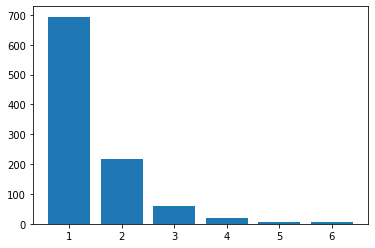

In [185]:
values_GD=get_values(n,GD)
plt.bar(list(Counter(values_GD).keys()),list(Counter(values_GD).values()))

https://homepage.divms.uiowa.edu/~mbognar/applets/geo1.html

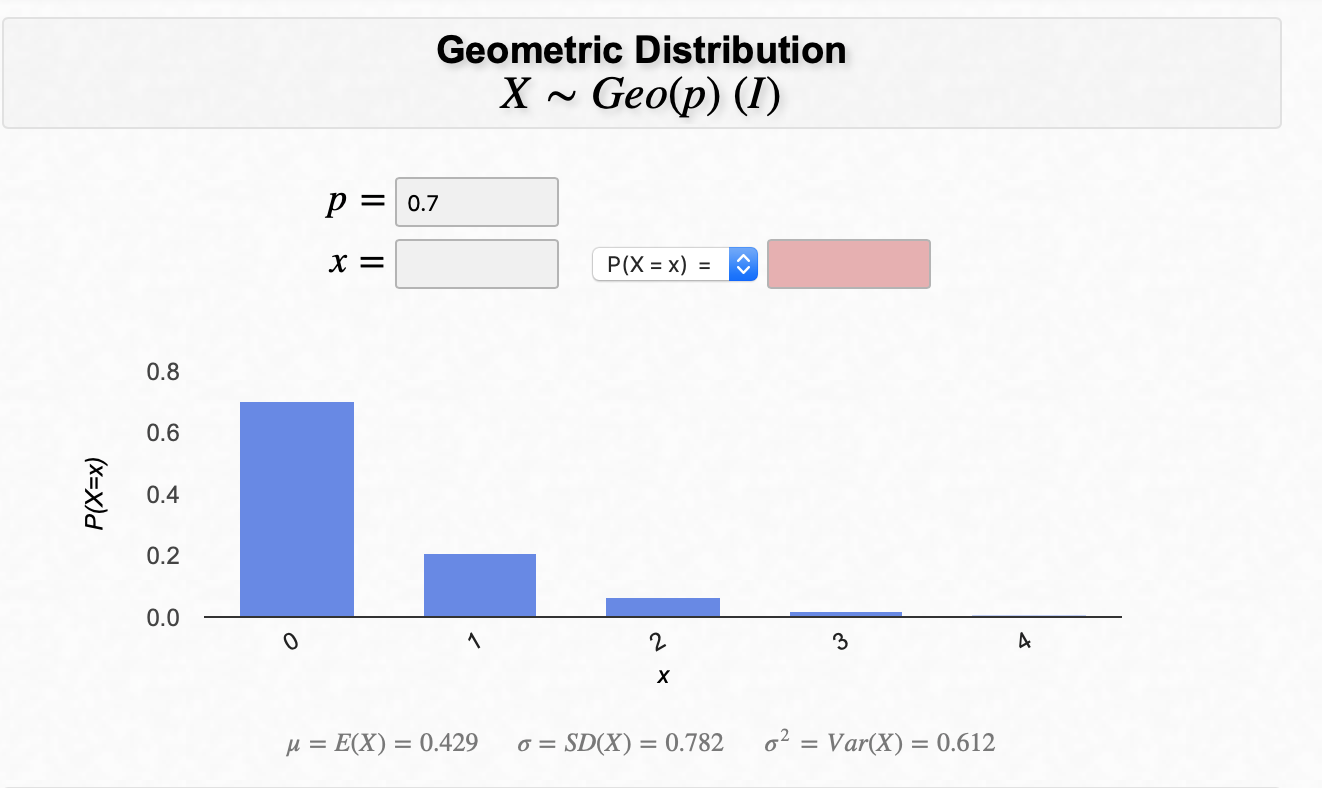

# Несмещенные оценки

## Выборочное среднее

In [186]:
sample_mean=sum(values_GD)/n
sample_mean

1.441

## Математическое ожидание

In [187]:
math_exp=1/p
math_exp

1.4285714285714286

## Выборочная дисперсия

In [188]:
sample_cov=sum([math.pow(value-sample_mean,2) for value in values_GD])/n
sample_cov

0.6505189999999977

# Дисперсия

In [189]:
cov=(1-p)/p/p
cov

0.6122448979591838

# Критерий согласия хи-квадрат Пирсона

In [190]:
e=0.05

In [191]:
def get_chi_squared(values):
    gd_keys=list(Counter(values).keys())
    gd_values=list(Counter(values).values())
    n=len(values)
    K=len(gd_values)
    res_sum=0
    for k in range(0,K):
        pk=gd_p(gd_keys[k],p)
        vk=gd_values[k]
        res_sum+=math.pow(vk-n*pk,2)/(n*pk)
    return res_sum

In [192]:
def chi_check_hypothesis(G,chi_sqared):
    print('X^2: {}, G-1: {}'.format(chi_sqared,G))
    if(chi_sqared<G):
        return True
    else:
        return False

In [193]:
def get_freqs(values,l):
    freqs=[0 for i in range(l)]
    for value in values:
        freqs[value]+=1
    return freqs

https://ru.wikipedia.org/wiki/Квантили_распределения_хи-квадрат

In [194]:
G=66.3386

In [195]:
chi_check_hypothesis(G,get_chi_squared(values_GD))

[1, 2, 3, 4, 5, 6]
[694, 217, 59, 19, 6, 5]
X^2: 6.956702527924739, G-1: 66.3386


True

# Покажем, что ошибка первого рода стремится к 0

In [196]:
t=10000

In [197]:
sum_fail_gd=0
for i in range(t):
    values=get_values(n,GD)
    if(chi_check_hypothesis(G,get_chi_squared(values))==False):
        sum_fail_gd+=1

[1, 2, 3, 5, 4]
[723, 204, 54, 7, 12]
X^2: 5.043880070546745, G-1: 66.3386
[1, 2, 5, 3, 4, 6]
[716, 207, 4, 57, 13, 3]
X^2: 4.305673721340394, G-1: 66.3386
[1, 5, 2, 3, 4, 6]
[709, 8, 202, 66, 13, 2]
X^2: 3.4151681363903585, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[689, 221, 21, 63, 1, 4, 1]
X^2: 2.233071506956689, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[679, 221, 72, 20, 6, 2]
X^2: 2.6276901822457286, G-1: 66.3386
[2, 1, 3, 5, 4, 6, 7]
[213, 706, 51, 7, 19, 2, 2]
X^2: 7.09388867332941, G-1: 66.3386
[1, 2, 3, 4, 5, 8]
[688, 224, 60, 18, 9, 1]
X^2: 7.965671488013574, G-1: 66.3386
[3, 2, 1, 5, 4, 6]
[81, 198, 694, 6, 19, 2]
X^2: 5.952293356848905, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[689, 228, 54, 7, 20, 2]
X^2: 3.429982951205169, G-1: 66.3386
[2, 3, 1, 4, 5, 8, 6]
[222, 66, 692, 13, 5, 1, 1]
X^2: 7.8150547919524405, G-1: 66.3386
[1, 2, 4, 3, 5]
[686, 225, 25, 58, 6]
X^2: 3.7362433862433795, G-1: 66.3386
[1, 2, 3, 4, 5]
[721, 192, 56, 28, 3]
X^2: 8.589417989417994, G-1: 66.3386
[1, 2, 4, 3, 5, 7]
[706, 

[1, 2, 3, 4, 6, 5, 8]
[690, 224, 54, 19, 2, 10, 1]
X^2: 10.406871370435677, G-1: 66.3386
[1, 2, 4, 6, 3, 5]
[699, 204, 25, 1, 61, 10]
X^2: 5.800706055261602, G-1: 66.3386
[2, 1, 4, 3, 5, 6, 8]
[242, 675, 19, 55, 5, 3, 1]
X^2: 12.541821399830152, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[219, 700, 55, 20, 4, 2]
X^2: 6.948307466196352, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 8]
[213, 704, 55, 15, 11, 1, 1]
X^2: 11.870821987719632, G-1: 66.3386
[2, 1, 4, 3, 6, 5]
[216, 687, 20, 67, 2, 8]
X^2: 1.7408824221046362, G-1: 66.3386
[1, 2, 5, 4, 3, 6]
[693, 226, 4, 26, 50, 1]
X^2: 7.419542034097588, G-1: 66.3386
[2, 1, 3, 5, 4, 7, 6]
[227, 679, 62, 6, 22, 1, 3]
X^2: 4.011672330001948, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 7]
[692, 69, 216, 13, 3, 6, 1]
X^2: 4.15722788555751, G-1: 66.3386
[2, 1, 3, 5, 8, 4, 7]
[204, 700, 74, 6, 1, 14, 1]
X^2: 8.536767098438819, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[706, 194, 62, 11, 22, 4, 1]
X^2: 10.382366039584545, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[204, 704, 54, 23, 12, 2, 1]
X^2: 9.9

[1, 2, 4, 3, 5, 7, 6]
[710, 204, 20, 60, 4, 1, 1]
X^2: 1.7718545757397646, G-1: 66.3386
[2, 1, 3, 5, 4, 6, 7]
[214, 693, 74, 7, 10, 1, 1]
X^2: 7.3286270625122425, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[698, 212, 56, 23, 9, 2]
X^2: 3.7002298647854146, G-1: 66.3386
[1, 5, 3, 2, 4, 7]
[723, 5, 64, 193, 14, 1]
X^2: 3.967250813247116, G-1: 66.3386
[1, 2, 3, 4, 7, 5]
[694, 216, 67, 16, 1, 6]
X^2: 1.4109368802665063, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[702, 211, 57, 7, 21, 2]
X^2: 1.1797713109935322, G-1: 66.3386
[2, 1, 3, 4, 5, 7]
[204, 711, 63, 18, 3, 1]
X^2: 2.1143760337056667, G-1: 66.3386
[2, 1, 3, 10, 4, 9]
[204, 731, 49, 1, 14, 1]
X^2: 96.33810437130725, G-1: 66.3386
[2, 1, 3, 4, 5]
[205, 706, 61, 25, 3]
X^2: 3.4600529100529105, G-1: 66.3386
[1, 2, 3, 4, 8, 6, 5, 7]
[705, 213, 59, 17, 1, 1, 2, 2]
X^2: 12.221923477039645, G-1: 66.3386
[1, 2, 3, 5, 4, 8, 6]
[700, 226, 54, 5, 13, 1, 1]
X^2: 9.39981669671435, G-1: 66.3386
[1, 3, 2, 4, 5]
[730, 53, 193, 21, 3]
X^2: 5.739841269841278, G-1: 66.3386
[2

[1, 3, 2, 4, 5, 6]
[702, 51, 219, 22, 3, 3]
X^2: 5.434915343915344, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[701, 70, 198, 21, 6, 2, 2]
X^2: 6.118844581618648, G-1: 66.3386
[3, 1, 4, 2, 5]
[47, 741, 18, 187, 7]
X^2: 9.338800705467381, G-1: 66.3386
[1, 2, 3, 8, 4, 5, 6]
[712, 203, 64, 1, 13, 6, 1]
X^2: 7.2900107002416865, G-1: 66.3386
[1, 3, 2, 4, 5]
[679, 67, 224, 23, 7]
X^2: 3.018694885361542, G-1: 66.3386
[1, 2, 3, 4, 7, 5, 9, 6]
[718, 192, 61, 18, 2, 7, 1, 1]
X^2: 26.881365959653337, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[707, 216, 56, 15, 5, 1]
X^2: 2.192028806584367, G-1: 66.3386
[3, 1, 4, 2, 5, 6]
[83, 683, 19, 208, 5, 2]
X^2: 6.913369194591407, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[695, 60, 215, 8, 20, 2]
X^2: 1.3716760728982906, G-1: 66.3386
[2, 1, 3, 5, 4, 7, 6]
[223, 693, 60, 6, 16, 1, 1]
X^2: 2.2406200078385248, G-1: 66.3386
[2, 1, 3, 4, 7, 5, 6]
[219, 688, 72, 16, 2, 2, 1]
X^2: 9.335299608073676, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 8]
[687, 231, 16, 58, 5, 2, 1]
X^2: 8.000151793716107, G-1: 66

[1, 2, 4, 3, 5, 7, 6]
[716, 191, 17, 64, 8, 2, 2]
X^2: 7.650502429943167, G-1: 66.3386
[3, 1, 2, 6, 4, 7, 5]
[68, 699, 202, 1, 23, 2, 5]
X^2: 6.309320772094838, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6, 8]
[678, 229, 65, 18, 5, 1, 3, 1]
X^2: 8.743128650467032, G-1: 66.3386
[1, 2, 5, 4, 3, 6, 7]
[687, 227, 2, 22, 59, 2, 1]
X^2: 5.278009778561626, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[183, 720, 65, 8, 22, 2]
X^2: 5.624850676072898, G-1: 66.3386
[2, 1, 3, 4, 9, 5]
[192, 722, 65, 17, 2, 2]
X^2: 88.00491474141563, G-1: 66.3386
[1, 2, 6, 4, 3, 5, 7]
[715, 201, 4, 13, 62, 4, 1]
X^2: 6.6338475210660395, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[685, 214, 22, 72, 3, 3, 1]
X^2: 4.91103740936703, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[714, 195, 25, 60, 2, 3, 1]
X^2: 5.242859866745054, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[697, 216, 56, 19, 10, 2]
X^2: 4.321834803057018, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[707, 193, 73, 4, 22, 1]
X^2: 4.322716637272192, G-1: 66.3386
[1, 2, 4, 5, 3, 6]
[698, 206, 19, 8, 66, 3]
X^2: 2.174774250

[2, 5, 1, 3, 4, 6]
[215, 5, 707, 55, 15, 3]
X^2: 3.0808589065255756, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[689, 220, 52, 26, 3, 10]
X^2: 9.535567901234554, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[704, 213, 65, 15, 2, 1]
X^2: 3.598325102880662, G-1: 66.3386
[2, 1, 3, 6, 4, 5]
[199, 719, 61, 4, 14, 3]
X^2: 6.790300411522636, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[696, 224, 55, 18, 3, 4]
X^2: 3.4987954144620805, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 8, 7]
[685, 70, 204, 29, 4, 5, 1, 2]
X^2: 22.59211748056696, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[702, 214, 61, 13, 8, 2]
X^2: 2.9972316284538496, G-1: 66.3386
[2, 1, 5, 3, 4]
[215, 693, 7, 66, 19]
X^2: 0.6444091710758332, G-1: 66.3386
[1, 3, 2, 5, 4, 6, 9]
[706, 60, 210, 5, 17, 1, 1]
X^2: 20.572962883031746, G-1: 66.3386
[1, 4, 2, 5, 3, 6]
[695, 25, 217, 10, 50, 3]
X^2: 9.21905996472662, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[696, 217, 55, 23, 7, 1, 1]
X^2: 3.232277856163038, G-1: 66.3386
[2, 3, 1, 4, 6, 5]
[222, 62, 697, 12, 2, 5]
X^2: 3.3652210464432697, G-1: 66.3386
[1,

[1, 4, 3, 2, 7, 5]
[696, 21, 69, 205, 2, 7]
X^2: 5.607468332353507, G-1: 66.3386
[1, 2, 6, 4, 3, 5, 7, 8]
[697, 219, 2, 21, 52, 7, 1, 1]
X^2: 8.072199785093726, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[677, 232, 17, 65, 7, 2]
X^2: 3.6795067607289744, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[716, 204, 53, 20, 6, 1]
X^2: 2.4965614344503284, G-1: 66.3386
[1, 4, 2, 3, 6, 7, 9, 5]
[718, 19, 199, 55, 2, 3, 1, 3]
X^2: 35.33190485834038, G-1: 66.3386
[1, 7, 5, 2, 4, 3, 6]
[699, 1, 11, 203, 20, 63, 3]
X^2: 6.77110795610424, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[732, 192, 53, 9, 11, 2, 1]
X^2: 10.373336057221248, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[677, 72, 217, 27, 6, 1]
X^2: 6.0542863021751785, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[701, 203, 71, 8, 16, 1]
X^2: 2.941975896531449, G-1: 66.3386
[1, 2, 6, 3, 4, 5, 7]
[718, 205, 2, 59, 14, 1, 1]
X^2: 6.475099725651584, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[703, 205, 61, 22, 6, 2, 1]
X^2: 1.2455582794434625, G-1: 66.3386
[2, 3, 1, 4, 5, 7, 6]
[199, 53, 720, 20, 5, 1, 2]
X^2: 3

[1, 2, 3, 10, 4, 5, 7]
[694, 208, 73, 1, 19, 3, 2]
X^2: 77.85716067306875, G-1: 66.3386
[1, 2, 3, 4, 5]
[722, 194, 65, 14, 5]
X^2: 3.323509700176373, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[720, 191, 68, 5, 13, 2, 1]
X^2: 5.130761101312958, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[231, 683, 58, 16, 9, 2, 1]
X^2: 5.832859866745042, G-1: 66.3386
[2, 1, 3, 4, 6, 7, 5]
[207, 712, 51, 23, 4, 1, 2]
X^2: 9.37633429355281, G-1: 66.3386
[3, 2, 1, 4, 5, 7, 6]
[75, 222, 674, 22, 4, 1, 2]
X^2: 5.45996745051929, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[691, 198, 79, 26, 4, 2]
X^2: 8.07654379776601, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[689, 223, 60, 20, 6, 2]
X^2: 1.2562616108171627, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 8]
[205, 717, 56, 13, 6, 2, 1]
X^2: 7.90844103533869, G-1: 66.3386
[1, 2, 5, 3, 4, 6, 7]
[704, 203, 6, 64, 18, 1, 4]
X^2: 24.48742188908483, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[693, 216, 61, 23, 4, 2, 1]
X^2: 2.208697609249458, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 10]
[701, 206, 68, 17, 6, 1, 1]
X^2: 71.5662714118

[1, 2, 3, 4, 6, 5]
[701, 210, 59, 21, 1, 8]
X^2: 1.7350975896531429, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[700, 206, 66, 15, 11, 2]
X^2: 6.086755437977652, G-1: 66.3386
[2, 1, 3, 4, 5, 7]
[216, 695, 65, 19, 4, 1]
X^2: 1.2329650989613932, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 8]
[702, 229, 10, 51, 3, 4, 1]
X^2: 17.25120999477431, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 8]
[686, 213, 70, 24, 2, 4, 1]
X^2: 7.706448090012399, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 9]
[690, 45, 231, 24, 6, 3, 1]
X^2: 29.592727727241027, G-1: 66.3386
[1, 2, 3, 4, 5]
[700, 213, 59, 23, 5]
X^2: 1.2654144620811278, G-1: 66.3386
[1, 2, 5, 4, 3, 6]
[696, 226, 5, 15, 57, 1]
X^2: 2.986155790711348, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 6]
[690, 215, 67, 4, 21, 2, 1]
X^2: 5.878791671565738, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 6]
[687, 230, 63, 8, 10, 1, 1]
X^2: 8.053494787379966, G-1: 66.3386
[2, 5, 1, 3, 4, 6, 7]
[218, 12, 687, 61, 18, 3, 1]
X^2: 9.181301959631574, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[703, 222, 55, 16, 2, 2]
X^2: 4.587443268665495, G-1: 

[3, 1, 2, 4, 5, 6]
[73, 694, 213, 13, 6, 1]
X^2: 3.8314820693709555, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[705, 225, 51, 15, 3, 1]
X^2: 5.7438101116990055, G-1: 66.3386
[1, 3, 2, 4, 5, 9]
[705, 67, 200, 23, 4, 1]
X^2: 21.96677181895179, G-1: 66.3386
[2, 1, 5, 3, 4, 6]
[204, 714, 6, 58, 15, 3]
X^2: 2.664227513227516, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[194, 719, 59, 23, 3, 2]
X^2: 4.1880076425632025, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[696, 221, 58, 19, 5, 1]
X^2: 1.3644626690182253, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[731, 188, 50, 16, 9, 2, 4]
X^2: 16.216904546345283, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 8]
[693, 224, 60, 6, 14, 2, 1]
X^2: 7.173520400418048, G-1: 66.3386
[2, 1, 5, 4, 3, 6]
[207, 721, 10, 15, 45, 2]
X^2: 9.979718400940625, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[710, 67, 192, 21, 6, 3, 1]
X^2: 3.6541591024887294, G-1: 66.3386
[1, 2, 4, 3, 8, 5, 6, 7]
[706, 201, 23, 57, 1, 10, 1, 1]
X^2: 10.648690084917359, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 6]
[701, 205, 70, 7, 15, 1, 1]
X^2: 2.7738122476974

[2, 1, 3, 4, 5, 6]
[207, 728, 44, 17, 3, 1]
X^2: 8.630212228101131, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[690, 207, 64, 31, 2, 6]
X^2: 8.01991240446795, G-1: 66.3386
[1, 3, 6, 4, 2, 5, 9]
[692, 62, 3, 15, 221, 6, 1]
X^2: 22.319076933590235, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[697, 205, 71, 22, 4, 1]
X^2: 2.4370023515579047, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[695, 215, 58, 6, 24, 1, 1]
X^2: 2.705805193023708, G-1: 66.3386
[2, 3, 1, 4, 5, 7]
[217, 63, 689, 26, 3, 2]
X^2: 8.679514187732696, G-1: 66.3386
[1, 2, 4, 3, 6, 7, 5]
[718, 199, 21, 52, 4, 1, 5]
X^2: 6.849350166568684, G-1: 66.3386
[1, 2, 3, 4, 10, 5, 7]
[707, 194, 70, 20, 1, 7, 1]
X^2: 73.50547930916518, G-1: 66.3386
[1, 2, 4, 5, 3]
[683, 226, 23, 3, 65]
X^2: 3.842116402116396, G-1: 66.3386
[1, 2, 3, 4, 5, 8]
[711, 199, 64, 17, 8, 1]
X^2: 6.598599177607937, G-1: 66.3386
[2, 1, 3, 4, 7, 6, 5]
[191, 698, 79, 22, 1, 4, 5]
X^2: 9.953053870272377, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 8]
[217, 685, 61, 22, 13, 1, 1]
X^2: 15.576800823698454, G-1: 66

[1, 2, 5, 3, 4, 6]
[679, 234, 4, 63, 17, 3]
X^2: 5.047737213403874, G-1: 66.3386
[1, 2, 4, 3, 5, 7, 6]
[697, 209, 22, 59, 8, 2, 3]
X^2: 7.078362512247686, G-1: 66.3386
[1, 2, 3, 4, 5, 7]
[693, 209, 71, 20, 6, 1]
X^2: 1.643794023123647, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 9, 7]
[692, 208, 29, 63, 1, 5, 1, 1]
X^2: 26.16543415483264, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[688, 210, 76, 8, 17, 1]
X^2: 4.325626690182237, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[726, 182, 21, 62, 1, 7, 1]
X^2: 6.0190503429355315, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[197, 699, 73, 18, 12, 1]
X^2: 9.792064079952958, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[202, 718, 53, 19, 7, 1]
X^2: 2.9563145208700816, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[692, 218, 68, 13, 5, 2, 2]
X^2: 7.115370154810888, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[184, 720, 67, 21, 7, 1]
X^2: 4.878642563198121, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[697, 222, 58, 15, 3, 5]
X^2: 2.971335097001763, G-1: 66.3386
[1, 4, 2, 3, 5, 6, 7]
[709, 11, 209, 63, 4, 3, 1]
X^2: 5.376398961395259, G-

[2, 1, 3, 4, 5, 7, 6]
[212, 682, 80, 16, 8, 1, 1]
X^2: 7.230478914364087, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[696, 211, 68, 13, 9, 2, 1]
X^2: 8.859673505780904, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[720, 193, 56, 25, 5, 1]
X^2: 5.0622404467960065, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[711, 218, 48, 16, 3, 1, 3]
X^2: 18.18719653145208, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[669, 232, 66, 24, 1, 8]
X^2: 6.4430340975896385, G-1: 66.3386
[1, 3, 2, 4, 7, 6, 5]
[708, 67, 196, 20, 1, 3, 5]
X^2: 2.8838592788555735, G-1: 66.3386
[3, 1, 4, 2, 6, 5, 7]
[77, 693, 15, 208, 2, 2, 3]
X^2: 18.579930217519088, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[723, 59, 192, 15, 9, 2]
X^2: 5.365573780129338, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 8]
[685, 234, 58, 17, 1, 4, 1]
X^2: 9.118070664968311, G-1: 66.3386
[1, 4, 2, 3, 6, 5]
[698, 14, 207, 70, 3, 8]
X^2: 4.046202821869483, G-1: 66.3386
[2, 3, 1, 5, 4, 7]
[227, 61, 688, 6, 17, 1]
X^2: 2.32554005486968, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[685, 237, 57, 16, 1, 3, 1]
X^2: 6.8253819126004

[2, 1, 3, 4, 8, 5, 6]
[212, 681, 66, 32, 1, 7, 1]
X^2: 15.043573310470945, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[220, 699, 57, 20, 2, 2]
X^2: 3.5410940623162865, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[199, 705, 81, 9, 1, 5]
X^2: 11.3085367430923, G-1: 66.3386
[1, 3, 4, 2, 5, 7, 8, 6]
[706, 69, 12, 204, 4, 2, 1, 2]
X^2: 12.891782383565214, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[195, 698, 73, 23, 9, 2]
X^2: 5.562134626690172, G-1: 66.3386
[1, 4, 2, 5, 3, 6]
[682, 16, 215, 8, 78, 1]
X^2: 5.8446743092298545, G-1: 66.3386
[2, 1, 3, 7, 5, 4]
[206, 712, 58, 1, 6, 17]
X^2: 1.3588733882030206, G-1: 66.3386
[1, 2, 3, 4, 5]
[702, 213, 73, 8, 4]
X^2: 8.413985890652558, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 8]
[692, 215, 69, 15, 1, 7, 1]
X^2: 6.872726749624395, G-1: 66.3386
[3, 1, 4, 2, 5]
[71, 677, 29, 214, 9]
X^2: 9.200846560846543, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[710, 201, 70, 15, 1, 3]
X^2: 3.6573021751910684, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[685, 70, 213, 19, 11, 2]
X^2: 6.205538506760714, G-1: 66.3386
[1, 2, 3, 5,

[1, 2, 3, 4, 6, 5]
[730, 193, 52, 19, 2, 4]
X^2: 5.1274961787184115, G-1: 66.3386
[1, 4, 2, 3, 5, 6, 7]
[660, 24, 238, 73, 3, 1, 1]
X^2: 10.99866233588084, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[698, 202, 77, 5, 17, 1]
X^2: 3.980653145208698, G-1: 66.3386
[1, 3, 2, 4, 5, 7]
[691, 64, 225, 17, 2, 1]
X^2: 4.239420125416419, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[723, 182, 30, 58, 4, 2, 1]
X^2: 12.419279619831473, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[727, 61, 189, 19, 3, 1]
X^2: 8.043821869488543, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[196, 715, 62, 5, 21, 1]
X^2: 1.8720288065843667, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[707, 218, 50, 6, 17, 1, 1]
X^2: 4.026334293552815, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[713, 184, 69, 27, 4, 1, 2]
X^2: 8.517692318244169, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[682, 28, 223, 60, 4, 3]
X^2: 7.275832451499108, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 8, 6]
[677, 216, 81, 5, 17, 1, 1, 2]
X^2: 11.547861160755094, G-1: 66.3386
[1, 2, 4, 3, 7, 5]
[730, 196, 17, 49, 2, 6]
X^2: 9.88919672741525, G-

[1, 2, 3, 4, 7, 6, 5]
[693, 204, 73, 23, 1, 3, 3]
X^2: 5.437386615716238, G-1: 66.3386
[2, 1, 3, 5, 4, 6, 7]
[226, 683, 65, 6, 18, 1, 1]
X^2: 2.516281383499896, G-1: 66.3386
[2, 3, 1, 4, 5, 6]
[211, 54, 707, 24, 2, 2]
X^2: 5.1646919459141705, G-1: 66.3386
[3, 2, 1, 6, 4, 5, 7]
[62, 218, 697, 2, 17, 3, 1]
X^2: 2.3042884381736233, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[705, 196, 66, 9, 21, 3]
X^2: 4.292957671957666, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[692, 212, 70, 17, 8, 1]
X^2: 2.32562669018224, G-1: 66.3386
[1, 3, 2, 6, 5, 4, 7]
[685, 64, 223, 1, 7, 19, 1]
X^2: 2.213388967274146, G-1: 66.3386
[1, 2, 3, 5, 4, 7]
[694, 202, 76, 8, 19, 1]
X^2: 4.46666880266509, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[709, 195, 68, 19, 7, 1, 1]
X^2: 2.655293729178913, G-1: 66.3386
[1, 2, 3, 5, 6, 4, 8]
[700, 204, 63, 7, 3, 22, 1]
X^2: 6.669070077078832, G-1: 66.3386
[1, 2, 3, 4, 5]
[687, 215, 74, 19, 5]
X^2: 2.360811287477948, G-1: 66.3386
[2, 1, 3, 6, 8, 4, 5]
[200, 696, 66, 2, 1, 26, 9]
X^2: 10.00256801946566, G-1: 

[1, 2, 3, 4, 5, 7, 6]
[688, 228, 58, 20, 4, 1, 1]
X^2: 3.4601085439937265, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[701, 207, 67, 18, 6, 1]
X^2: 0.6492069370958258, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[191, 726, 60, 18, 1, 4]
X^2: 3.6512351557907206, G-1: 66.3386
[1, 2, 3, 4, 7, 8, 5]
[709, 201, 63, 21, 1, 1, 4]
X^2: 6.381758280096671, G-1: 66.3386
[1, 2, 5, 4, 3, 6]
[696, 199, 6, 18, 77, 4]
X^2: 6.879453850676063, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[705, 65, 204, 20, 3, 2, 1]
X^2: 6.2296735057809105, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[203, 704, 66, 19, 4, 4]
X^2: 3.9986778365667215, G-1: 66.3386
[1, 2, 3, 4, 7, 6, 5]
[711, 200, 58, 23, 2, 1, 5]
X^2: 6.652177914951986, G-1: 66.3386
[1, 2, 3, 4, 5]
[717, 195, 66, 18, 4]
X^2: 2.16186948853616, G-1: 66.3386
[3, 1, 2, 5, 4, 6]
[42, 729, 199, 14, 15, 1]
X^2: 22.109171663727214, G-1: 66.3386
[2, 1, 3, 4, 5, 7]
[195, 718, 55, 22, 9, 1]
X^2: 5.484270213599842, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[195, 714, 15, 68, 6, 2]
X^2: 2.624780129335688, G-1: 66.3386
[2, 

[1, 2, 4, 3, 5, 6, 7, 8, 10, 9]
[696, 206, 19, 64, 9, 1, 1, 2, 1, 1]
X^2: 115.5238334528932, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[721, 203, 54, 17, 1, 4]
X^2: 3.1208118753674396, G-1: 66.3386
[3, 1, 2, 4, 6, 5]
[63, 710, 198, 23, 2, 4]
X^2: 2.2624168136390375, G-1: 66.3386
[1, 5, 2, 3, 4, 6]
[738, 5, 183, 57, 15, 2]
X^2: 7.042205173427407, G-1: 66.3386
[3, 1, 2, 4, 5, 9]
[54, 708, 216, 16, 5, 1]
X^2: 21.89232737450735, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 8]
[708, 210, 19, 57, 4, 1, 1]
X^2: 6.12934050623816, G-1: 66.3386
[1, 2, 3, 5, 4, 8, 6]
[710, 212, 45, 9, 22, 1, 1]
X^2: 12.743026573257556, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[684, 58, 218, 14, 25, 1]
X^2: 15.562875367430902, G-1: 66.3386
[2, 3, 1, 4, 5]
[205, 79, 698, 15, 3]
X^2: 6.250317460317457, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[712, 54, 208, 17, 3, 6]
X^2: 2.7126931216931247, G-1: 66.3386
[2, 1, 4, 3, 5, 6, 7]
[202, 711, 20, 60, 5, 1, 1]
X^2: 1.5224894963746844, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[205, 686, 20, 78, 9, 2]
X^2: 6.04276954732509,

[1, 2, 3, 4, 7, 5, 8]
[690, 223, 62, 17, 3, 4, 1]
X^2: 18.478546443921854, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[212, 694, 67, 7, 19, 1]
X^2: 0.9258383303938824, G-1: 66.3386
[3, 1, 2, 4, 7, 5, 6]
[58, 729, 183, 24, 1, 4, 1]
X^2: 7.696563570448763, G-1: 66.3386
[3, 1, 2, 4, 5]
[56, 705, 217, 13, 9]
X^2: 4.844338624338624, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[211, 704, 59, 17, 6, 3]
X^2: 1.4838042328042325, G-1: 66.3386
[1, 3, 2, 5, 4]
[691, 59, 233, 5, 12]
X^2: 5.4869488536155195, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[693, 215, 18, 58, 4, 12]
X^2: 10.80278718400939, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[723, 201, 52, 20, 3, 1]
X^2: 7.964456790123464, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[689, 66, 206, 26, 7, 5, 1]
X^2: 10.239244346462847, G-1: 66.3386
[1, 2, 3, 4, 5]
[696, 211, 60, 27, 6]
X^2: 3.661111111111106, G-1: 66.3386
[4, 1, 3, 2, 6, 5, 7]
[19, 704, 57, 211, 3, 5, 1]
X^2: 2.1406846756809714, G-1: 66.3386
[2, 1, 3, 7, 4, 6, 5]
[227, 681, 67, 2, 15, 4, 4]
X^2: 10.898562394669787, G-1: 66.3386
[1, 2, 5

[1, 2, 4, 3, 6, 5, 7]
[718, 189, 25, 62, 3, 2, 1]
X^2: 8.384917479913778, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[725, 181, 65, 18, 6, 2, 3]
X^2: 10.364006251224769, G-1: 66.3386
[2, 1, 3, 4, 6, 10, 5, 7]
[189, 713, 71, 18, 2, 1, 5, 1]
X^2: 74.59454515278658, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 7, 8]
[689, 61, 216, 23, 4, 5, 1, 1]
X^2: 9.63872535828596, G-1: 66.3386
[2, 1, 6, 3, 5, 4, 7]
[202, 735, 1, 40, 6, 15, 1]
X^2: 12.034376621595154, G-1: 66.3386
[2, 1, 4, 3, 6, 5]
[200, 704, 18, 74, 1, 3]
X^2: 4.008730746619636, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[706, 194, 70, 18, 7, 3, 2]
X^2: 7.743918067803245, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[701, 217, 56, 5, 20, 1]
X^2: 1.4446213991769565, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[680, 62, 221, 30, 3, 4]
X^2: 9.166414462081118, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[683, 232, 54, 8, 20, 3]
X^2: 6.0168377425044, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[681, 225, 56, 29, 7, 2]
X^2: 8.126808348030558, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[712, 67, 194, 16, 9, 2]
X^2: 4.131975896

[1, 2, 3, 4, 5]
[704, 203, 75, 14, 4]
X^2: 4.304144620811288, G-1: 66.3386
[1, 3, 2, 4, 6, 11, 5, 7]
[702, 59, 199, 27, 3, 1, 8, 1]
X^2: 246.66067568643078, G-1: 66.3386
[1, 3, 2, 6, 4, 5]
[703, 51, 209, 4, 23, 10]
X^2: 9.606667254556132, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[691, 218, 20, 57, 10, 4]
X^2: 7.469841857730733, G-1: 66.3386
[1, 3, 2, 4, 6, 9]
[683, 77, 216, 22, 1, 1]
X^2: 24.312363235765417, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[65, 689, 220, 19, 6, 1]
X^2: 1.0211646090534945, G-1: 66.3386
[1, 2, 4, 6, 3, 5, 7]
[693, 233, 21, 1, 49, 2, 1]
X^2: 9.067780501665688, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[219, 709, 16, 50, 5, 1]
X^2: 3.9970023515579127, G-1: 66.3386
[2, 1, 5, 3, 4, 6]
[221, 694, 5, 63, 16, 1]
X^2: 1.4406531452087008, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[710, 204, 65, 6, 12, 3]
X^2: 3.908037037037038, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[714, 195, 15, 70, 1, 5]
X^2: 3.3020288065843664, G-1: 66.3386
[1, 2, 4, 5, 6, 3, 8]
[693, 208, 18, 9, 4, 67, 1]
X^2: 10.13401422757853, G-1: 66.3386
[

[1, 2, 4, 3, 5, 6]
[685, 210, 25, 70, 7, 3]
X^2: 4.371970017636673, G-1: 66.3386
[1, 3, 2, 4, 5]
[690, 67, 217, 23, 3]
X^2: 2.776878306878303, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[57, 712, 200, 23, 6, 2]
X^2: 2.2145155790711364, G-1: 66.3386
[1, 3, 2, 4, 5]
[704, 75, 198, 18, 5]
X^2: 3.116313932980598, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[708, 207, 59, 17, 4, 5]
X^2: 7.469365667254552, G-1: 66.3386
[1, 3, 2, 4, 5, 8, 7, 6]
[698, 68, 206, 19, 5, 2, 1, 1]
X^2: 23.598762591286143, G-1: 66.3386
[3, 1, 2, 4, 6, 5, 7]
[63, 689, 220, 22, 2, 3, 1]
X^2: 2.937304311189492, G-1: 66.3386
[1, 2, 5, 4, 3, 7, 6]
[701, 225, 4, 15, 53, 1, 1]
X^2: 4.715611189496378, G-1: 66.3386
[1, 2, 4, 3, 5, 7, 6]
[697, 222, 15, 57, 4, 1, 4]
X^2: 6.143794611013124, G-1: 66.3386
[2, 1, 4, 3, 5]
[197, 714, 17, 65, 7]
X^2: 1.6512345679012363, G-1: 66.3386
[4, 1, 2, 3, 5, 6]
[20, 719, 210, 43, 7, 1]
X^2: 7.529806584362146, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[668, 216, 21, 88, 3, 3, 1]
X^2: 14.507492435822048, G-1: 66.3386
[1, 3,

[696, 221, 19, 60, 2, 1, 1]
X^2: 23.226402036470898, G-1: 66.3386
[1, 3, 2, 5, 6, 4, 7]
[706, 47, 216, 6, 1, 23, 1]
X^2: 5.95379461101313, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[206, 705, 63, 17, 7, 1, 1]
X^2: 1.3737064275916127, G-1: 66.3386
[1, 2, 4, 3, 5]
[700, 200, 20, 66, 14]
X^2: 12.920970017636666, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[711, 201, 66, 7, 12, 2, 1]
X^2: 4.054940995492848, G-1: 66.3386
[1, 4, 2, 3, 5, 10]
[684, 25, 213, 72, 5, 1]
X^2: 74.33496570932193, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[701, 65, 207, 18, 6, 3]
X^2: 1.1618465608465585, G-1: 66.3386
[1, 3, 2, 5, 4, 6, 7]
[686, 65, 219, 8, 18, 3, 1]
X^2: 3.1914783264746127, G-1: 66.3386
[1, 2, 3, 4, 5, 8, 6]
[685, 228, 63, 18, 3, 1, 2]
X^2: 7.902197649095295, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[722, 61, 198, 12, 5, 2]
X^2: 4.091411522633752, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[711, 200, 60, 18, 2, 8, 1]
X^2: 2.3147293552812065, G-1: 66.3386
[1, 3, 2, 4, 5]
[723, 51, 201, 20, 5]
X^2: 3.5703350970017707, G-1: 66.3386
[1, 2, 3, 4,

[1, 2, 3, 4, 6, 7, 5, 8]
[675, 237, 58, 19, 3, 2, 5, 1]
X^2: 14.866838233065499, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[696, 217, 61, 15, 8, 3]
X^2: 3.0739276895943513, G-1: 66.3386
[1, 2, 5, 3, 4, 7]
[704, 213, 5, 60, 17, 1]
X^2: 0.9486793846756821, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[713, 195, 59, 8, 24, 1]
X^2: 4.189383303938859, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[691, 222, 19, 56, 9, 2, 1]
X^2: 4.05793923182441, G-1: 66.3386
[1, 2, 4, 3, 5, 11, 6]
[711, 201, 20, 59, 4, 1, 4]
X^2: 244.4096212282689, G-1: 66.3386
[2, 1, 3, 5, 4]
[208, 714, 56, 7, 15]
X^2: 2.1935626102292805, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[211, 694, 71, 14, 1, 9]
X^2: 4.5870376249265075, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[704, 208, 61, 8, 18, 1]
X^2: 1.394621399176954, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[212, 695, 67, 21, 4, 1]
X^2: 1.3228224573780119, G-1: 66.3386
[1, 2, 3, 4, 5, 8]
[700, 217, 59, 19, 4, 1]
X^2: 5.6648954739042345, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[729, 190, 57, 16, 6, 2]
X^2: 4.194356848912412, G-1: 66.3386
[1,

[1, 2, 3, 5, 4, 6, 7]
[694, 217, 66, 5, 15, 2, 1]
X^2: 1.8340415245933743, G-1: 66.3386
[3, 1, 4, 2, 5, 6]
[93, 669, 26, 202, 8, 2]
X^2: 19.640564961787163, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[680, 231, 60, 24, 4, 1]
X^2: 4.971235155790706, G-1: 66.3386
[1, 5, 2, 3, 4, 6]
[697, 8, 210, 59, 23, 3]
X^2: 3.105726631393291, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[701, 53, 230, 6, 8, 2]
X^2: 9.851499706055263, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[743, 189, 49, 10, 5, 4]
X^2: 15.229947677836577, G-1: 66.3386
[1, 3, 2, 4, 5]
[672, 64, 236, 22, 6]
X^2: 4.882592592592582, G-1: 66.3386
[1, 2, 3, 5, 4, 7]
[691, 218, 61, 6, 23, 1]
X^2: 1.8625241818538059, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[681, 71, 213, 27, 5, 1, 2]
X^2: 5.647533588085428, G-1: 66.3386
[1, 5, 2, 4, 3, 6, 7]
[701, 12, 205, 20, 59, 2, 1]
X^2: 8.027780501665676, G-1: 66.3386
[1, 2, 3, 4, 7, 5, 6]
[687, 218, 59, 22, 3, 9, 2]
X^2: 15.463880834803033, G-1: 66.3386
[1, 4, 2, 3, 6, 5, 8]
[695, 20, 218, 62, 1, 3, 1]
X^2: 6.651756731987715, G-1: 66.3386

[1, 2, 3, 4, 5, 6, 8]
[703, 216, 58, 19, 2, 1, 1]
X^2: 7.93119235809001, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[704, 209, 57, 22, 6, 1, 1]
X^2: 1.8855406427591612, G-1: 66.3386
[2, 4, 1, 3, 5, 7]
[212, 19, 710, 51, 6, 2]
X^2: 6.816180854399371, G-1: 66.3386
[2, 1, 4, 3, 5]
[199, 700, 22, 71, 8]
X^2: 3.0580070546737153, G-1: 66.3386
[1, 2, 3, 4, 5]
[702, 201, 63, 26, 8]
X^2: 4.016102292768953, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[195, 697, 71, 28, 8, 1]
X^2: 7.728007642563189, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[738, 184, 59, 13, 5, 1]
X^2: 7.745732510288078, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[707, 218, 57, 3, 13, 2]
X^2: 4.097848912404473, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[731, 191, 62, 10, 1, 4, 1]
X^2: 8.54947362335882, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[679, 230, 67, 16, 7, 1]
X^2: 3.8345684891240377, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 9]
[705, 58, 206, 24, 4, 2, 1]
X^2: 22.248959355694883, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[702, 57, 218, 17, 3, 3]
X^2: 3.322216931216933, G-1: 66.3386
[2, 1, 4, 3, 5

[1, 2, 3, 5, 4]
[683, 220, 71, 5, 21]
X^2: 2.2174250440917036, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[690, 203, 80, 23, 3, 1]
X^2: 7.399101116989999, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[716, 210, 26, 43, 1, 3, 1]
X^2: 11.39823905545758, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[201, 714, 58, 20, 6, 1]
X^2: 1.4346566725455658, G-1: 66.3386
[1, 2, 4, 5, 3, 6]
[706, 205, 21, 3, 62, 3]
X^2: 2.6689894179894185, G-1: 66.3386
[6, 1, 3, 2, 4, 5, 7]
[2, 720, 49, 200, 16, 11, 2]
X^2: 14.015475974916711, G-1: 66.3386
[1, 2, 4, 5, 3, 6, 7]
[724, 198, 26, 5, 43, 3, 1]
X^2: 12.0660815010778, G-1: 66.3386
[2, 1, 3, 4, 6, 5, 8]
[187, 729, 57, 20, 2, 4, 1]
X^2: 9.585548619112942, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[678, 230, 21, 64, 6, 1]
X^2: 3.153492651381533, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[713, 193, 68, 16, 8, 2]
X^2: 3.469453850676073, G-1: 66.3386
[1, 4, 5, 6, 2, 3, 7]
[709, 22, 6, 2, 197, 63, 1]
X^2: 1.970637644522829, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[692, 224, 64, 14, 3, 2, 1]
X^2: 4.090796374681559, G-1: 66

[3, 1, 2, 5, 8, 4, 6]
[59, 707, 214, 3, 1, 15, 1]
X^2: 7.436306996537984, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[684, 219, 19, 70, 6, 2]
X^2: 1.601499706055255, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[686, 212, 70, 25, 3, 4]
X^2: 4.529483245149903, G-1: 66.3386
[1, 2, 3, 5, 4]
[694, 219, 55, 5, 27]
X^2: 5.003615520282183, G-1: 66.3386
[1, 2, 3, 4, 5, 7]
[704, 201, 66, 24, 4, 1]
X^2: 2.88942012541642, G-1: 66.3386
[1, 2, 3, 4, 5, 7]
[703, 209, 62, 20, 5, 1]
X^2: 0.6466158926121885, G-1: 66.3386
[2, 4, 1, 3, 5, 6]
[211, 21, 698, 64, 4, 2]
X^2: 0.8041099353321567, G-1: 66.3386
[1, 2, 3, 4, 5]
[715, 203, 59, 16, 7]
X^2: 1.5656790123456823, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[701, 198, 69, 25, 3, 4]
X^2: 7.591887713109928, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[698, 70, 201, 23, 5, 2, 1]
X^2: 2.660284910836758, G-1: 66.3386
[2, 1, 3, 8, 4, 5, 7, 6]
[231, 681, 62, 1, 17, 6, 1, 1]
X^2: 8.28581530537591, G-1: 66.3386
[2, 1, 6, 3, 4, 5, 7]
[210, 698, 3, 67, 13, 8, 1]
X^2: 4.520896315892606, G-1: 66.3386
[1, 4, 2,

[1, 2, 4, 5, 3]
[719, 198, 19, 8, 56]
X^2: 2.9372134038800732, G-1: 66.3386
[1, 3, 2, 6, 5, 4]
[693, 64, 215, 2, 8, 18]
X^2: 1.257813639035856, G-1: 66.3386
[1, 4, 3, 2, 6, 5]
[714, 18, 54, 206, 4, 4]
X^2: 5.283863021751912, G-1: 66.3386
[1, 2, 3, 5, 4]
[718, 196, 68, 6, 12]
X^2: 4.331269841269846, G-1: 66.3386
[1, 2, 3, 6, 7, 4, 5]
[720, 198, 58, 1, 2, 14, 7]
X^2: 7.874029766803841, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[210, 697, 68, 23, 1, 1]
X^2: 5.434356848912404, G-1: 66.3386
[1, 2, 3, 7, 4, 5, 6]
[676, 234, 61, 1, 20, 5, 3]
X^2: 5.234335469331755, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[720, 186, 68, 18, 6, 1, 1]
X^2: 4.531995669214191, G-1: 66.3386
[2, 1, 3, 6, 5, 4]
[223, 689, 58, 3, 7, 20]
X^2: 2.7424462081128684, G-1: 66.3386
[1, 2, 3, 4, 6, 7, 5]
[695, 208, 66, 25, 1, 1, 4]
X^2: 3.417092670977852, G-1: 66.3386
[3, 1, 2, 5, 4, 6, 7, 8]
[64, 702, 204, 6, 17, 4, 1, 2]
X^2: 26.261901921092136, G-1: 66.3386
[2, 4, 1, 3, 5, 8, 7, 6]
[197, 24, 703, 63, 9, 1, 1, 2]
X^2: 9.357208603435875, G-

[1, 2, 3, 4, 6, 5, 9]
[687, 225, 60, 22, 2, 3, 1]
X^2: 23.09365071371957, G-1: 66.3386
[1, 4, 3, 2, 5, 6]
[703, 22, 60, 207, 7, 1]
X^2: 1.307901822457377, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[667, 234, 24, 66, 7, 1, 1]
X^2: 6.888415422300593, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[716, 23, 167, 83, 8, 3]
X^2: 18.358583774250434, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[690, 211, 21, 72, 1, 5]
X^2: 2.0347272192827703, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[724, 195, 60, 14, 3, 3, 1]
X^2: 6.026751695081331, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[199, 706, 59, 10, 24, 2]
X^2: 5.617019988242204, G-1: 66.3386
[1, 2, 3, 5, 4, 9, 6]
[672, 225, 68, 10, 19, 1, 5]
X^2: 32.113315616717784, G-1: 66.3386
[3, 1, 2, 4, 6, 5]
[51, 697, 230, 18, 2, 2]
X^2: 6.674215755437979, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[193, 681, 91, 8, 26, 1]
X^2: 18.24991240446794, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[680, 215, 80, 20, 4, 1]
X^2: 6.122557907113453, G-1: 66.3386
[1, 2, 3, 6, 5, 4, 7]
[711, 199, 62, 2, 6, 18, 2]
X^2: 5.228368391142463, G-1: 6

[1, 4, 2, 3, 5, 7, 6]
[707, 15, 211, 60, 4, 1, 2]
X^2: 2.0367399372917925, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[694, 213, 72, 5, 15, 1]
X^2: 2.552822457378011, G-1: 66.3386
[3, 1, 2, 5, 4, 7, 6]
[61, 703, 208, 3, 22, 2, 1]
X^2: 6.498879854987259, G-1: 66.3386
[5, 3, 2, 1, 4, 6]
[5, 57, 225, 690, 20, 3]
X^2: 2.9209118165784793, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[707, 196, 20, 68, 8, 1]
X^2: 2.7105473251028784, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[725, 56, 192, 21, 2, 4]
X^2: 3.9912527924750223, G-1: 66.3386
[1, 3, 2, 4, 5]
[699, 63, 213, 20, 5]
X^2: 0.1874779541446201, G-1: 66.3386
[1, 3, 2, 9, 6, 5, 4, 7]
[703, 73, 194, 1, 3, 5, 20, 1]
X^2: 24.24394679445639, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[710, 195, 65, 21, 6, 2, 1]
X^2: 2.052806956692142, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[697, 219, 63, 13, 5, 3]
X^2: 3.3115467372134026, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[215, 711, 11, 54, 7, 2]
X^2: 5.244268665490892, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[714, 54, 202, 20, 8, 2]
X^2: 2.9445332157554396, G-1: 66.33

[2, 1, 3, 4, 7, 5, 6]
[205, 689, 70, 27, 1, 7, 1]
X^2: 5.611907485792661, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[698, 212, 63, 19, 6, 2]
X^2: 0.09705526161081571, G-1: 66.3386
[2, 1, 4, 3, 5, 9]
[195, 728, 18, 56, 2, 1]
X^2: 25.20714218932217, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[695, 69, 208, 22, 5, 1]
X^2: 1.50271663727219, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[687, 222, 23, 58, 2, 7, 1]
X^2: 3.047851048402893, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 10]
[232, 689, 55, 18, 4, 1, 1]
X^2: 74.90983402207915, G-1: 66.3386
[3, 1, 2, 5, 4, 7, 6]
[78, 711, 178, 6, 25, 1, 1]
X^2: 11.367286674505191, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[228, 702, 47, 18, 4, 1]
X^2: 6.43567960023516, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[677, 227, 61, 25, 6, 2, 2]
X^2: 8.584770507544567, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[718, 53, 203, 14, 8, 3, 1]
X^2: 5.9732772682735655, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[213, 699, 56, 6, 25, 1]
X^2: 3.0989423868312738, G-1: 66.3386
[1, 2, 4, 5, 3, 6, 7]
[721, 185, 21, 8, 60, 4, 1]
X^2: 8.517022124240

[1, 2, 4, 5, 3]
[716, 211, 23, 3, 47]
X^2: 6.580687830687836, G-1: 66.3386
[2, 1, 3, 4, 6, 5, 7]
[194, 708, 66, 22, 2, 5, 3]
X^2: 14.240512228101103, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[702, 206, 23, 60, 7, 2]
X^2: 1.4787131099353295, G-1: 66.3386
[3, 1, 2, 4, 5, 6, 7]
[51, 706, 211, 21, 8, 2, 1]
X^2: 4.055205545757396, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 6]
[708, 195, 61, 11, 23, 1, 1]
X^2: 7.884976268861446, G-1: 66.3386
[1, 2, 3, 4, 5]
[695, 203, 72, 24, 6]
X^2: 2.9501587301587238, G-1: 66.3386
[1, 4, 2, 3, 5, 7, 6, 8]
[699, 24, 213, 53, 7, 1, 2, 1]
X^2: 8.52743788033182, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[695, 216, 65, 5, 15, 4]
X^2: 4.261799529688413, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[692, 63, 211, 20, 10, 1, 3]
X^2: 4.928832823829108, G-1: 66.3386
[1, 2, 3, 6, 4, 5]
[696, 206, 67, 1, 21, 9]
X^2: 2.830952968841851, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[721, 192, 18, 56, 11, 2]
X^2: 8.056437977660197, G-1: 66.3386
[1, 2, 4, 3, 5, 7]
[694, 208, 20, 69, 8, 1]
X^2: 2.133335469331758, G-1: 66.3386

[1, 2, 4, 3, 5, 6, 7]
[700, 209, 16, 67, 5, 2, 1]
X^2: 1.3053642759161268, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[206, 712, 66, 11, 3, 2]
X^2: 5.036737801293362, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6, 9]
[692, 202, 69, 22, 12, 1, 1, 1]
X^2: 29.12134244407425, G-1: 66.3386
[1, 2, 5, 3, 4, 6]
[692, 219, 9, 58, 18, 4]
X^2: 5.979771310993522, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[703, 204, 61, 20, 3, 8, 1]
X^2: 2.7312137762100672, G-1: 66.3386
[1, 2, 4, 5, 3, 11]
[684, 226, 20, 6, 63, 1]
X^2: 241.60194868270747, G-1: 66.3386
[3, 1, 2, 4, 5, 6, 7]
[63, 667, 246, 16, 5, 1, 2]
X^2: 12.889003311777373, G-1: 66.3386
[3, 2, 1, 4, 5, 6]
[53, 224, 687, 28, 5, 3]
X^2: 8.214721340388, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[691, 209, 73, 18, 6, 1, 2]
X^2: 2.292330766215945, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 6]
[710, 49, 216, 9, 12, 2, 2]
X^2: 12.301542994317066, G-1: 66.3386
[1, 2, 4, 3, 5, 8, 6]
[714, 204, 18, 55, 7, 1, 1]
X^2: 6.796218813116465, G-1: 66.3386
[1, 4, 2, 3, 5, 6, 7]
[698, 21, 208, 63, 4, 5, 1]
X^2: 7.

[2, 1, 3, 5, 4, 6]
[208, 690, 75, 5, 19, 3]
X^2: 3.5193245149911747, G-1: 66.3386
[1, 4, 2, 3, 5, 6, 7, 8]
[685, 22, 225, 58, 7, 1, 1, 1]
X^2: 8.05413982036709, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 8]
[698, 212, 66, 18, 3, 2, 1]
X^2: 6.205530982428632, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[688, 218, 72, 5, 16, 1]
X^2: 2.609224573780126, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[726, 187, 62, 18, 2, 5]
X^2: 3.675221046443276, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 8, 7]
[697, 192, 22, 79, 2, 6, 1, 1]
X^2: 11.354563100790372, G-1: 66.3386
[3, 2, 1, 9, 4, 6, 5]
[80, 196, 696, 1, 18, 5, 4]
X^2: 32.29606693946912, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[694, 216, 67, 15, 7, 1]
X^2: 1.88245208700764, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[703, 69, 206, 3, 17, 2]
X^2: 2.161340975896533, G-1: 66.3386
[1, 3, 2, 4, 5]
[713, 47, 207, 27, 6]
X^2: 7.838412698412699, G-1: 66.3386
[2, 1, 3, 4, 7, 6, 5]
[218, 694, 59, 19, 1, 1, 8]
X^2: 2.3269868508720317, G-1: 66.3386
[3, 1, 2, 5, 4, 6, 7]
[59, 722, 194, 4, 19, 1, 1]
X^2: 3.415664099549291

[2, 1, 5, 4, 3, 6]
[215, 692, 7, 12, 71, 3]
X^2: 5.049377425044085, G-1: 66.3386
[1, 3, 2, 5, 4, 7]
[699, 58, 215, 9, 18, 1]
X^2: 2.9858046051342297, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 8]
[699, 62, 209, 22, 3, 4, 1]
X^2: 6.699599177607935, G-1: 66.3386
[2, 1, 3, 5, 6, 4]
[230, 679, 72, 5, 1, 13]
X^2: 6.030335684891235, G-1: 66.3386
[2, 1, 3, 4, 5]
[218, 691, 68, 19, 4]
X^2: 1.30970017636684, G-1: 66.3386
[2, 1, 7, 3, 4, 5, 6]
[197, 708, 2, 66, 20, 4, 3]
X^2: 6.935769919655099, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[712, 193, 65, 21, 7, 2]
X^2: 2.243263374485597, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[720, 208, 50, 15, 6, 1]
X^2: 4.385873603762501, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 8]
[725, 198, 57, 12, 5, 2, 1]
X^2: 9.485971899536224, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[710, 197, 62, 7, 20, 3, 1]
X^2: 2.8014254164217105, G-1: 66.3386
[1, 5, 3, 2, 4, 6]
[707, 6, 66, 200, 17, 4]
X^2: 4.006490887713106, G-1: 66.3386
[2, 1, 3, 4, 5, 7]
[206, 706, 60, 22, 5, 1]
X^2: 1.3280444640407603, G-1: 66.3386
[1, 2, 3

[1, 3, 2, 4, 5, 6]
[697, 59, 215, 18, 8, 3]
X^2: 2.3782134038800655, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[193, 709, 71, 21, 4, 2]
X^2: 3.2855385067607292, G-1: 66.3386
[1, 2, 5, 3, 4, 6, 7]
[668, 234, 5, 66, 24, 2, 1]
X^2: 6.326422476974314, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[703, 207, 72, 12, 5, 1]
X^2: 4.228536743092301, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 7]
[692, 208, 70, 5, 21, 3, 1]
X^2: 2.6626952576915466, G-1: 66.3386
[3, 1, 2, 6, 4, 5, 8]
[78, 711, 180, 3, 24, 3, 1]
X^2: 16.340692652034743, G-1: 66.3386
[2, 3, 1, 5, 7, 4, 6]
[190, 59, 722, 6, 1, 21, 1]
X^2: 3.861519478738002, G-1: 66.3386
[4, 2, 1, 3, 6, 5]
[16, 191, 712, 75, 2, 4]
X^2: 5.199877131099354, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[194, 703, 29, 63, 9, 2]
X^2: 8.637531452086998, G-1: 66.3386
[1, 2, 4, 3, 7, 5, 8, 6]
[706, 191, 29, 67, 3, 2, 1, 1]
X^2: 26.91833539159969, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[733, 185, 59, 19, 1, 3]
X^2: 6.33259318048208, G-1: 66.3386
[1, 4, 2, 3, 5, 8, 6]
[699, 19, 224, 51, 5, 1, 1]
X^2: 8.2742611411587

[1, 3, 2, 5, 4, 6]
[695, 51, 227, 7, 18, 2]
X^2: 4.105009406231626, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[682, 71, 216, 19, 3, 9]
X^2: 4.598407407407395, G-1: 66.3386
[1, 2, 4, 6, 3, 5]
[701, 218, 17, 2, 51, 11]
X^2: 7.845855967078183, G-1: 66.3386
[1, 3, 2, 4, 5]
[719, 60, 188, 24, 9]
X^2: 6.295238095238094, G-1: 66.3386
[1, 2, 5, 3, 4, 6]
[685, 211, 9, 72, 22, 1]
X^2: 4.3649741328630105, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[690, 205, 71, 24, 3, 6, 1]
X^2: 4.135111483441103, G-1: 66.3386
[2, 1, 3, 4, 7, 5]
[213, 690, 68, 25, 1, 3]
X^2: 4.278555927885551, G-1: 66.3386
[1, 2, 3, 5, 6, 4]
[706, 200, 70, 3, 3, 18]
X^2: 3.5975608465608464, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[194, 703, 69, 12, 21, 1]
X^2: 9.392381540270419, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[701, 212, 62, 19, 3, 3]
X^2: 2.286185185185185, G-1: 66.3386
[1, 2, 3, 4, 5]
[733, 186, 54, 22, 5]
X^2: 6.171922398589074, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[721, 192, 63, 16, 4, 2, 2]
X^2: 7.511084440525183, G-1: 66.3386
[1, 2, 3, 5, 6, 4, 7]
[7

[1, 2, 3, 4, 5, 6]
[729, 187, 59, 16, 7, 2]
X^2: 4.783951205173434, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[701, 205, 21, 62, 5, 5, 1]
X^2: 7.317022124240633, G-1: 66.3386
[3, 1, 2, 4, 5]
[62, 700, 214, 19, 5]
X^2: 0.17176366843033516, G-1: 66.3386
[1, 2, 3, 6, 5, 4]
[657, 244, 65, 2, 5, 27]
X^2: 11.8128400940623, G-1: 66.3386
[1, 3, 4, 2, 5, 6, 7]
[688, 67, 15, 222, 4, 3, 1]
X^2: 3.9039650989613897, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[721, 201, 55, 18, 2, 3]
X^2: 3.384303938859503, G-1: 66.3386
[2, 1, 5, 3, 10, 4, 6]
[227, 703, 3, 47, 1, 16, 3]
X^2: 78.73954595623553, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[74, 696, 207, 12, 8, 3]
X^2: 6.45488007054673, G-1: 66.3386
[2, 4, 1, 3, 5, 6, 7]
[214, 18, 685, 68, 12, 2, 1]
X^2: 8.426616480501648, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[690, 209, 73, 15, 10, 3]
X^2: 6.838372134038789, G-1: 66.3386
[1, 3, 5, 2, 4, 8]
[700, 69, 6, 208, 16, 1]
X^2: 5.739851382193474, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[687, 232, 54, 24, 1, 2]
X^2: 9.107019988242207, G-1: 66.3386
[1, 2,

[1, 2, 4, 3, 5, 6]
[690, 219, 21, 64, 4, 2]
X^2: 1.3222051734273927, G-1: 66.3386
[1, 4, 2, 3, 5, 7]
[702, 14, 211, 61, 11, 1]
X^2: 6.824658220654509, G-1: 66.3386
[2, 1, 5, 3, 4, 7, 8, 9, 6]
[190, 708, 11, 61, 24, 1, 1, 1, 3]
X^2: 34.413004525856216, G-1: 66.3386
[1, 2, 3, 4, 5, 8, 6]
[674, 226, 69, 18, 9, 2, 2]
X^2: 27.088831002024914, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[703, 197, 26, 66, 4, 4]
X^2: 7.226773074661956, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[673, 25, 214, 76, 10, 2]
X^2: 9.128184009406212, G-1: 66.3386
[1, 3, 2, 4, 5]
[700, 65, 215, 17, 3]
X^2: 1.630846560846562, G-1: 66.3386
[1, 3, 2, 4, 6, 5]
[705, 61, 194, 31, 2, 7]
X^2: 9.429348030570244, G-1: 66.3386
[1, 2, 3, 8, 4, 6, 5]
[718, 197, 55, 1, 23, 3, 3]
X^2: 10.107412228754326, G-1: 66.3386
[4, 1, 2, 5, 3]
[27, 712, 204, 9, 48]
X^2: 9.375714285714281, G-1: 66.3386
[1, 3, 2, 4, 5]
[729, 65, 182, 19, 5]
X^2: 5.0779541446208185, G-1: 66.3386
[3, 2, 1, 4, 6, 5]
[63, 195, 709, 27, 2, 4]
X^2: 5.202998824221045, G-1: 66.3386
[1, 3, 2

[2, 1, 3, 5, 4, 7]
[202, 711, 60, 8, 18, 1]
X^2: 2.0907428767391725, G-1: 66.3386
[1, 2, 4, 6, 5, 3]
[682, 219, 29, 1, 8, 61]
X^2: 7.555785420340964, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[702, 76, 197, 7, 17, 1]
X^2: 4.284885949441502, G-1: 66.3386
[2, 1, 3, 4, 7, 8, 5]
[218, 691, 65, 22, 2, 1, 1]
X^2: 13.87282236004963, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[723, 55, 199, 16, 6, 1]
X^2: 3.100847148736045, G-1: 66.3386
[1, 2, 5, 3, 4]
[714, 209, 7, 50, 20]
X^2: 3.3432980599647295, G-1: 66.3386
[1, 4, 2, 5, 3, 6, 8]
[701, 16, 199, 5, 75, 3, 1]
X^2: 9.0646785426873, G-1: 66.3386
[1, 2, 5, 4, 3, 6, 7]
[692, 217, 5, 19, 64, 2, 1]
X^2: 0.9428245933764419, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[717, 71, 190, 9, 11, 1, 1]
X^2: 14.288415422300604, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[683, 210, 66, 31, 8, 1, 1]
X^2: 10.018574152459323, G-1: 66.3386
[1, 4, 2, 3, 8, 5, 6]
[715, 27, 179, 71, 1, 6, 1]
X^2: 14.37821175844274, G-1: 66.3386
[1, 3, 2, 5, 4]
[686, 74, 212, 8, 20]
X^2: 3.241181657848314, G-1: 66.3386
[

[6, 1, 2, 3, 7, 4, 5]
[1, 668, 234, 66, 2, 21, 8]
X^2: 10.177098549872605, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[702, 64, 207, 3, 23, 1]
X^2: 2.5000534979423876, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[697, 228, 62, 7, 3, 2, 1]
X^2: 12.901584146580442, G-1: 66.3386
[2, 1, 4, 3, 6, 5, 7]
[232, 677, 27, 52, 4, 7, 1]
X^2: 12.34167820889671, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[721, 54, 192, 24, 7, 1, 1]
X^2: 5.905558279443468, G-1: 66.3386
[1, 2, 3, 5, 8, 4, 6]
[712, 206, 53, 7, 1, 19, 2]
X^2: 6.919463963028281, G-1: 66.3386
[1, 2, 3, 4, 7, 6, 5]
[682, 214, 75, 17, 2, 3, 7]
X^2: 8.668574152459321, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[213, 683, 82, 15, 5, 1, 1]
X^2: 7.828627062512237, G-1: 66.3386
[3, 2, 1, 4, 5, 7, 6]
[74, 188, 706, 22, 8, 1, 1]
X^2: 6.501590025475204, G-1: 66.3386
[4, 2, 1, 3, 5, 7, 6]
[16, 211, 711, 54, 5, 1, 2]
X^2: 2.5099674505193064, G-1: 66.3386
[1, 3, 4, 2, 5, 6]
[683, 66, 28, 216, 6, 1]
X^2: 5.416720164609044, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[672, 67, 231, 16, 7, 4, 3]
X^

[1, 2, 6, 3, 4, 5]
[696, 222, 4, 63, 11, 4]
X^2: 7.609788947677832, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[690, 207, 77, 18, 6, 2]
X^2: 3.411446796002345, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[682, 220, 69, 23, 4, 2]
X^2: 2.9443215755437904, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[698, 206, 73, 16, 6, 1]
X^2: 2.422275720164607, G-1: 66.3386
[1, 3, 2, 4, 5, 10, 7]
[692, 67, 210, 21, 8, 1, 1]
X^2: 72.59886555255142, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7, 8]
[720, 205, 47, 19, 5, 2, 1, 1]
X^2: 10.041353224247175, G-1: 66.3386
[1, 6, 2, 3, 4, 5]
[710, 5, 201, 65, 12, 7]
X^2: 9.82132333921222, G-1: 66.3386
[1, 2, 5, 3, 4, 6]
[709, 218, 5, 54, 12, 2]
X^2: 4.356967078189306, G-1: 66.3386
[2, 1, 3, 4, 6, 8, 5, 7]
[226, 668, 77, 20, 2, 1, 5, 1]
X^2: 11.143892906786839, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[715, 190, 73, 17, 2, 3]
X^2: 5.314356848912408, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 8, 6]
[689, 213, 65, 21, 6, 1, 1, 4]
X^2: 8.794104546998481, G-1: 66.3386
[4, 1, 2, 3, 5, 8]
[22, 691, 212, 69, 5, 1]
X^2: 5.9790224580312

[1, 2, 3, 5, 4, 6, 7]
[697, 222, 56, 3, 20, 1, 1]
X^2: 3.5564930237115426, G-1: 66.3386
[1, 3, 2, 5, 4, 7]
[660, 62, 241, 8, 28, 1]
X^2: 12.68666880266508, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[712, 197, 66, 20, 1, 4]
X^2: 1.998113462669022, G-1: 66.3386
[1, 4, 2, 3, 5, 7]
[727, 25, 171, 71, 5, 1]
X^2: 11.818044464040762, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[695, 62, 219, 2, 21, 1]
X^2: 3.3349917695473255, G-1: 66.3386
[1, 3, 2, 4, 5]
[683, 65, 223, 21, 8]
X^2: 2.471922398589056, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[683, 212, 69, 24, 9, 2, 1]
X^2: 8.97295392906132, G-1: 66.3386
[2, 1, 3, 6, 4, 5, 7]
[223, 690, 59, 2, 16, 9, 1]
X^2: 4.124764628649807, G-1: 66.3386
[1, 2, 3, 5, 4, 7, 6]
[737, 196, 53, 4, 8, 1, 1]
X^2: 12.013283147168346, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[708, 18, 201, 67, 5, 1]
X^2: 1.142028806584365, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 6]
[708, 65, 218, 2, 5, 1, 1]
X^2: 13.816722300607493, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[672, 237, 65, 17, 8, 1]
X^2: 6.092293356848902, G-1: 66.3386
[3

[1, 2, 3, 4, 5, 7, 6]
[702, 208, 60, 22, 3, 2, 3]
X^2: 7.274217891436404, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 9, 7]
[708, 203, 60, 10, 14, 3, 1, 1]
X^2: 26.326221926731524, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[710, 208, 18, 55, 6, 3]
X^2: 2.231846560846562, G-1: 66.3386
[1, 2, 3, 6, 4, 5]
[728, 179, 65, 2, 23, 3]
X^2: 7.958960023515584, G-1: 66.3386
[1, 2, 5, 3, 4, 7]
[700, 217, 6, 53, 23, 1]
X^2: 3.199190848520476, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[691, 64, 219, 17, 8, 1]
X^2: 1.9546743092298602, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[706, 207, 68, 6, 12, 1]
X^2: 3.3182545561434473, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[729, 14, 181, 70, 4, 2]
X^2: 7.798766019988249, G-1: 66.3386
[2, 1, 4, 5, 3, 6, 7]
[231, 674, 23, 8, 60, 3, 1]
X^2: 6.517404252400534, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[691, 69, 220, 14, 5, 1]
X^2: 2.80176425631981, G-1: 66.3386
[1, 2, 3, 6, 4, 5]
[714, 198, 56, 5, 20, 7]
X^2: 8.517725455614338, G-1: 66.3386
[2, 3, 1, 5, 4]
[200, 64, 717, 3, 16]
X^2: 2.6071957671957735, G-1: 66.3386
[1, 5,

[1, 2, 4, 3, 5, 6]
[688, 203, 23, 78, 7, 1]
X^2: 5.500758965314512, G-1: 66.3386
[3, 2, 1, 4, 6, 5]
[58, 195, 726, 14, 5, 2]
X^2: 12.478042915931805, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 6]
[679, 70, 216, 8, 25, 1, 1]
X^2: 5.26428843817361, G-1: 66.3386
[1, 2, 3, 4, 5]
[714, 219, 46, 17, 4]
X^2: 5.935890652557325, G-1: 66.3386
[1, 2, 3, 5, 6, 7, 4]
[703, 211, 64, 3, 3, 1, 15]
X^2: 3.557492435822066, G-1: 66.3386
[1, 2, 3, 4, 5]
[703, 209, 69, 14, 5]
X^2: 1.9385890652557327, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[226, 692, 53, 21, 5, 2, 1]
X^2: 3.7327716833235325, G-1: 66.3386
[1, 4, 3, 2, 5, 6, 7, 8]
[719, 23, 62, 190, 3, 1, 1, 1]
X^2: 10.027085146645764, G-1: 66.3386
[1, 2, 3, 5, 6, 4]
[692, 212, 71, 3, 3, 19]
X^2: 3.3761851851851805, G-1: 66.3386
[3, 1, 2, 4, 6, 5, 8]
[58, 702, 219, 11, 3, 6, 1]
X^2: 9.786777308119401, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7, 9]
[715, 191, 20, 60, 3, 7, 3, 1]
X^2: 35.51793072547735, G-1: 66.3386
[2, 1, 3, 7, 4, 5, 6]
[227, 686, 57, 1, 18, 10, 1]
X^2: 6.33598155986

[2, 1, 3, 4, 5, 7, 6]
[224, 695, 62, 14, 2, 1, 2]
X^2: 5.153247873799725, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[725, 192, 23, 52, 7, 1]
X^2: 5.846631981187542, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[717, 60, 194, 22, 5, 1, 1]
X^2: 3.121219655104844, G-1: 66.3386
[1, 3, 2, 6, 4, 5]
[681, 66, 231, 3, 18, 1]
X^2: 7.6398007054673664, G-1: 66.3386
[2, 3, 1, 4, 5, 7, 6]
[212, 74, 699, 9, 4, 1, 1]
X^2: 8.377515951401138, G-1: 66.3386
[2, 1, 3, 4, 5, 7, 8, 6]
[212, 697, 61, 18, 9, 1, 1, 1]
X^2: 7.5379846175452245, G-1: 66.3386
[2, 1, 3, 4, 5]
[249, 682, 46, 20, 3]
X^2: 13.614338624338622, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[210, 697, 64, 7, 21, 1]
X^2: 0.8629282774838302, G-1: 66.3386
[1, 2, 3, 4, 7, 6, 5]
[722, 196, 59, 15, 1, 2, 5]
X^2: 3.2851526357044945, G-1: 66.3386
[3, 1, 2, 4, 6, 5, 7]
[62, 697, 213, 22, 1, 4, 1]
X^2: 1.8307434646286487, G-1: 66.3386
[1, 2, 5, 4, 3, 6]
[702, 196, 5, 22, 73, 2]
X^2: 3.166543797766017, G-1: 66.3386
[1, 7, 4, 2, 3, 5, 6]
[707, 2, 22, 214, 47, 5, 3]
X^2: 10.1381508720

[2, 3, 1, 4, 5, 6]
[206, 80, 686, 21, 6, 1]
X^2: 5.484921222810103, G-1: 66.3386
[1, 2, 3, 4, 8, 6, 5]
[698, 232, 45, 19, 1, 1, 4]
X^2: 12.919816696714348, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[700, 62, 207, 7, 23, 1]
X^2: 1.5490129335684863, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[711, 196, 72, 15, 3, 3]
X^2: 5.445973544973547, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[713, 212, 57, 11, 4, 2, 1]
X^2: 5.148380148932006, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[704, 217, 22, 52, 1, 4]
X^2: 3.4660499706055288, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[224, 683, 66, 7, 17, 3]
X^2: 2.984033509700168, G-1: 66.3386
[1, 3, 4, 2, 5, 8, 6]
[713, 56, 16, 204, 7, 1, 3]
X^2: 7.6247843627931235, G-1: 66.3386
[1, 2, 4, 3, 7, 5, 6]
[703, 216, 24, 51, 1, 4, 1]
X^2: 5.096881030766216, G-1: 66.3386
[4, 1, 2, 3, 5, 6]
[18, 684, 224, 67, 5, 2]
X^2: 1.7276019988242164, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[706, 208, 61, 16, 8, 1]
X^2: 1.8253092298647857, G-1: 66.3386
[1, 2, 3, 4, 6, 7, 5]
[708, 199, 66, 17, 3, 1, 6]
X^2: 2.4826247109543393, G-1:

[1, 2, 3, 4, 8, 6, 5]
[681, 227, 58, 24, 1, 2, 7]
X^2: 8.714649148213454, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[698, 67, 209, 18, 5, 1, 2]
X^2: 0.9089621595140095, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[201, 710, 59, 4, 24, 2]
X^2: 2.7031575543797786, G-1: 66.3386
[1, 3, 2, 4, 8, 6, 5]
[686, 75, 211, 19, 2, 2, 5]
X^2: 24.98424546410605, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[683, 222, 75, 6, 13, 1]
X^2: 5.534180482069365, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[203, 718, 15, 56, 7, 1]
X^2: 2.8795949441505053, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[700, 223, 61, 13, 1, 2]
X^2: 5.374409758965318, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[702, 225, 53, 16, 3, 1]
X^2: 4.655609053497947, G-1: 66.3386
[1, 2, 7, 4, 3, 5, 8, 6]
[697, 223, 2, 17, 51, 6, 3, 1]
X^2: 60.893298485204724, G-1: 66.3386
[1, 3, 2, 6, 4, 5]
[690, 53, 230, 1, 18, 8]
X^2: 4.924145208700761, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 8]
[230, 689, 57, 18, 4, 1, 1]
X^2: 8.157859024756673, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[699, 68, 204, 6, 21, 2]
X^2: 0.8747801293356819, 

[3, 1, 2, 4, 5, 6]
[66, 688, 218, 19, 8, 1]
X^2: 1.900229864785414, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[203, 703, 25, 64, 4, 1]
X^2: 3.011605526161081, G-1: 66.3386
[1, 3, 4, 2, 5, 6]
[704, 56, 22, 206, 9, 3]
X^2: 4.333010582010576, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 6]
[680, 77, 208, 4, 27, 2, 2]
X^2: 12.06626962571035, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[709, 209, 57, 19, 4, 2]
X^2: 1.2368612580834846, G-1: 66.3386
[1, 2, 3, 4, 5]
[715, 204, 62, 15, 4]
X^2: 1.8053615520282247, G-1: 66.3386
[3, 1, 2, 5, 4, 6, 8]
[64, 690, 213, 9, 21, 2, 1]
X^2: 7.128388125285766, G-1: 66.3386
[2, 1, 3, 5, 4, 6]
[206, 693, 76, 7, 16, 2]
X^2: 3.6382369194591355, G-1: 66.3386
[1, 2, 4, 3, 6, 8, 5, 7]
[711, 211, 17, 50, 2, 1, 6, 2]
X^2: 12.156949932066098, G-1: 66.3386
[3, 2, 1, 5, 4, 6]
[64, 208, 703, 4, 20, 1]
X^2: 0.8925579071134645, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[718, 200, 17, 62, 1, 2]
X^2: 3.8102827748383383, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 8, 7]
[699, 194, 25, 74, 4, 2, 1, 1]
X^2: 10.809448462342402, G-1:

[1, 3, 2, 5, 4, 6]
[707, 69, 193, 6, 24, 1]
X^2: 3.7019053497942367, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6, 8]
[679, 222, 72, 16, 4, 2, 4, 1]
X^2: 15.679524887974372, G-1: 66.3386
[1, 2, 7, 6, 5, 3, 4]
[704, 208, 2, 4, 6, 57, 19]
X^2: 8.0891267685675, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[227, 670, 73, 24, 4, 2]
X^2: 6.169824221046431, G-1: 66.3386
[1, 5, 2, 3, 4]
[704, 4, 211, 63, 18]
X^2: 0.5623456790123477, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 10]
[688, 228, 62, 11, 7, 3, 1]
X^2: 76.96326729662353, G-1: 66.3386
[2, 4, 1, 3, 6, 5, 7, 9]
[196, 14, 714, 64, 1, 8, 2, 1]
X^2: 27.914381832669207, G-1: 66.3386
[1, 2, 3, 4, 5]
[717, 210, 55, 16, 2]
X^2: 4.249171075837751, G-1: 66.3386
[1, 2, 4, 3, 5, 7, 6]
[699, 212, 17, 60, 9, 1, 2]
X^2: 2.8325424064275864, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[687, 65, 221, 20, 5, 2]
X^2: 1.076861258083476, G-1: 66.3386
[2, 1, 5, 3, 6, 4, 7]
[204, 724, 4, 50, 3, 14, 1]
X^2: 6.901002135998438, G-1: 66.3386
[1, 6, 2, 3, 7, 4, 5]
[727, 2, 188, 59, 1, 19, 4]
X^2: 4.615046815598

[1, 3, 5, 4, 2]
[696, 77, 5, 19, 203]
X^2: 3.4470017636684256, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 7, 9]
[696, 56, 215, 25, 1, 4, 2, 1]
X^2: 27.837662255949628, G-1: 66.3386
[1, 3, 2, 4, 5, 7, 6]
[714, 67, 199, 13, 5, 1, 1]
X^2: 3.789949813835004, G-1: 66.3386
[1, 3, 2, 5, 4]
[708, 70, 191, 9, 22]
X^2: 5.0524338624338565, G-1: 66.3386
[3, 1, 2, 4, 5, 7, 6]
[57, 720, 197, 15, 9, 1, 1]
X^2: 5.466916304134825, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[714, 20, 201, 57, 6, 2]
X^2: 1.3729282774838367, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7, 8]
[706, 197, 56, 29, 8, 2, 1, 1]
X^2: 13.196485499379438, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[675, 66, 234, 21, 3, 1]
X^2: 5.558095825984708, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[703, 207, 69, 18, 2, 1]
X^2: 4.568924750146974, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[693, 231, 18, 51, 5, 2]
X^2: 4.630300411522632, G-1: 66.3386
[1, 3, 2, 7, 4, 5]
[694, 79, 198, 2, 21, 6]
X^2: 9.402000960219468, G-1: 66.3386
[1, 2, 3, 4, 5]
[711, 206, 61, 14, 8]
X^2: 2.5403880070546747, G-1: 66.3386
[1, 

[1, 2, 4, 3, 6, 8, 5]
[698, 212, 23, 62, 2, 1, 2]
X^2: 8.043273486837801, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 8]
[721, 63, 187, 20, 5, 3, 1]
X^2: 8.96944044744921, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[221, 681, 80, 10, 7, 1]
X^2: 10.471076425631972, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[199, 715, 63, 17, 2, 4]
X^2: 1.633051734273962, G-1: 66.3386
[1, 3, 2, 4, 5, 7]
[685, 71, 218, 23, 2, 1]
X^2: 5.376880442876732, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[688, 225, 62, 19, 4, 1, 1]
X^2: 8.717075034293545, G-1: 66.3386
[1, 3, 7, 2, 5, 4, 6]
[705, 53, 3, 205, 7, 25, 2]
X^2: 16.222364079952953, G-1: 66.3386
[2, 1, 4, 3, 5, 9]
[204, 707, 21, 60, 7, 1]
X^2: 20.749205681385654, G-1: 66.3386
[2, 1, 3, 5, 4, 6, 7]
[205, 701, 69, 4, 16, 4, 1]
X^2: 5.205911013129526, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 6]
[701, 73, 197, 4, 22, 2, 1]
X^2: 8.031542994317062, G-1: 66.3386
[1, 2, 3, 4, 5]
[688, 229, 61, 19, 3]
X^2: 3.246084656084654, G-1: 66.3386
[1, 3, 2, 4, 5]
[704, 75, 195, 20, 6]
X^2: 3.46322751322751, G-1: 66.3386
[1,

[1, 4, 2, 3, 5, 7, 6]
[711, 20, 203, 58, 4, 2, 2]
X^2: 5.760290789731529, G-1: 66.3386
[2, 1, 3, 6, 4, 5]
[200, 715, 57, 1, 21, 6]
X^2: 1.9104767783656715, G-1: 66.3386
[1, 2, 4, 3, 5]
[737, 199, 10, 50, 4]
X^2: 9.897319223985905, G-1: 66.3386
[1, 2, 3, 6, 4, 10, 5]
[682, 223, 70, 2, 20, 1, 2]
X^2: 75.1301691190809, G-1: 66.3386
[1, 2, 4, 3, 5]
[699, 198, 21, 79, 3]
X^2: 6.241269841269837, G-1: 66.3386
[1, 2, 5, 3, 4, 6]
[713, 205, 3, 61, 17, 1]
X^2: 2.1611646090535044, G-1: 66.3386
[1, 2, 6, 4, 3, 5, 7]
[674, 229, 4, 21, 63, 8, 1]
X^2: 7.45273640995491, G-1: 66.3386
[3, 1, 2, 4, 6, 5, 7]
[66, 703, 201, 18, 3, 8, 1]
X^2: 3.0037005486968393, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[701, 194, 67, 22, 11, 4, 1]
X^2: 10.57046127767978, G-1: 66.3386
[1, 6, 2, 3, 4, 5]
[716, 3, 199, 61, 15, 6]
X^2: 2.8213703703703734, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[205, 704, 69, 16, 4, 2]
X^2: 1.7027342739564977, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 8]
[707, 40, 220, 27, 1, 4, 1]
X^2: 24.053238213469196, G-1: 66.338

[2, 1, 3, 4, 5, 6]
[216, 697, 61, 14, 9, 3]
X^2: 4.465867724867719, G-1: 66.3386
[1, 2, 3, 4, 8, 5, 6]
[694, 222, 60, 18, 1, 3, 2]
X^2: 6.917911934809584, G-1: 66.3386
[1, 4, 2, 3, 5, 6]
[716, 19, 193, 64, 5, 3]
X^2: 2.8294832451499143, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[683, 67, 216, 22, 8, 3, 1]
X^2: 3.766134411130695, G-1: 66.3386
[2, 1, 3, 6, 5, 4]
[204, 703, 68, 3, 2, 20]
X^2: 4.012604938271604, G-1: 66.3386
[1, 2, 3, 4, 5, 10]
[685, 234, 60, 13, 7, 1]
X^2: 75.9536429579992, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[682, 213, 68, 24, 5, 8]
X^2: 9.6344450323339, G-1: 66.3386
[1, 2, 3, 4, 5, 10]
[694, 215, 69, 14, 7, 1]
X^2: 72.91697629133252, G-1: 66.3386
[1, 2, 3, 4, 5, 8, 6]
[688, 218, 64, 23, 3, 1, 3]
X^2: 8.350269371611459, G-1: 66.3386
[1, 9, 2, 3, 4, 5]
[695, 1, 205, 72, 18, 9]
X^2: 23.25865894417224, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[727, 192, 68, 5, 6, 2]
X^2: 11.917601998824228, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[708, 203, 20, 59, 8, 2]
X^2: 1.6527871840094055, G-1: 66.3386
[1, 2, 3,

[2, 1, 3, 4, 8, 6, 5]
[200, 714, 62, 16, 1, 2, 5]
X^2: 6.033961317525637, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[677, 234, 14, 64, 3, 8]
X^2: 6.734298059964716, G-1: 66.3386
[1, 2, 4, 3, 5]
[715, 193, 20, 62, 10]
X^2: 5.084197530864195, G-1: 66.3386
[2, 1, 3, 4, 5]
[199, 718, 59, 21, 3]
X^2: 2.7836507936508, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[213, 701, 56, 22, 6, 2]
X^2: 1.4022933568489118, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[54, 687, 229, 21, 6, 3]
X^2: 4.490735449735444, G-1: 66.3386
[1, 2, 3, 4, 6, 5, 7]
[694, 213, 63, 23, 2, 4, 1]
X^2: 1.9980626886145372, G-1: 66.3386
[1, 2, 4, 7, 6, 3, 5]
[701, 211, 17, 1, 5, 60, 5]
X^2: 7.287392494611004, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[689, 212, 74, 16, 5, 3, 1]
X^2: 4.098621183617472, G-1: 66.3386
[1, 2, 3, 4, 5, 8]
[687, 215, 64, 24, 9, 1]
X^2: 8.393449265791348, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[713, 54, 210, 3, 18, 2]
X^2: 2.8798594944150566, G-1: 66.3386
[3, 1, 2, 4, 6, 5]
[66, 707, 205, 17, 2, 3]
X^2: 1.832769547325106, G-1: 66.3386
[2, 1, 4, 3, 5

[1, 3, 4, 2, 6, 5]
[700, 68, 21, 205, 1, 5]
X^2: 1.1172669018224566, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[70, 672, 236, 13, 7, 2]
X^2: 7.323157554379766, G-1: 66.3386
[1, 3, 2, 5, 4, 6, 8, 7]
[691, 66, 210, 4, 26, 1, 1, 1]
X^2: 8.86165304788032, G-1: 66.3386
[1, 3, 2, 4, 5]
[723, 52, 198, 20, 7]
X^2: 3.738059964726636, G-1: 66.3386
[2, 1, 4, 3, 5]
[221, 690, 24, 59, 6]
X^2: 2.368412698412693, G-1: 66.3386
[1, 4, 3, 2, 5, 6]
[739, 16, 54, 181, 5, 5]
X^2: 14.385714873603765, G-1: 66.3386
[1, 2, 4, 3, 6, 5, 7]
[724, 196, 20, 53, 3, 3, 1]
X^2: 6.12675169508133, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[689, 226, 64, 16, 4, 1]
X^2: 2.6335102880658425, G-1: 66.3386
[2, 3, 1, 4, 5, 9, 6, 7]
[214, 70, 683, 24, 4, 1, 3, 1]
X^2: 24.41643356694316, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[202, 711, 63, 16, 6, 2]
X^2: 0.9943568489124072, G-1: 66.3386
[4, 2, 1, 3, 5, 6]
[16, 214, 693, 71, 4, 2]
X^2: 2.151464432686653, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[220, 684, 66, 23, 1, 6]
X^2: 2.1822757201646024, G-1: 66.3386
[2, 1, 

[1, 2, 3, 6, 4, 5, 7]
[707, 202, 64, 3, 17, 6, 1]
X^2: 2.0627834411130697, G-1: 66.3386
[1, 3, 2, 4, 5, 6, 7]
[693, 64, 220, 15, 6, 1, 1]
X^2: 2.1448528120713286, G-1: 66.3386
[1, 4, 3, 2, 5, 6, 8, 7]
[684, 30, 68, 205, 8, 2, 1, 2]
X^2: 17.44469243647525, G-1: 66.3386
[2, 1, 3, 4, 9, 6, 5]
[205, 716, 50, 25, 1, 1, 2]
X^2: 27.620052830121697, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[693, 214, 67, 17, 7, 1, 1]
X^2: 1.6619603958455769, G-1: 66.3386
[1, 2, 6, 4, 3, 5, 7]
[681, 217, 5, 27, 64, 5, 1]
X^2: 11.183688790907292, G-1: 66.3386
[1, 2, 3, 4, 5]
[699, 213, 62, 19, 7]
X^2: 0.3726631393298037, G-1: 66.3386
[1, 5, 2, 3, 4, 6]
[712, 9, 195, 64, 17, 3]
X^2: 4.431740740740738, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[697, 201, 71, 8, 22, 1]
X^2: 3.1692774838330333, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[186, 737, 54, 14, 1, 8]
X^2: 8.50102351557908, G-1: 66.3386
[1, 3, 2, 4, 5]
[707, 62, 210, 15, 6]
X^2: 0.9098412698412719, G-1: 66.3386
[2, 1, 3, 5, 4, 10]
[223, 699, 54, 2, 21, 1]
X^2: 75.29343131778755, G-1

[2, 1, 3, 4, 5, 6]
[199, 711, 59, 22, 7, 2]
X^2: 1.87601469723692, G-1: 66.3386
[1, 4, 2, 3, 7, 6, 5]
[733, 20, 189, 55, 1, 1, 1]
X^2: 9.34079637468157, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[678, 227, 68, 19, 7, 1]
X^2: 3.0658383303938774, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[706, 207, 58, 19, 7, 2, 1]
X^2: 5.441331354105424, G-1: 66.3386
[2, 1, 3, 4, 5]
[206, 714, 58, 15, 7]
X^2: 1.8697530864197565, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[708, 211, 57, 13, 6, 4, 1]
X^2: 26.681919243582186, G-1: 66.3386
[1, 2, 3, 4, 5, 7]
[717, 186, 61, 26, 9, 1]
X^2: 8.312047991377618, G-1: 66.3386
[2, 3, 1, 6, 4, 5, 7]
[228, 50, 693, 1, 21, 6, 1]
X^2: 5.30675757397609, G-1: 66.3386
[1, 3, 2, 5, 4, 7, 8]
[722, 53, 204, 5, 14, 1, 1]
X^2: 8.95482706316546, G-1: 66.3386
[1, 4, 3, 2, 5, 6]
[721, 18, 57, 197, 6, 1]
X^2: 2.3571434450323405, G-1: 66.3386
[4, 1, 2, 3, 5, 6, 7]
[22, 683, 214, 70, 8, 2, 1]
X^2: 3.2552584558102966, G-1: 66.3386
[1, 2, 3, 4, 5]
[719, 201, 59, 18, 3]
X^2: 2.455555555555563, G-1: 66.3386
[1,

[1, 3, 2, 5, 4, 6]
[701, 60, 217, 3, 17, 2]
X^2: 1.8784838330393911, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[695, 206, 68, 6, 24, 1]
X^2: 2.193016460905345, G-1: 66.3386
[4, 1, 2, 3, 6, 5]
[22, 682, 215, 67, 4, 10]
X^2: 7.758254556143426, G-1: 66.3386
[2, 1, 4, 3, 5]
[206, 721, 15, 57, 1]
X^2: 5.928747795414472, G-1: 66.3386
[1, 3, 4, 2, 5, 8, 6]
[691, 49, 25, 224, 9, 1, 1]
X^2: 13.058740858971834, G-1: 66.3386
[1, 3, 4, 2, 5, 9, 6]
[683, 60, 26, 225, 4, 1, 1]
X^2: 24.894708914777766, G-1: 66.3386
[2, 1, 3, 4, 7, 5, 6]
[198, 720, 64, 11, 1, 5, 1]
X^2: 5.413124417009608, G-1: 66.3386
[2, 1, 6, 3, 4, 5, 7]
[218, 710, 3, 47, 19, 2, 1]
X^2: 8.349044464040764, G-1: 66.3386
[1, 4, 2, 5, 3]
[694, 23, 202, 7, 74]
X^2: 3.4782186948853537, G-1: 66.3386
[1, 2, 3, 5, 4, 8]
[719, 204, 58, 5, 13, 1]
X^2: 7.690133569142336, G-1: 66.3386
[1, 3, 2, 4, 5]
[696, 77, 208, 16, 3]
X^2: 4.8552910052910025, G-1: 66.3386
[2, 1, 3, 5, 7, 4, 6]
[186, 715, 63, 10, 1, 23, 2]
X^2: 7.782877503429349, G-1: 66.3386
[1, 3, 2,

[1, 3, 2, 4, 5]
[683, 63, 231, 18, 5]
X^2: 2.6348853615520236, G-1: 66.3386
[1, 2, 6, 3, 4, 7, 5]
[718, 190, 1, 60, 27, 1, 3]
X^2: 7.998027415245936, G-1: 66.3386
[1, 3, 2, 5, 4, 6]
[694, 50, 235, 6, 11, 4]
X^2: 12.138713109935326, G-1: 66.3386
[1, 2, 3, 5, 6, 4]
[716, 206, 52, 8, 2, 16]
X^2: 3.8175490887713144, G-1: 66.3386
[2, 1, 3, 4, 7, 5, 6]
[210, 697, 65, 21, 2, 4, 1]
X^2: 5.43926786204193, G-1: 66.3386
[1, 2, 3, 4, 5]
[694, 218, 73, 13, 2]
X^2: 6.160758377425043, G-1: 66.3386
[1, 2, 5, 3, 4, 7, 6]
[683, 222, 6, 62, 21, 2, 4]
X^2: 8.823042112482836, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[690, 221, 69, 14, 1, 3, 2]
X^2: 11.74804505193023, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[229, 690, 61, 18, 1, 1]
X^2: 6.103510288065844, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[228, 684, 15, 64, 6, 3]
X^2: 3.740417989417983, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[711, 210, 15, 57, 6, 1]
X^2: 1.8571434450323387, G-1: 66.3386
[4, 2, 1, 3, 5, 6]
[26, 216, 691, 61, 5, 1]
X^2: 3.385891240446792, G-1: 66.3386
[2, 1, 3, 4, 

[3, 2, 1, 4, 5, 6]
[52, 190, 734, 20, 3, 1]
X^2: 7.087037624926525, G-1: 66.3386
[1, 3, 4, 5, 2, 6, 7]
[710, 69, 17, 5, 196, 2, 1]
X^2: 2.440284910836764, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[694, 216, 68, 18, 2, 2]
X^2: 3.0905649617871833, G-1: 66.3386
[1, 2, 6, 4, 3, 5]
[696, 211, 3, 28, 56, 6]
X^2: 6.198089947089941, G-1: 66.3386
[1, 2, 5, 3, 4, 7]
[688, 228, 4, 64, 15, 1]
X^2: 3.53100742700372, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[218, 694, 67, 17, 2, 2]
X^2: 3.229189300411522, G-1: 66.3386
[1, 2, 3, 4, 7, 5, 6]
[719, 198, 57, 19, 2, 2, 3]
X^2: 9.489685263570449, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[245, 671, 56, 19, 7, 2]
X^2: 8.17760199882421, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[197, 712, 64, 21, 3, 2, 1]
X^2: 3.039473623358811, G-1: 66.3386
[1, 2, 3, 5, 4]
[698, 214, 62, 8, 18]
X^2: 1.098112874779538, G-1: 66.3386
[1, 3, 2, 4, 5, 8, 6, 7]
[698, 73, 206, 15, 4, 1, 2, 1]
X^2: 8.17352253641648, G-1: 66.3386
[2, 1, 3, 5, 4, 6, 7]
[230, 678, 66, 10, 13, 2, 1]
X^2: 8.410020360572199, G-1: 66.3386

[1, 5, 2, 3, 4, 7, 6]
[695, 6, 219, 57, 19, 1, 3]
X^2: 2.474529472859098, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[214, 702, 54, 19, 7, 4]
X^2: 4.787355085243969, G-1: 66.3386
[1, 2, 4, 6, 3, 5]
[665, 225, 27, 5, 69, 9]
X^2: 15.218236919459114, G-1: 66.3386
[1, 5, 2, 6, 3, 4]
[724, 7, 188, 2, 69, 10]
X^2: 8.254586125808352, G-1: 66.3386
[1, 2, 3, 6, 4, 5, 7]
[692, 205, 68, 2, 22, 10, 1]
X^2: 4.944940995492835, G-1: 66.3386
[1, 4, 2, 3, 6, 5]
[694, 24, 212, 64, 2, 4]
X^2: 2.006967078189297, G-1: 66.3386
[1, 2, 3, 4, 7, 5, 6]
[703, 206, 66, 18, 2, 4, 1]
X^2: 5.404347227121298, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 7]
[689, 49, 233, 15, 4, 9, 1]
X^2: 12.140655281207122, G-1: 66.3386
[2, 1, 3, 4, 5, 7]
[190, 737, 54, 14, 4, 1]
X^2: 7.378361924358232, G-1: 66.3386
[1, 2, 3, 4, 6, 8, 5]
[722, 192, 66, 13, 4, 1, 2]
X^2: 14.386836097067082, G-1: 66.3386
[1, 3, 2, 6, 5, 4]
[703, 80, 194, 2, 3, 18]
X^2: 7.171922986478538, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[209, 703, 21, 57, 8, 2]
X^2: 1.8324168136390337, G-1: 6

[2, 1, 3, 5, 4, 6, 7]
[200, 721, 50, 6, 19, 1, 3]
X^2: 16.244339388594938, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[695, 221, 66, 13, 4, 1]
X^2: 3.377319811875368, G-1: 66.3386
[1, 2, 4, 3, 6, 5]
[730, 184, 19, 59, 1, 7]
X^2: 5.360124044679608, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[692, 202, 79, 16, 10, 1]
X^2: 8.500229864785409, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 8]
[699, 229, 54, 12, 4, 1, 1]
X^2: 10.99119235809001, G-1: 66.3386
[1, 3, 2, 6, 4, 5]
[680, 68, 218, 2, 21, 11]
X^2: 6.569295120517327, G-1: 66.3386
[3, 1, 2, 4, 5, 7, 6]
[69, 682, 222, 16, 8, 1, 2]
X^2: 3.644940995492838, G-1: 66.3386
[1, 2, 5, 4, 3, 6, 7]
[689, 227, 8, 17, 55, 3, 1]
X^2: 5.175340760337048, G-1: 66.3386
[2, 3, 1, 4, 5, 8]
[231, 44, 706, 15, 3, 1]
X^2: 14.62884609118819, G-1: 66.3386
[2, 1, 3, 4, 5, 6]
[207, 711, 53, 21, 6, 2]
X^2: 2.108113462669021, G-1: 66.3386
[1, 2, 3, 4, 6, 7, 5, 8]
[701, 206, 67, 19, 1, 2, 3, 1]
X^2: 10.912329120778619, G-1: 66.3386
[1, 2, 3, 4, 8, 5, 6]
[692, 236, 55, 10, 1, 5, 1]
X^2: 13.57061034750

[1, 2, 4, 3, 7, 5, 6]
[696, 224, 17, 52, 2, 7, 2]
X^2: 7.7811902606309955, G-1: 66.3386
[2, 3, 1, 4, 7, 6, 5]
[202, 72, 695, 21, 1, 2, 7]
X^2: 2.69398861454046, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[223, 679, 69, 25, 2, 1, 1]
X^2: 7.10926198314716, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[208, 709, 58, 15, 6, 3, 1]
X^2: 2.817492435822066, G-1: 66.3386
[1, 3, 2, 4, 6, 5, 7]
[688, 73, 214, 19, 3, 2, 1]
X^2: 5.707139702135991, G-1: 66.3386
[1, 2, 3, 4, 7, 6, 5]
[695, 213, 70, 18, 2, 1, 1]
X^2: 9.383289026063096, G-1: 66.3386
[1, 3, 2, 4, 5]
[701, 59, 220, 14, 6]
X^2: 2.0211640211640223, G-1: 66.3386
[2, 3, 1, 4, 7, 5, 6]
[195, 62, 725, 14, 1, 2, 1]
X^2: 6.384817538702733, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[725, 56, 188, 23, 7, 1]
X^2: 5.465679600235161, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[221, 695, 26, 49, 6, 3]
X^2: 7.401423280423275, G-1: 66.3386
[3, 1, 2, 4, 5, 6]
[61, 712, 204, 15, 6, 2]
X^2: 1.317161081716641, G-1: 66.3386
[1, 2, 3, 4, 8, 5, 6]
[718, 201, 57, 16, 1, 6, 1]
X^2: 6.858264668495657,

[2, 1, 3, 5, 4]
[202, 717, 57, 7, 17]
X^2: 1.7920282186948895, G-1: 66.3386
[1, 2, 5, 3, 6, 4]
[697, 221, 5, 63, 1, 13]
X^2: 2.79890711346267, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[694, 211, 68, 21, 3, 1, 2]
X^2: 2.466140290025472, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[725, 185, 67, 17, 5, 1]
X^2: 4.682081716637279, G-1: 66.3386
[2, 1, 4, 3, 6, 5]
[192, 709, 15, 77, 2, 5]
X^2: 5.706173427395648, G-1: 66.3386
[2, 1, 3, 4, 5, 7, 6, 8]
[225, 662, 83, 20, 6, 1, 2, 1]
X^2: 14.774404370631633, G-1: 66.3386
[1, 2, 4, 3, 8, 7, 6, 5]
[710, 192, 23, 65, 1, 1, 1, 7]
X^2: 8.394616010843286, G-1: 66.3386
[3, 1, 2, 4, 5, 6, 7]
[53, 716, 208, 13, 6, 3, 1]
X^2: 5.295005663335297, G-1: 66.3386
[1, 3, 4, 2, 6, 5, 7]
[681, 65, 21, 221, 3, 8, 1]
X^2: 3.808144993141277, G-1: 66.3386
[1, 2, 3, 5, 4, 6]
[711, 209, 57, 6, 16, 1]
X^2: 1.5021169900058835, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[213, 706, 21, 55, 3, 2]
X^2: 2.6533515579071167, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[712, 191, 25, 61, 10, 1]
X^2: 7.552610817166368, G

[1, 3, 4, 2, 5, 6]
[695, 62, 20, 209, 10, 4]
X^2: 6.534286302175177, G-1: 66.3386
[3, 1, 2, 4, 5, 7, 6]
[66, 683, 218, 24, 7, 1, 1]
X^2: 3.3074630413482167, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 8]
[713, 208, 17, 53, 6, 2, 1]
X^2: 6.795742622640276, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[712, 209, 54, 14, 9, 1, 1]
X^2: 5.4810961983147175, G-1: 66.3386
[1, 2, 6, 3, 4, 5]
[691, 231, 4, 53, 16, 5]
X^2: 7.434392122281005, G-1: 66.3386
[1, 2, 3, 6, 5, 4]
[730, 204, 48, 3, 2, 13]
X^2: 10.237843033509712, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[672, 241, 64, 17, 4, 2]
X^2: 6.447496178718394, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[682, 220, 23, 70, 4, 1]
X^2: 3.3870023515579004, G-1: 66.3386
[1, 3, 2, 4, 5, 6]
[710, 62, 197, 24, 5, 2]
X^2: 2.4714115226337454, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[703, 211, 18, 63, 4, 1]
X^2: 0.8412351557907141, G-1: 66.3386
[1, 4, 3, 2, 5, 6, 8, 7]
[680, 11, 63, 228, 13, 1, 1, 3]
X^2: 32.01346766673195, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 8]
[733, 190, 57, 4, 14, 1, 1]
X^2: 10.7682293951270

[1, 2, 3, 4, 7, 5, 8]
[683, 226, 72, 13, 2, 3, 1]
X^2: 15.050741231301835, G-1: 66.3386
[2, 1, 3, 4, 5, 6, 7]
[187, 725, 54, 25, 5, 3, 1]
X^2: 8.207510072506372, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[708, 201, 17, 65, 6, 2, 1]
X^2: 1.2733360572212429, G-1: 66.3386
[1, 2, 4, 3, 5, 6]
[710, 216, 17, 51, 5, 1]
X^2: 3.1590658436214047, G-1: 66.3386
[1, 3, 2, 5, 6, 4]
[696, 67, 202, 11, 1, 23]
X^2: 6.770282774838319, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[705, 208, 61, 18, 5, 3]
X^2: 1.2322874779541448, G-1: 66.3386
[1, 2, 3, 5, 4, 6, 8]
[682, 222, 60, 8, 23, 4, 1]
X^2: 10.930751440982409, G-1: 66.3386
[1, 2, 7, 3, 6, 4, 8, 5]
[701, 196, 1, 70, 5, 21, 1, 5]
X^2: 13.5784078979685, G-1: 66.3386
[2, 1, 3, 4, 6, 5]
[206, 711, 57, 23, 2, 1]
X^2: 5.608818930041156, G-1: 66.3386
[1, 2, 3, 4, 5]
[711, 204, 57, 23, 5]
X^2: 1.8843033509700198, G-1: 66.3386
[1, 2, 3, 4, 5, 6, 7]
[672, 229, 67, 24, 6, 1, 1]
X^2: 5.247233764452271, G-1: 66.3386
[1, 2, 4, 3, 5, 6, 7]
[683, 228, 22, 58, 5, 3, 1]
X^2: 4.4021132471

[1, 2, 4, 3, 5, 6, 7]
[712, 189, 21, 69, 7, 1, 1]
X^2: 4.181272565157749, G-1: 66.3386
[1, 2, 3, 4, 5, 6]
[699, 209, 71, 13, 7, 1]
X^2: 3.464727219282773, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[219, 690, 27, 55, 8, 1]
X^2: 6.262240446795995, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6]
[726, 195, 52, 18, 7, 1, 1]
X^2: 5.071431295316487, G-1: 66.3386
[2, 1, 5, 4, 3]
[225, 686, 6, 20, 63]
X^2: 1.4346560846560794, G-1: 66.3386
[2, 1, 6, 3, 5, 4, 7]
[221, 686, 4, 68, 3, 17, 1]
X^2: 6.278485969037812, G-1: 66.3386
[1, 5, 2, 4, 3, 6]
[716, 7, 219, 15, 42, 1]
X^2: 9.157055261610823, G-1: 66.3386
[1, 2, 3, 5, 4, 9, 6]
[715, 198, 56, 7, 22, 1, 1]
X^2: 22.713862353931216, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[213, 694, 12, 71, 5, 5]
X^2: 10.106614344503223, G-1: 66.3386
[1, 2, 3, 4, 6, 5]
[712, 183, 79, 16, 3, 7]
X^2: 9.489589065255727, G-1: 66.3386
[1, 2, 3, 4, 5, 7, 6, 8]
[722, 187, 69, 14, 5, 1, 1, 1]
X^2: 10.575462571689854, G-1: 66.3386
[2, 1, 4, 3, 5, 6]
[190, 725, 12, 67, 4, 2]
X^2: 6.115062316284546, G-1: 66

In [198]:
sum_fail_gd/t

0.0181